# Traffic congestion and forecasting

In [14]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from fbprophet import Prophet
from sklearn.metrics import mean_squared_error, mean_absolute_error
plt.style.use('fivethirtyeight')

In [15]:

from matplotlib.dates import DateFormatter
from datetime import datetime, timedelta, date
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from statsmodels.tsa.arima_model import ARIMA

In [134]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

In [199]:
from keras.models import Sequential
from keras.layers import LSTM, Dense
from tensorflow.keras.layers import LSTM, Dense, Dropout, BatchNormalization
from tensorflow.keras.regularizers import l1, l2
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor

In [239]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.initializers import he_normal
import keras.backend as K

In [16]:
import warnings
warnings.filterwarnings("ignore")

## Importing Data and exploration

In [17]:
data=pd.read_csv("/home/T7820S1/Downloads/traffic.csv")

In [18]:
data

DateTime  Junction  Vehicles           ID
0      2015-11-01 00:00:00         1        15  20151101001
1      2015-11-01 01:00:00         1        13  20151101011
2      2015-11-01 02:00:00         1        10  20151101021
3      2015-11-01 03:00:00         1         7  20151101031
4      2015-11-01 04:00:00         1         9  20151101041
...                    ...       ...       ...          ...
48115  2017-06-30 19:00:00         4        11  20170630194
48116  2017-06-30 20:00:00         4        30  20170630204
48117  2017-06-30 21:00:00         4        16  20170630214
48118  2017-06-30 22:00:00         4        22  20170630224
48119  2017-06-30 23:00:00         4        12  20170630234

[48120 rows x 4 columns]

In [19]:
data.shape

(48120, 4)

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48120 entries, 0 to 48119
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   DateTime  48120 non-null  object
 1   Junction  48120 non-null  int64 
 2   Vehicles  48120 non-null  int64 
 3   ID        48120 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


DateTime data type is not in correct format so we will change its dtype

In [21]:
data['DateTime'] = pd.to_datetime(data['DateTime'])

In [22]:
data

DateTime  Junction  Vehicles           ID
0     2015-11-01 00:00:00         1        15  20151101001
1     2015-11-01 01:00:00         1        13  20151101011
2     2015-11-01 02:00:00         1        10  20151101021
3     2015-11-01 03:00:00         1         7  20151101031
4     2015-11-01 04:00:00         1         9  20151101041
...                   ...       ...       ...          ...
48115 2017-06-30 19:00:00         4        11  20170630194
48116 2017-06-30 20:00:00         4        30  20170630204
48117 2017-06-30 21:00:00         4        16  20170630214
48118 2017-06-30 22:00:00         4        22  20170630224
48119 2017-06-30 23:00:00         4        12  20170630234

[48120 rows x 4 columns]

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48120 entries, 0 to 48119
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   DateTime  48120 non-null  datetime64[ns]
 1   Junction  48120 non-null  int64         
 2   Vehicles  48120 non-null  int64         
 3   ID        48120 non-null  int64         
dtypes: datetime64[ns](1), int64(3)
memory usage: 1.5 MB


In [24]:
data.isna().sum()

DateTime    0
Junction    0
Vehicles    0
ID          0
dtype: int64

No Missing data 

In [25]:
#Extracting year,month,day and hour from DateTime
data['Year']=data['DateTime'].dt.year
data['Month']=data['DateTime'].dt.month
data['Day']=data['DateTime'].dt.day
data['hour']=data['DateTime'].dt.hour

In [26]:
data

DateTime  Junction  Vehicles           ID  Year  Month  Day  \
0     2015-11-01 00:00:00         1        15  20151101001  2015     11    1   
1     2015-11-01 01:00:00         1        13  20151101011  2015     11    1   
2     2015-11-01 02:00:00         1        10  20151101021  2015     11    1   
3     2015-11-01 03:00:00         1         7  20151101031  2015     11    1   
4     2015-11-01 04:00:00         1         9  20151101041  2015     11    1   
...                   ...       ...       ...          ...   ...    ...  ...   
48115 2017-06-30 19:00:00         4        11  20170630194  2017      6   30   
48116 2017-06-30 20:00:00         4        30  20170630204  2017      6   30   
48117 2017-06-30 21:00:00         4        16  20170630214  2017      6   30   
48118 2017-06-30 22:00:00         4        22  20170630224  2017      6   30   
48119 2017-06-30 23:00:00         4        12  20170630234  2017      6   30   

       hour  
0         0  
1         1  
2         2  
3         3  
4         4  
...     ...  
48115    19  
48116    20  
48117    21  
48118    22  
48119    23  

[48120 rows x 8 columns]

In [27]:
data.columns

Index(['DateTime', 'Junction', 'Vehicles', 'ID', 'Year', 'Month', 'Day',
       'hour'],
      dtype='object')

In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48120 entries, 0 to 48119
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   DateTime  48120 non-null  datetime64[ns]
 1   Junction  48120 non-null  int64         
 2   Vehicles  48120 non-null  int64         
 3   ID        48120 non-null  int64         
 4   Year      48120 non-null  int64         
 5   Month     48120 non-null  int64         
 6   Day       48120 non-null  int64         
 7   hour      48120 non-null  int64         
dtypes: datetime64[ns](1), int64(7)
memory usage: 2.9 MB


In [29]:
#Statistical Analysis
data.describe().T

count          mean           std           min           25%  \
Junction  48120.0  2.180549e+00  9.669554e-01  1.000000e+00  1.000000e+00   
Vehicles  48120.0  2.279133e+01  2.075006e+01  1.000000e+00  9.000000e+00   
ID        48120.0  2.016330e+10  5.944854e+06  2.015110e+10  2.016042e+10   
Year      48120.0  2.016270e+03  6.160935e-01  2.015000e+03  2.016000e+03   
Month     48120.0  5.884289e+00  3.569872e+00  1.000000e+00  3.000000e+00   
Day       48120.0  1.570075e+01  8.784073e+00  1.000000e+00  8.000000e+00   
hour      48120.0  1.150000e+01  6.922258e+00  0.000000e+00  5.750000e+00   

                   50%           75%           max  
Junction  2.000000e+00  3.000000e+00  4.000000e+00  
Vehicles  1.500000e+01  2.900000e+01  1.800000e+02  
ID        2.016093e+10  2.017023e+10  2.017063e+10  
Year      2.016000e+03  2.017000e+03  2.017000e+03  
Month     5.000000e+00  9.000000e+00  1.200000e+01  
Day       1.600000e+01  2.300000e+01  3.100000e+01  
hour      1.150000e+01  1.725000e+01  2.300000e+01

In [30]:
#colum ID is not impacting data hence we can drop it
data.drop('ID',axis=1,inplace=True)
data

DateTime  Junction  Vehicles  Year  Month  Day  hour
0     2015-11-01 00:00:00         1        15  2015     11    1     0
1     2015-11-01 01:00:00         1        13  2015     11    1     1
2     2015-11-01 02:00:00         1        10  2015     11    1     2
3     2015-11-01 03:00:00         1         7  2015     11    1     3
4     2015-11-01 04:00:00         1         9  2015     11    1     4
...                   ...       ...       ...   ...    ...  ...   ...
48115 2017-06-30 19:00:00         4        11  2017      6   30    19
48116 2017-06-30 20:00:00         4        30  2017      6   30    20
48117 2017-06-30 21:00:00         4        16  2017      6   30    21
48118 2017-06-30 22:00:00         4        22  2017      6   30    22
48119 2017-06-30 23:00:00         4        12  2017      6   30    23

[48120 rows x 7 columns]

In [31]:
data['Junction'].value_counts()

1    14592
2    14592
3    14592
4     4344
Name: Junction, dtype: int64

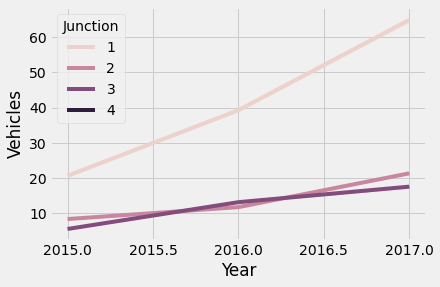

In [32]:
sns.lineplot(data['Year'],data['Vehicles'],hue=data['Junction'])
plt.show()

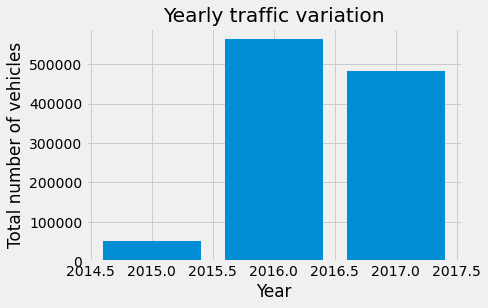

In [33]:
# group the data by year and calculate the total number of vehicles for each year
yearly_data = data.groupby(['Year'])['Vehicles'].sum()

# plot the data using matplotlib
plt.bar(yearly_data.index, yearly_data.values)
plt.xlabel('Year')
plt.ylabel('Total number of vehicles')
plt.title('Yearly traffic variation')
plt.show()

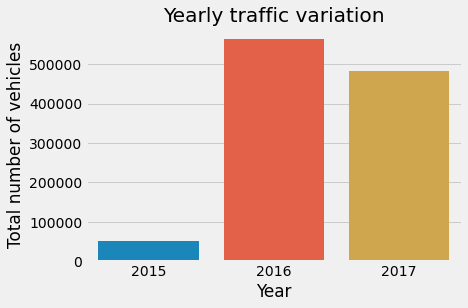

In [34]:
sns.barplot(x=yearly_data.index, y=yearly_data.values)
plt.xlabel('Year')
plt.ylabel('Total number of vehicles')
plt.title('Yearly traffic variation')
plt.show()

### Creating function to plot distribution and time series plot wrt different Junction

In [35]:
def junction_data(junction=1):
    data_jun=data[data['Junction']==junction]
    fig, ax = plt.subplots(figsize=(17, 5))
    ax = sns.histplot(data_jun['Vehicles'], kde=True)
    ax.set_title(f'Plot show the distribution of data in junction {junction}')
    ax.grid(True, ls='-.', alpha=0.75)
    plt.show()
    return data_jun

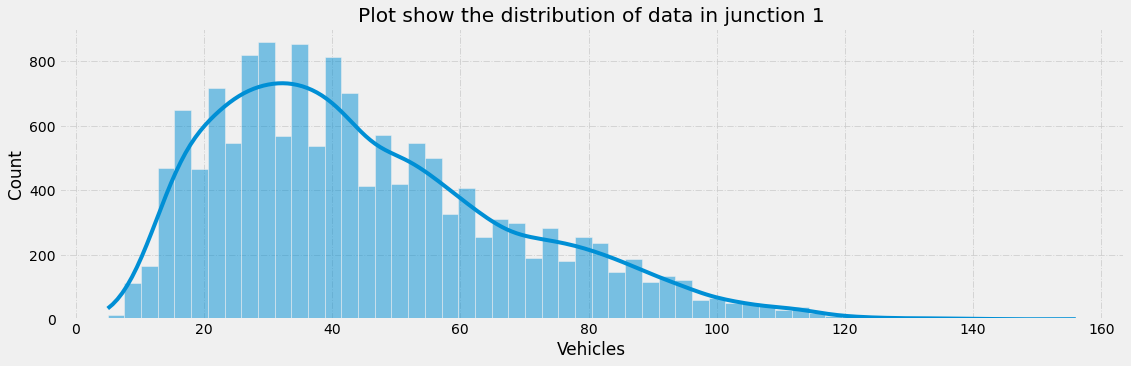

DateTime  Junction  Vehicles  Year  Month  Day  hour
0     2015-11-01 00:00:00         1        15  2015     11    1     0
1     2015-11-01 01:00:00         1        13  2015     11    1     1
2     2015-11-01 02:00:00         1        10  2015     11    1     2
3     2015-11-01 03:00:00         1         7  2015     11    1     3
4     2015-11-01 04:00:00         1         9  2015     11    1     4
...                   ...       ...       ...   ...    ...  ...   ...
14587 2017-06-30 19:00:00         1       105  2017      6   30    19
14588 2017-06-30 20:00:00         1        96  2017      6   30    20
14589 2017-06-30 21:00:00         1        90  2017      6   30    21
14590 2017-06-30 22:00:00         1        84  2017      6   30    22
14591 2017-06-30 23:00:00         1        78  2017      6   30    23

[14592 rows x 7 columns]

In [36]:
data_junc_1=junction_data(1)
data_junc_1

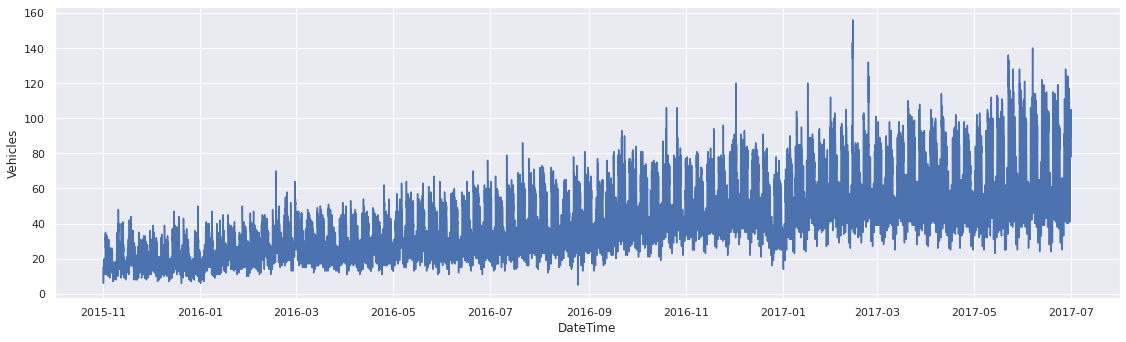

In [37]:
sns.set(rc={'figure.figsize':(17,5)})
sns.lineplot(data=data_junc_1,y='Vehicles',x='DateTime')
plt.show()

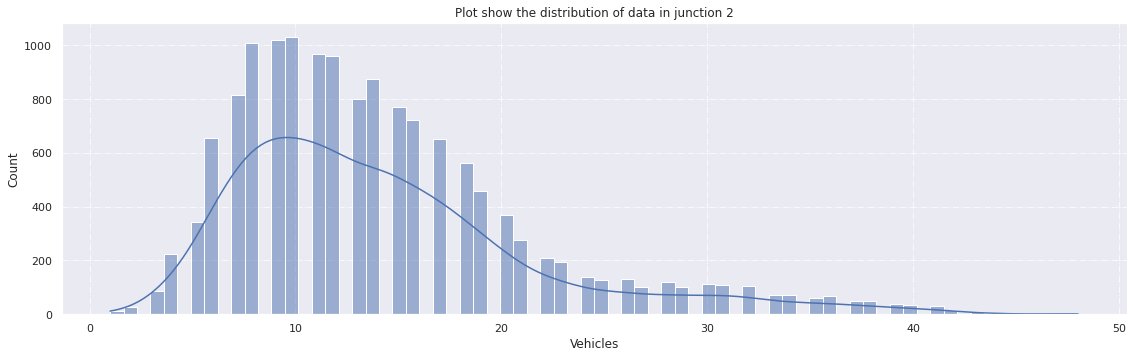

DateTime  Junction  Vehicles  Year  Month  Day  hour
14592 2015-11-01 00:00:00         2         6  2015     11    1     0
14593 2015-11-01 01:00:00         2         6  2015     11    1     1
14594 2015-11-01 02:00:00         2         5  2015     11    1     2
14595 2015-11-01 03:00:00         2         6  2015     11    1     3
14596 2015-11-01 04:00:00         2         7  2015     11    1     4
...                   ...       ...       ...   ...    ...  ...   ...
29179 2017-06-30 19:00:00         2        34  2017      6   30    19
29180 2017-06-30 20:00:00         2        35  2017      6   30    20
29181 2017-06-30 21:00:00         2        31  2017      6   30    21
29182 2017-06-30 22:00:00         2        29  2017      6   30    22
29183 2017-06-30 23:00:00         2        27  2017      6   30    23

[14592 rows x 7 columns]

In [38]:
data_junc_2=junction_data(2)
data_junc_2

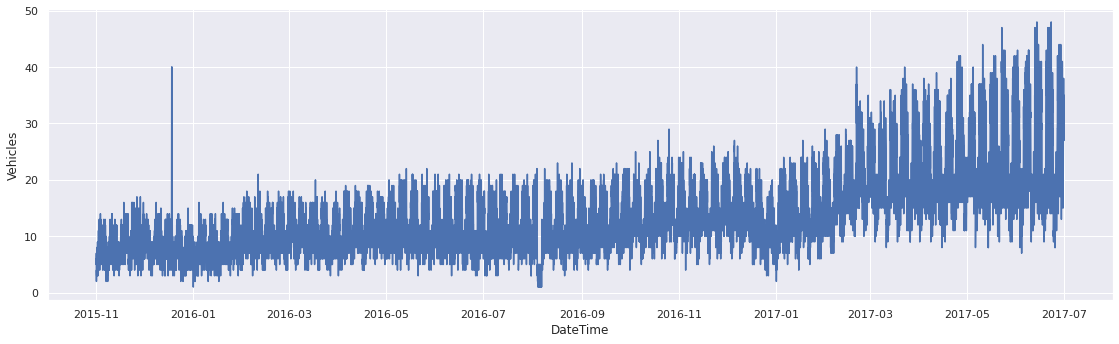

In [39]:
sns.set(rc={'figure.figsize':(17,5)})
sns.lineplot(data=data_junc_2,y='Vehicles',x='DateTime')
plt.show()

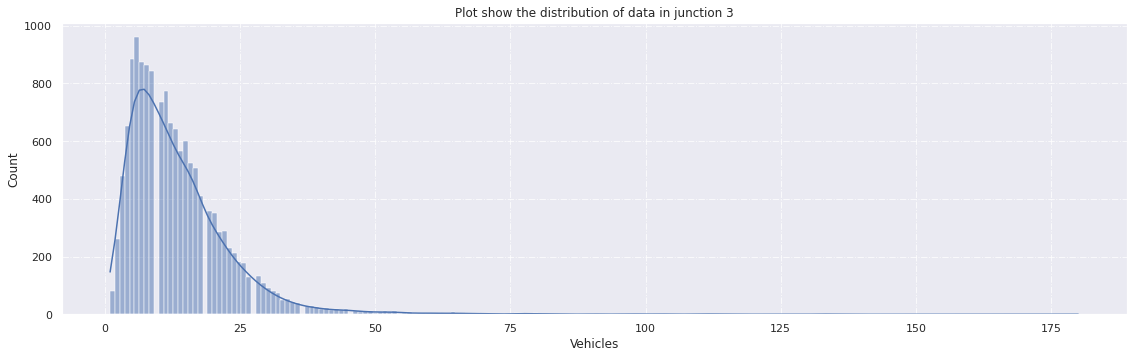

DateTime  Junction  Vehicles  Year  Month  Day  hour
29184 2015-11-01 00:00:00         3         9  2015     11    1     0
29185 2015-11-01 01:00:00         3         7  2015     11    1     1
29186 2015-11-01 02:00:00         3         5  2015     11    1     2
29187 2015-11-01 03:00:00         3         1  2015     11    1     3
29188 2015-11-01 04:00:00         3         2  2015     11    1     4
...                   ...       ...       ...   ...    ...  ...   ...
43771 2017-06-30 19:00:00         3        33  2017      6   30    19
43772 2017-06-30 20:00:00         3        31  2017      6   30    20
43773 2017-06-30 21:00:00         3        28  2017      6   30    21
43774 2017-06-30 22:00:00         3        26  2017      6   30    22
43775 2017-06-30 23:00:00         3        39  2017      6   30    23

[14592 rows x 7 columns]

In [40]:
data_junc_3=junction_data(3)
data_junc_3

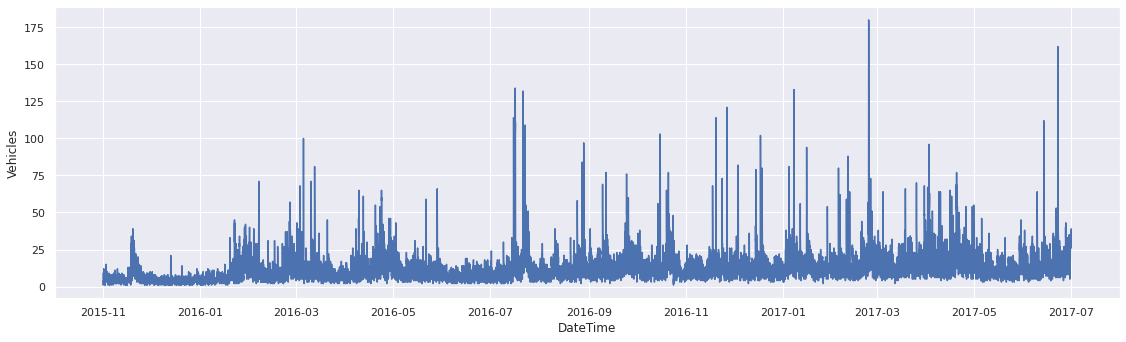

In [41]:
sns.set(rc={'figure.figsize':(17,5)})
sns.lineplot(data=data_junc_3,y='Vehicles',x='DateTime')
plt.show()

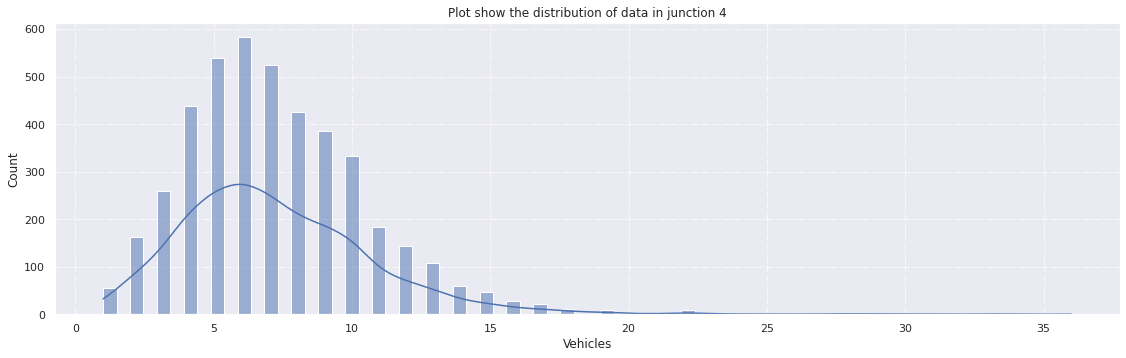

DateTime  Junction  Vehicles  Year  Month  Day  hour
43776 2017-01-01 00:00:00         4         3  2017      1    1     0
43777 2017-01-01 01:00:00         4         1  2017      1    1     1
43778 2017-01-01 02:00:00         4         4  2017      1    1     2
43779 2017-01-01 03:00:00         4         4  2017      1    1     3
43780 2017-01-01 04:00:00         4         2  2017      1    1     4
...                   ...       ...       ...   ...    ...  ...   ...
48115 2017-06-30 19:00:00         4        11  2017      6   30    19
48116 2017-06-30 20:00:00         4        30  2017      6   30    20
48117 2017-06-30 21:00:00         4        16  2017      6   30    21
48118 2017-06-30 22:00:00         4        22  2017      6   30    22
48119 2017-06-30 23:00:00         4        12  2017      6   30    23

[4344 rows x 7 columns]

In [42]:
data_junc_4=junction_data(4)
data_junc_4

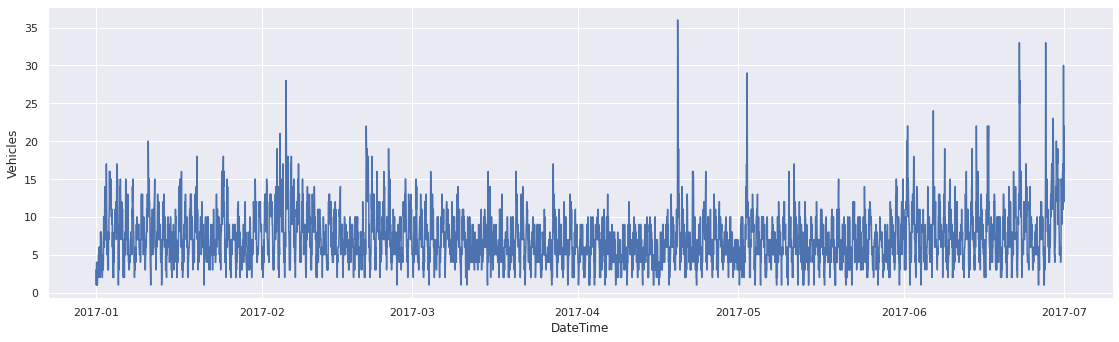

In [43]:
sns.set(rc={'figure.figsize':(17,5)})
sns.lineplot(data=data_junc_4,y='Vehicles',x='DateTime')
plt.show()

Distribution look normal but skewed

time series plot look stationary

In [44]:
def grouping_data_junc(df):
    year_grouping=df.groupby(['Year'])['Vehicles'].sum().reset_index()
    month_grouping=df.groupby(['Month'])['Vehicles'].sum().reset_index()
    day_grouping=df.groupby(['Day'])['Vehicles'].sum().reset_index()
    fig,ax=plt.subplots(1,3,figsize=(20,5))
    sns.barplot(data=year_grouping,x='Year',y='Vehicles',ax=ax[0])
    sns.barplot(data=month_grouping,x='Month',y='Vehicles',ax=ax[1])
    sns.barplot(data=day_grouping,x='Day',y='Vehicles',ax=ax[2])
    

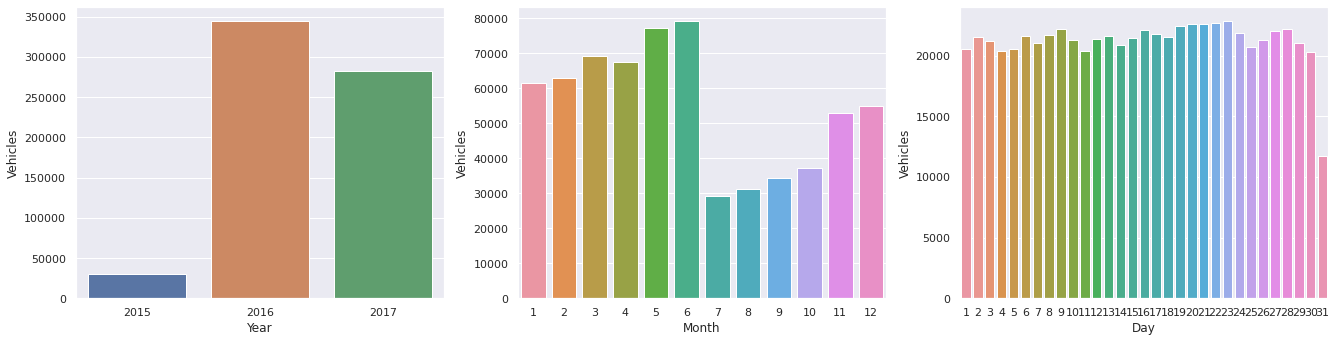

In [45]:
grouping_data_junc(data_junc_1)

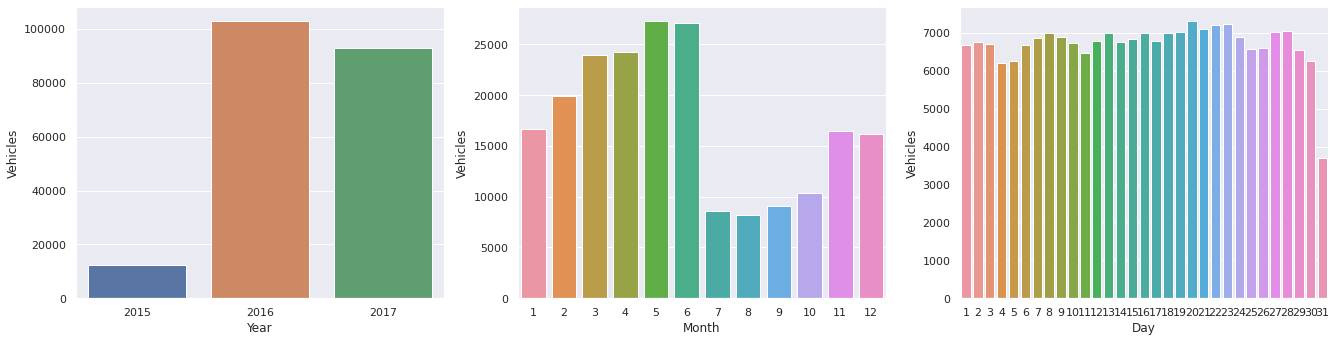

In [46]:
grouping_data_junc(data_junc_2)

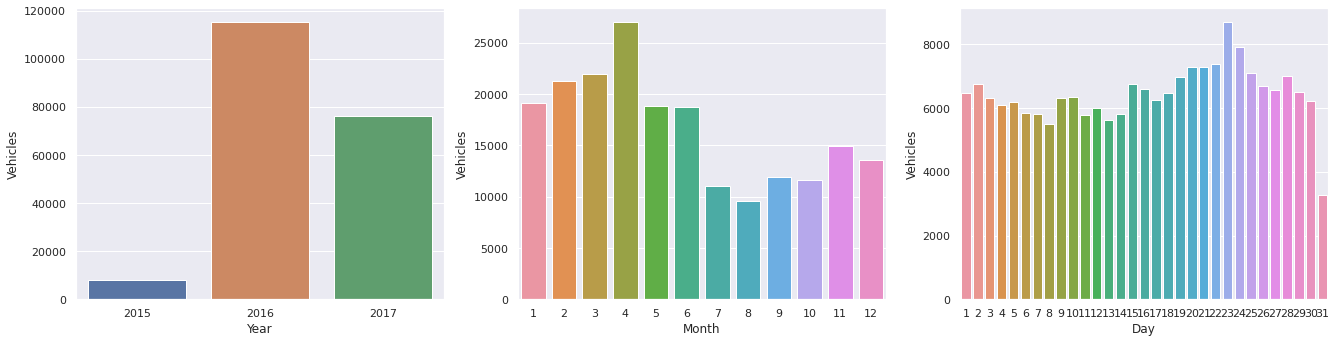

In [47]:
grouping_data_junc(data_junc_3)

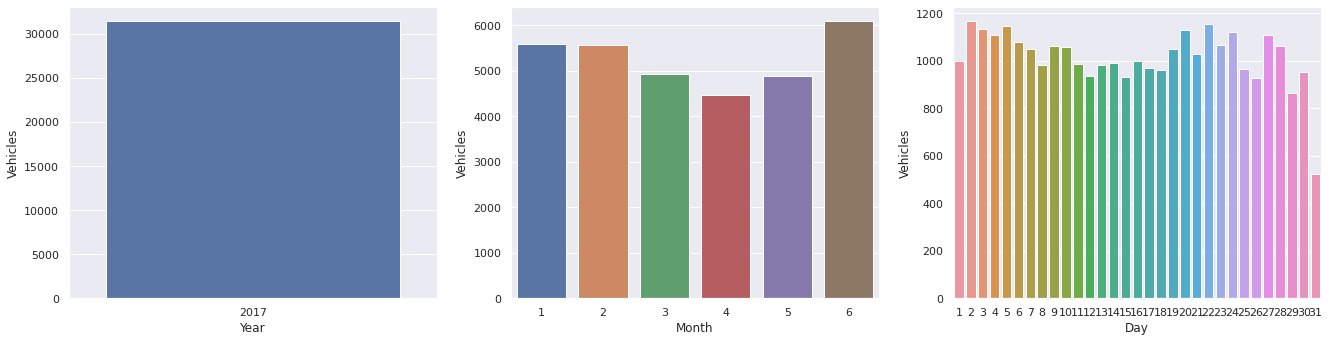

In [48]:
grouping_data_junc(data_junc_4)

from the above plot we can analyse which months and what day the particular junction  is more congested

In [49]:
year_grouping=data.groupby(['Year'])['Vehicles'].sum().reset_index()

In [50]:
year_grouping

Year  Vehicles
0  2015     50552
1  2016    563588
2  2017    482579

In [51]:
data[data['Year']==2015].groupby(['Month'])['Vehicles'].sum().reset_index()

Month  Vehicles
0     11     25729
1     12     24823

In [52]:
data[data['Year']==2016].groupby(['Month'])['Vehicles'].sum().reset_index()

Month  Vehicles
0       1     30801
1       2     36591
2       3     39089
3       4     41814
4       5     43641
5       6     40802
6       7     48742
7       8     48962
8       9     55393
9      10     59262
10     11     58659
11     12     59832

In [53]:
data[data['Year']==2017].groupby(['Month'])['Vehicles'].sum().reset_index()

Month  Vehicles
0      1     71939
1      2     73077
2      3     81077
3      4     81436
4      5     84650
5      6     90400

In [54]:
data[data['Year']==2015].groupby(['Day'])['Vehicles'].sum().reset_index()

Day  Vehicles
0     1      1494
1     2      1897
2     3      1787
3     4      1658
4     5      1369
5     6      1334
6     7      1395
7     8      1414
8     9      1643
9    10      1867
10   11      1676
11   12      1558
12   13      1484
13   14      1473
14   15      1492
15   16      1762
16   17      1907
17   18      2478
18   19      1957
19   20      1863
20   21      1727
21   22      1733
22   23      1877
23   24      1691
24   25      1378
25   26      1495
26   27      1435
27   28      1562
28   29      1592
29   30      1852
30   31       702

In [55]:
data[data['Year']==2016].groupby(['Day'])['Vehicles'].sum().reset_index()

Day  Vehicles
0     1     18422
1     2     18120
2     3     17640
3     4     17264
4     5     17357
5     6     17623
6     7     17827
7     8     18107
8     9     17888
9    10     17108
10   11     17516
11   12     18451
12   13     17524
13   14     18208
14   15     18963
15   16     18725
16   17     18110
17   18     18502
18   19     19328
19   20     19135
20   21     20088
21   22     19717
22   23     20046
23   24     19028
24   25     18452
25   26     19059
26   27     18492
27   28     19817
28   29     20133
29   30     17199
30   31      9739

In [56]:
data[data['Year']==2017].groupby(['Day'])['Vehicles'].sum().reset_index()

Day  Vehicles
0     1     14760
1     2     16200
2     3     15922
3     4     14815
4     5     15441
5     6     16222
6     7     15528
7     8     15659
8     9     16900
9    10     16398
10   11     14451
11   12     15090
12   13     16161
13   14     14787
14   15     15552
15   16     16184
16   17     15778
17   18     15030
18   19     16187
19   20     17336
20   21     16229
21   22     17031
22   23     17973
23   24     17015
24   25     15532
25   26     14993
26   27     16753
27   28     15913
28   29     13269
29   30     14676
30   31      8794

## Outlier detection

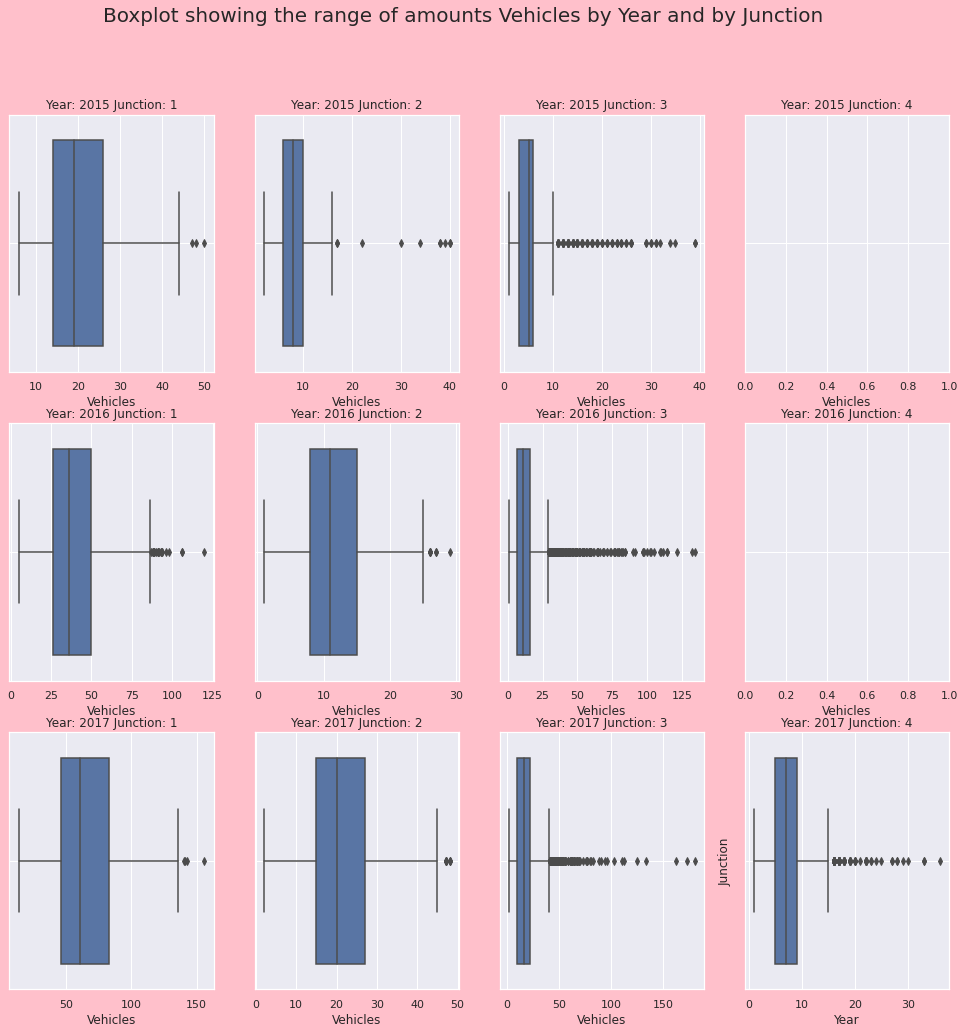

In [57]:
fig, axis = plt.subplots(3, 4, figsize=(15, 15))
fig.set_facecolor('pink')
years = range(2015, 2018)
junctions = range(1, 5)

for i, year in enumerate(years):
    for j, junction in enumerate(junctions):
        
        sns.boxplot(x=data[(data.Junction == junction) & (data.Year == year)]['Vehicles'], ax=axis[i, j])
        axis[i, j].grid(True, alpha=1, ls='solid')
        axis[i, j].set_title(f'Year: {year} Junction: {junction}')

plt.xlabel('Year')
plt.ylabel('Junction')
fig.suptitle('Boxplot showing the range of amounts Vehicles by Year and by Junction', fontsize=20)
plt.show()

lot of outliers in the data

In [58]:
corr = data.corr()
corr

Junction  Vehicles          Year         Month           Day  \
Junction  1.000000e+00 -0.613787  2.212977e-01 -1.242771e-01 -2.094621e-03   
Vehicles -6.137872e-01  1.000000  2.212531e-01 -2.272345e-02  2.789498e-02   
Year      2.212977e-01  0.221253  1.000000e+00 -6.234957e-01 -7.474779e-03   
Month    -1.242771e-01 -0.022723 -6.234957e-01  1.000000e+00  9.154760e-03   
Day      -2.094621e-03  0.027895 -7.474779e-03  9.154760e-03  1.000000e+00   
hour     -2.132575e-15  0.219938  7.732006e-16  4.953278e-16 -9.917806e-18   

                  hour  
Junction -2.132575e-15  
Vehicles  2.199377e-01  
Year      7.732006e-16  
Month     4.953278e-16  
Day      -9.917806e-18  
hour      1.000000e+00

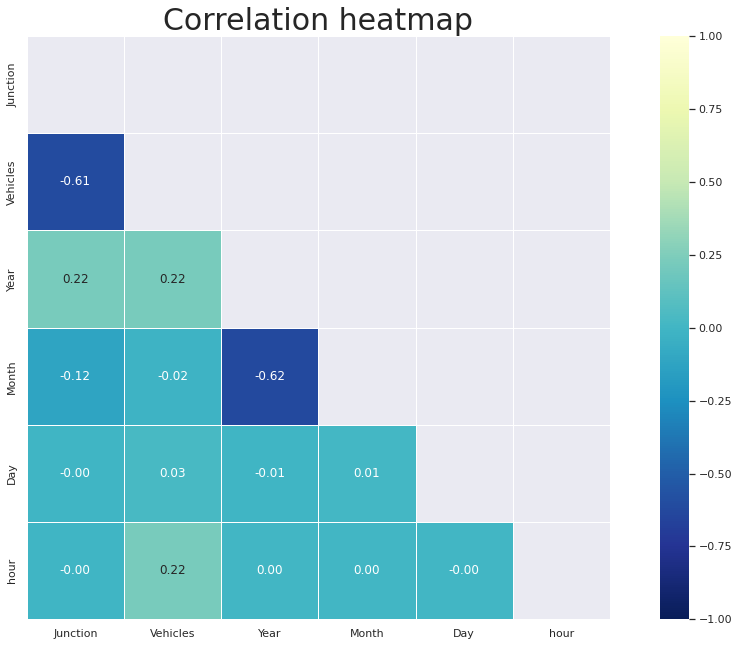

In [59]:
# Create a mask to filter the upper triangle of the correlation matrix
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Create the heatmap
plt.figure(figsize=(16, 10))
sns.heatmap(corr, annot=True, fmt='.2f', vmin=-1, vmax=1, square=True, linewidths=1, cmap="YlGnBu_r", mask=mask)
plt.title('Correlation heatmap', fontsize=30)
plt.show()

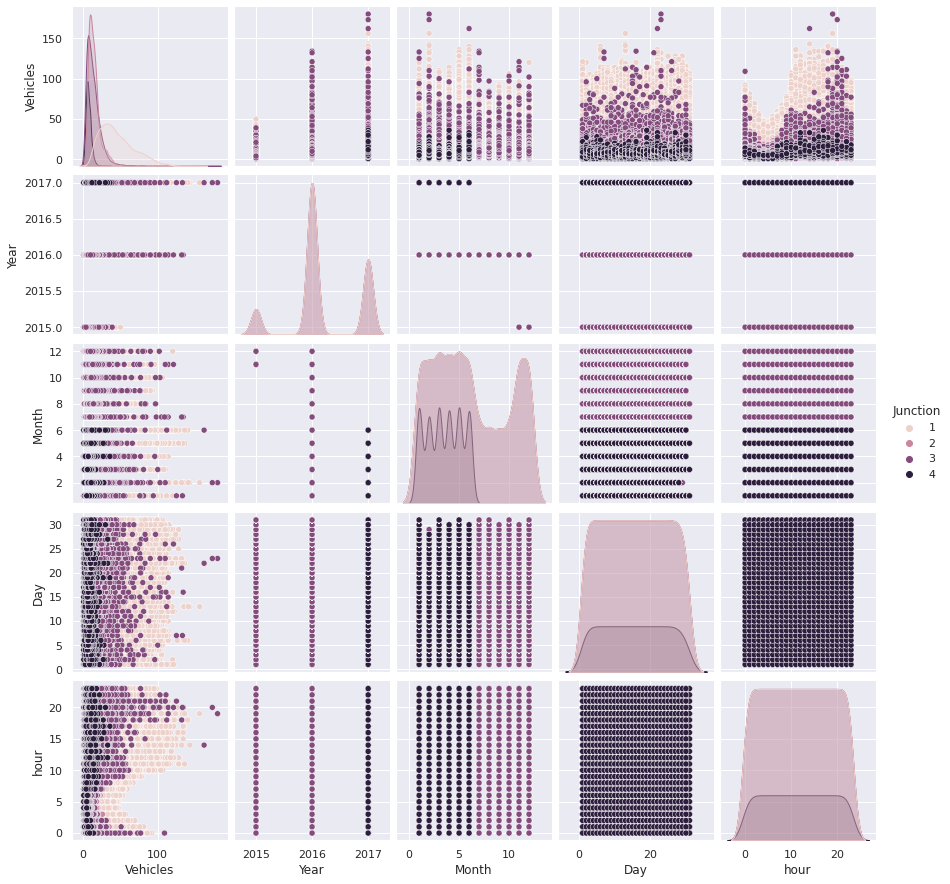

In [240]:
sns.pairplot(data=data, hue= "Junction")

In [60]:
data2=data.set_index('DateTime')

In [61]:
data2

Junction  Vehicles  Year  Month  Day  hour
DateTime                                                       
2015-11-01 00:00:00         1        15  2015     11    1     0
2015-11-01 01:00:00         1        13  2015     11    1     1
2015-11-01 02:00:00         1        10  2015     11    1     2
2015-11-01 03:00:00         1         7  2015     11    1     3
2015-11-01 04:00:00         1         9  2015     11    1     4
...                       ...       ...   ...    ...  ...   ...
2017-06-30 19:00:00         4        11  2017      6   30    19
2017-06-30 20:00:00         4        30  2017      6   30    20
2017-06-30 21:00:00         4        16  2017      6   30    21
2017-06-30 22:00:00         4        22  2017      6   30    22
2017-06-30 23:00:00         4        12  2017      6   30    23

[48120 rows x 6 columns]

In [62]:
def get_list_data(dataf, drop=[]):
    # Drop specified columns from dataframe
    dataf = dataf.drop(drop, axis=1, errors='ignore')
    # Create a list of dataframes with data from each junction
    data_list = [dataf[dataf.Junction == i].drop('Junction', axis=1) for i in range(5)]
    return data_list

In [63]:
data1 = get_list_data(data2)
for i in data1:
    print(i.head(1))

Empty DataFrame
Columns: [Vehicles, Year, Month, Day, hour]
Index: []
            Vehicles  Year  Month  Day  hour
DateTime                                    
2015-11-01        15  2015     11    1     0
            Vehicles  Year  Month  Day  hour
DateTime                                    
2015-11-01         6  2015     11    1     0
            Vehicles  Year  Month  Day  hour
DateTime                                    
2015-11-01         9  2015     11    1     0
            Vehicles  Year  Month  Day  hour
DateTime                                    
2017-01-01         3  2017      1    1     0


In [64]:
data1,len(data1)

([Empty DataFrame
  Columns: [Vehicles, Year, Month, Day, hour]
  Index: [],
                       Vehicles  Year  Month  Day  hour
  DateTime                                             
  2015-11-01 00:00:00        15  2015     11    1     0
  2015-11-01 01:00:00        13  2015     11    1     1
  2015-11-01 02:00:00        10  2015     11    1     2
  2015-11-01 03:00:00         7  2015     11    1     3
  2015-11-01 04:00:00         9  2015     11    1     4
  ...                       ...   ...    ...  ...   ...
  2017-06-30 19:00:00       105  2017      6   30    19
  2017-06-30 20:00:00        96  2017      6   30    20
  2017-06-30 21:00:00        90  2017      6   30    21
  2017-06-30 22:00:00        84  2017      6   30    22
  2017-06-30 23:00:00        78  2017      6   30    23
  
  [14592 rows x 5 columns],
                       Vehicles  Year  Month  Day  hour
  DateTime                                             
  2015-11-01 00:00:00         6  2015     11    1   

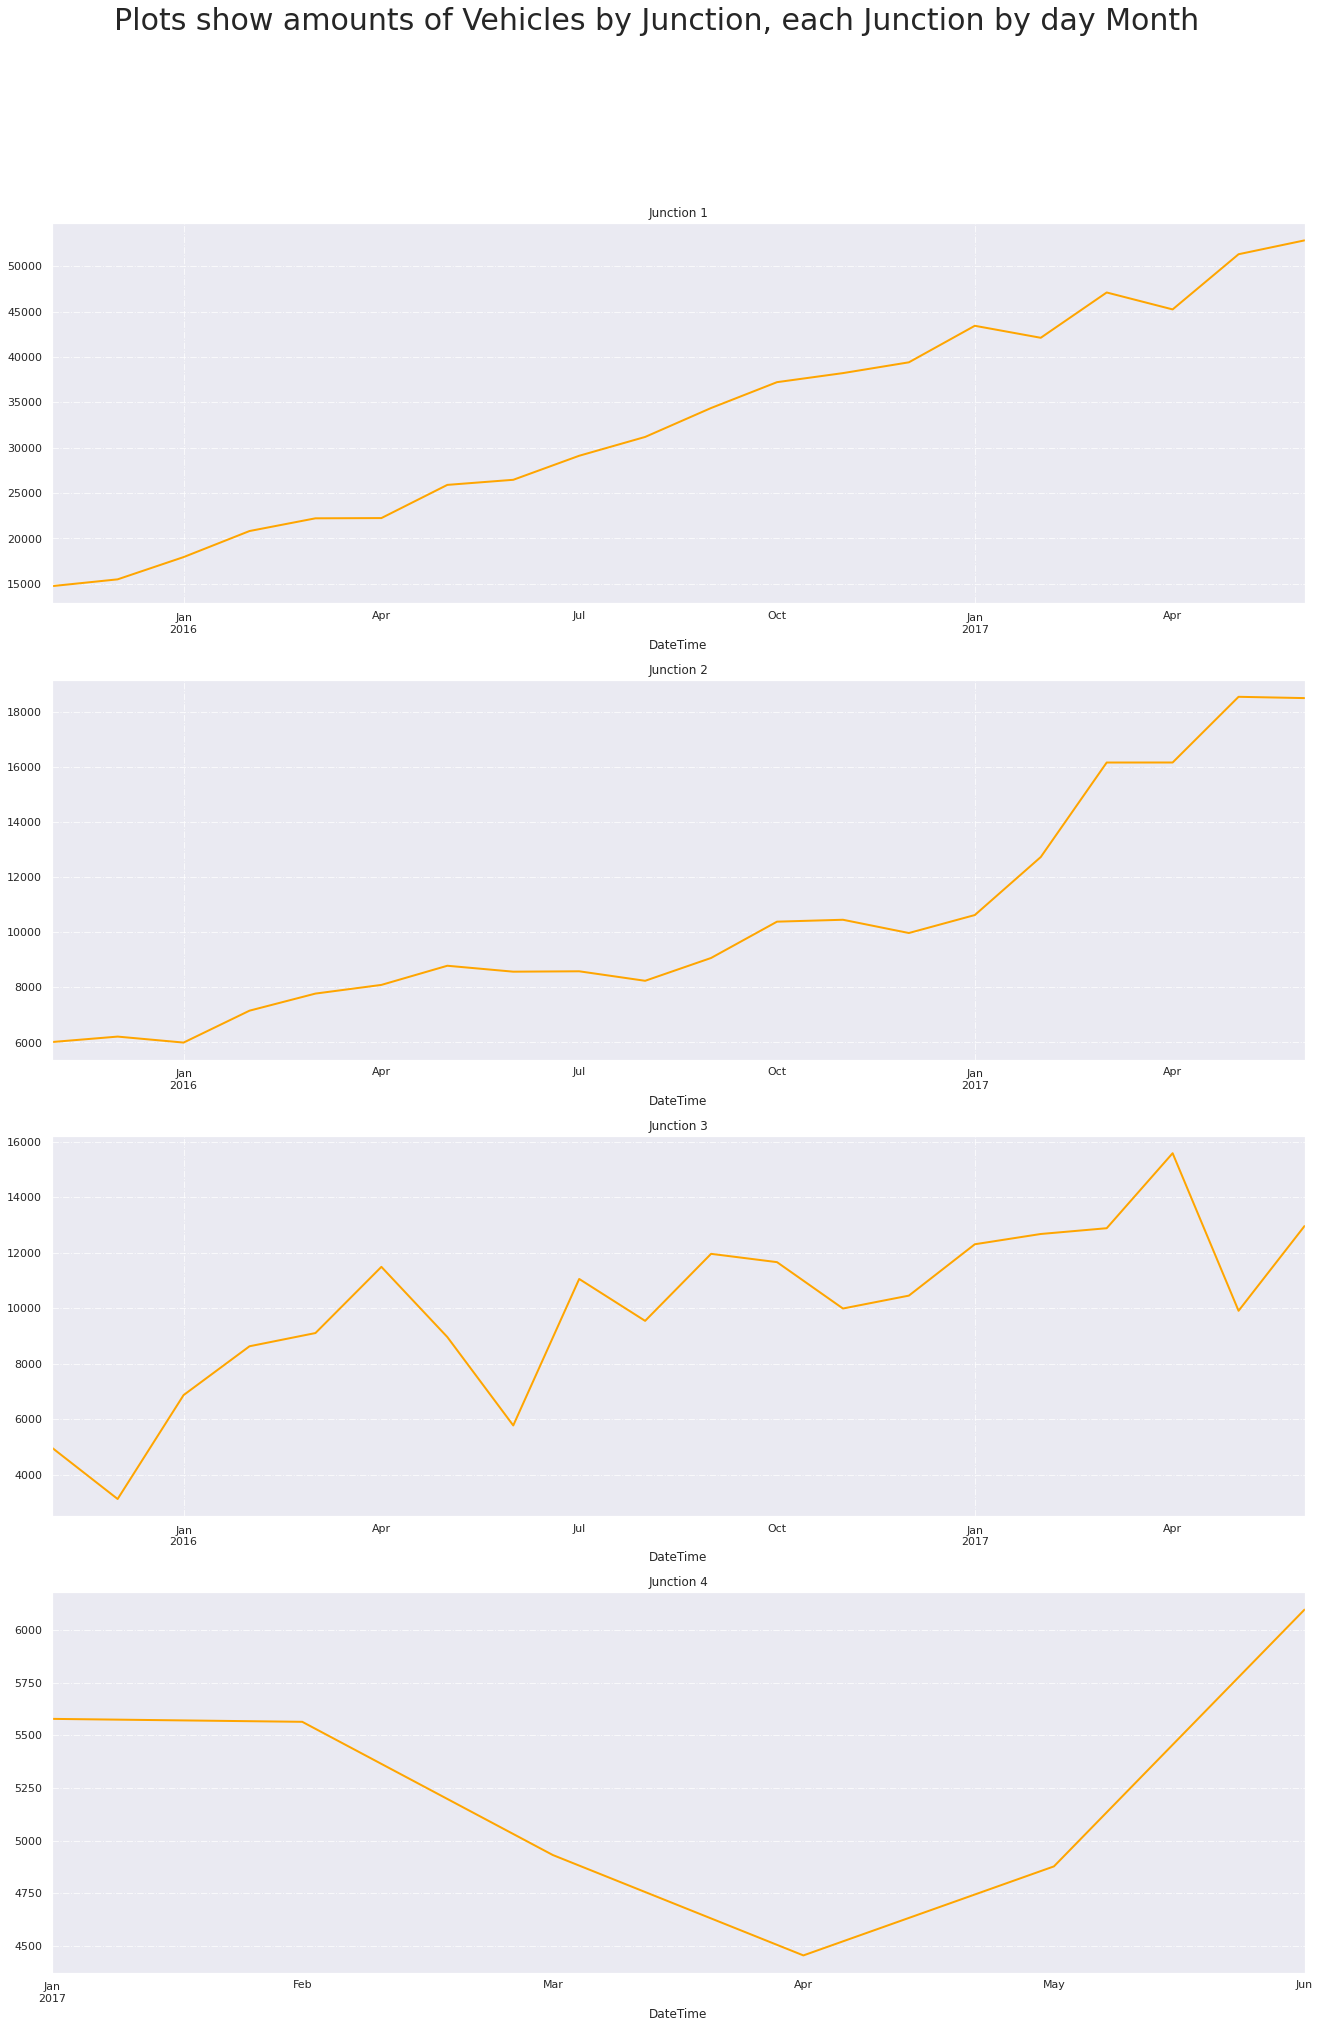

In [65]:
data1 = get_list_data(data2)
fig, ax = plt.subplots(nrows=4, figsize=(20, 30))
[data1[i + 1].resample('M').sum().Vehicles.plot(label=f'Vehicles of {i + 1} Junction', lw=2,ax=ax[i], color='orange') for i in range(4)]
[ax[i].grid(True, alpha=0.75, lw=1, ls='-.') for i in range(4)]
[ax[i].set_title(f'Junction {i + 1}') for i in range(4)]
plt.suptitle('Plots show amounts of Vehicles by Junction, each Junction by day Month', fontsize=30)
plt.show()

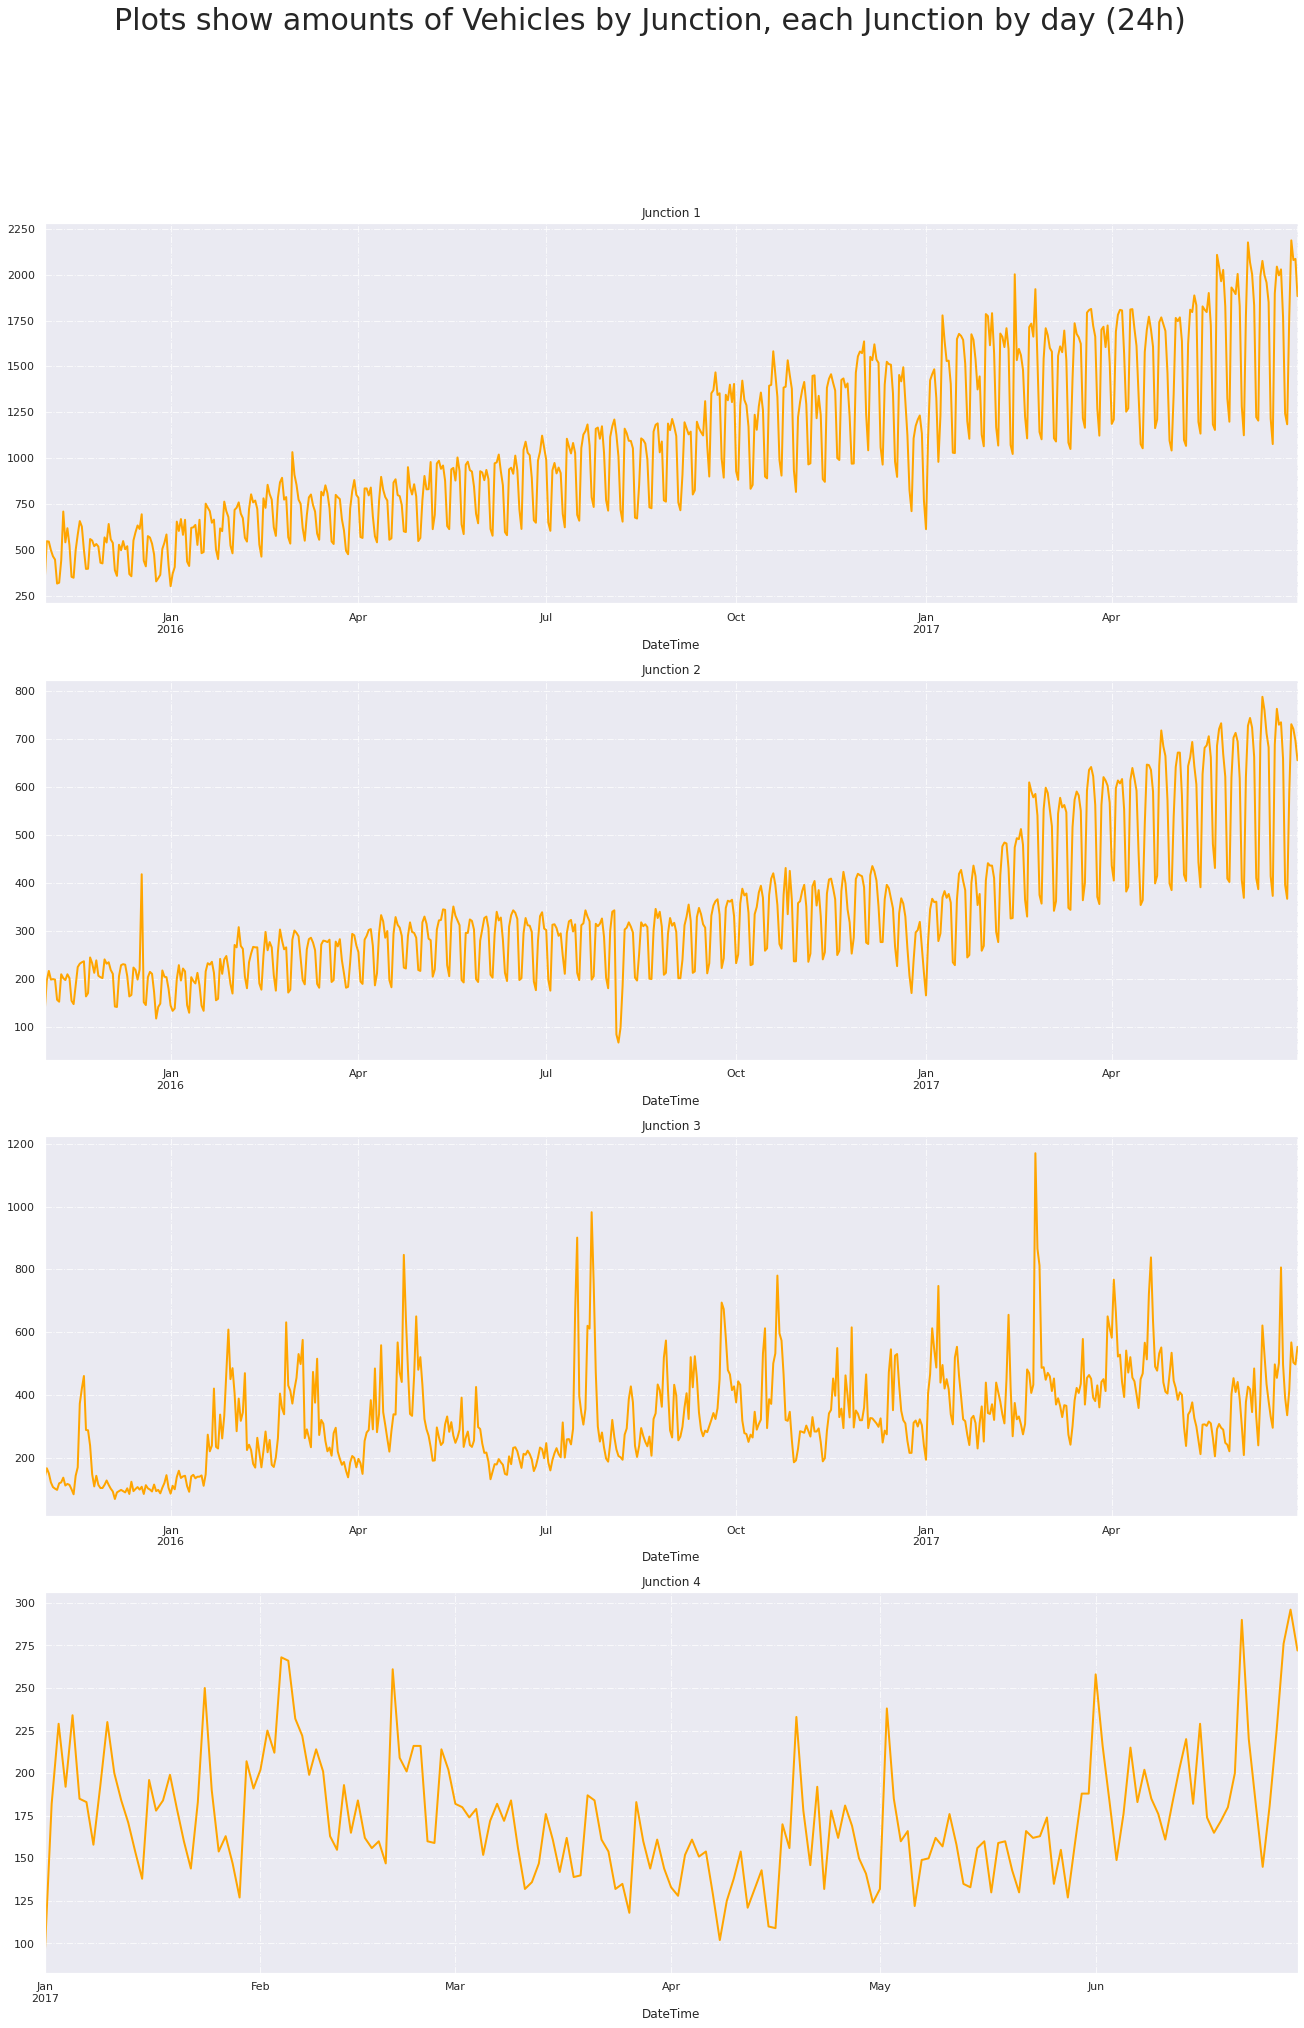

In [66]:
data1 = get_list_data(data2)
fig, ax = plt.subplots(nrows=4, figsize=(20, 30))
[data1[i + 1].resample('D').sum().Vehicles.plot(label=f'Vehicles of {i + 1} Junction', lw=2,ax=ax[i], color='orange') for i in range(4)]
[ax[i].grid(True, alpha=0.75, lw=1, ls='-.') for i in range(4)]
[ax[i].set_title(f'Junction {i + 1}') for i in range(4)]
plt.suptitle('Plots show amounts of Vehicles by Junction, each Junction by day (24h)', fontsize=30)
plt.show()

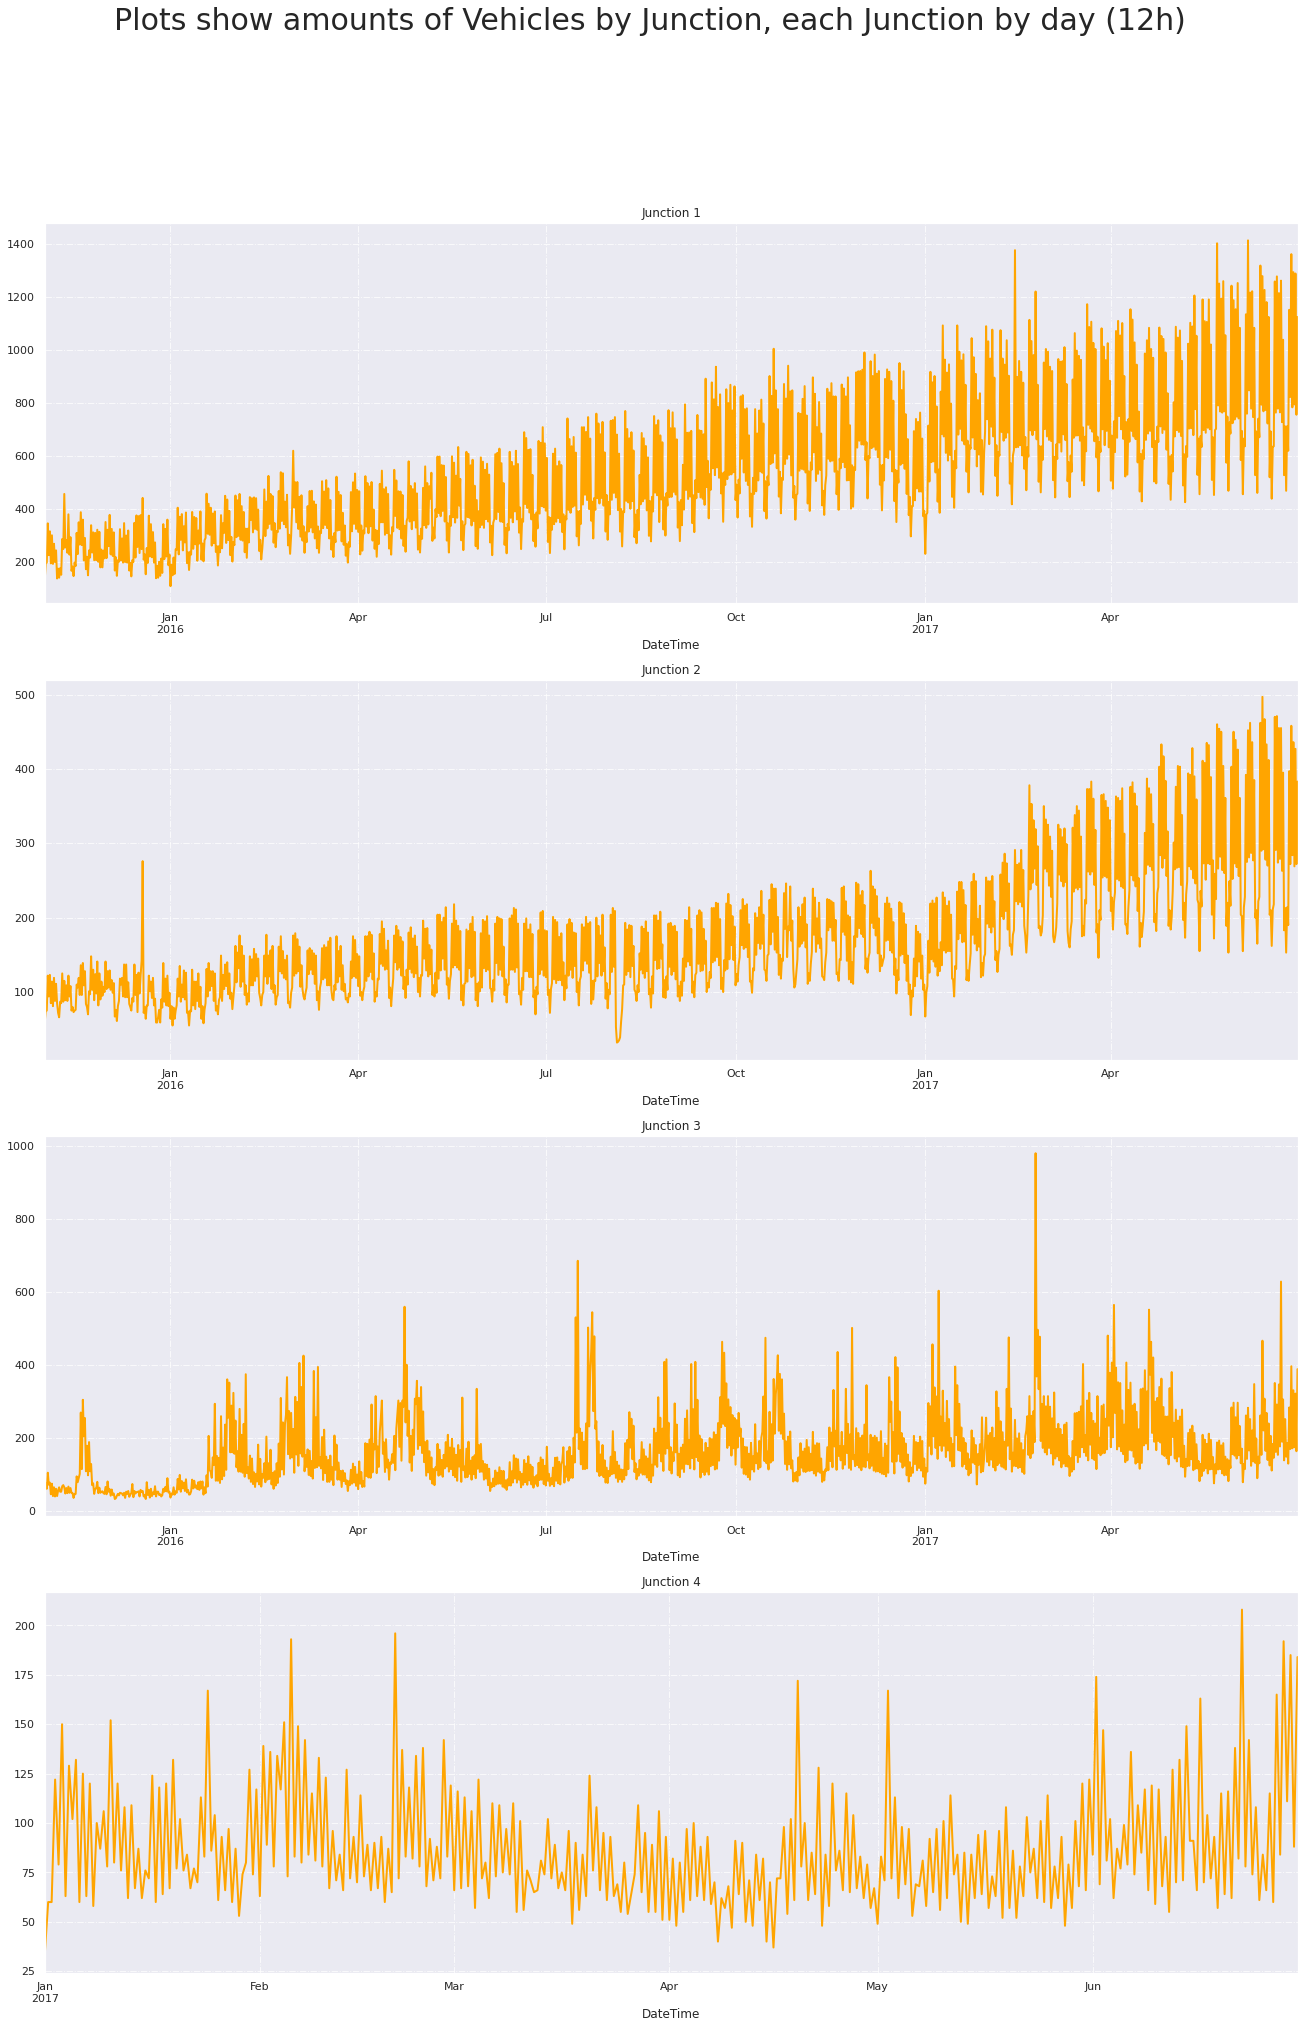

In [67]:
data1 = get_list_data(data2)
fig, ax = plt.subplots(nrows=4, figsize=(20, 30))
[data1[i + 1].resample('12H').sum().Vehicles.plot(label=f'Vehicles of {i + 1} Junction', lw=2,ax=ax[i], color='orange') for i in range(4)]
[ax[i].grid(True, alpha=0.75, lw=1, ls='-.') for i in range(4)]
[ax[i].set_title(f'Junction {i + 1}') for i in range(4)]
plt.suptitle('Plots show amounts of Vehicles by Junction, each Junction by day (12h)', fontsize=30)
plt.show()

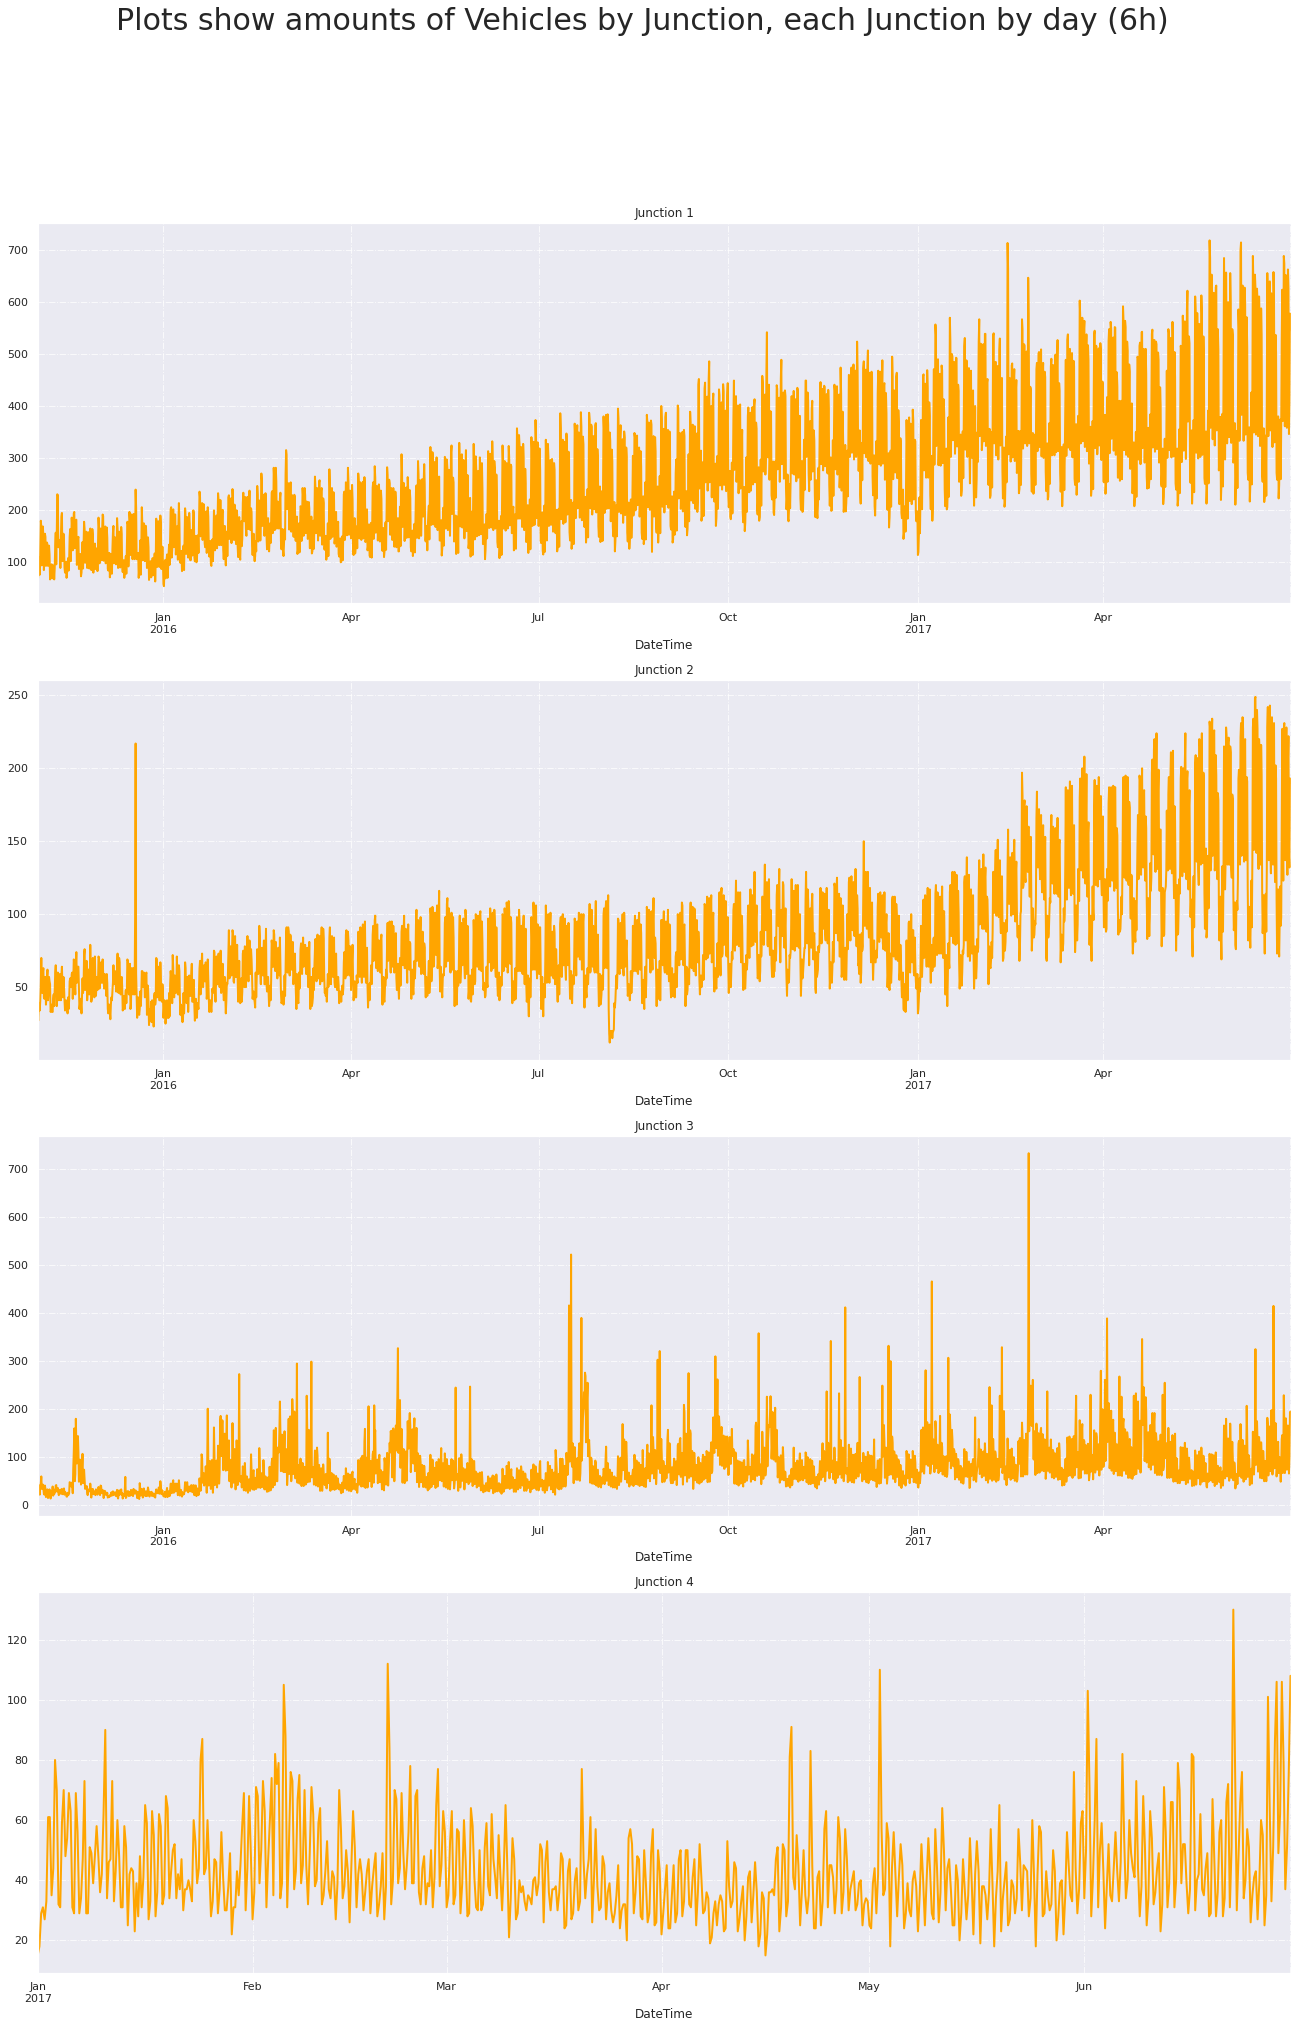

In [68]:
data1 = get_list_data(data2)
fig, ax = plt.subplots(nrows=4, figsize=(20, 30))
[data1[i + 1].resample('6H').sum().Vehicles.plot(label=f'Vehicles of {i + 1} Junction', lw=2,ax=ax[i], color='orange') for i in range(4)]
[ax[i].grid(True, alpha=0.75, lw=1, ls='-.') for i in range(4)]
[ax[i].set_title(f'Junction {i + 1}') for i in range(4)]
plt.suptitle('Plots show amounts of Vehicles by Junction, each Junction by day (6h)', fontsize=30)
plt.show()

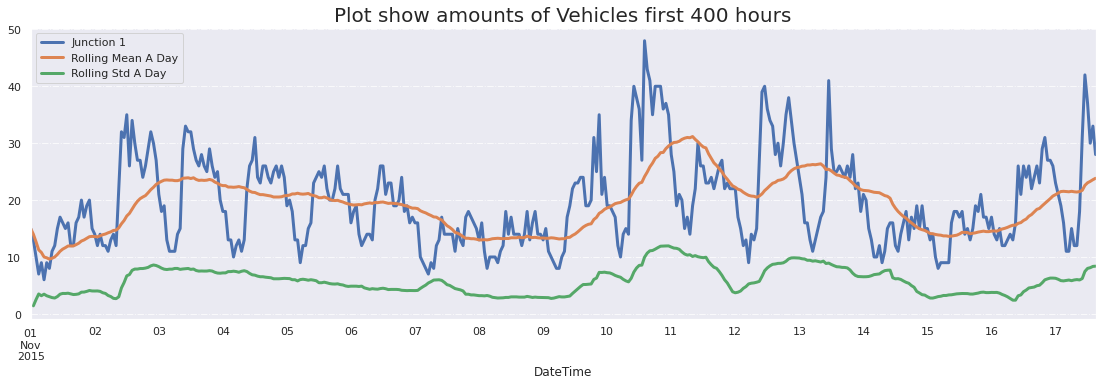

In [69]:
fig, ax = plt.subplots(figsize=(17, 5))
hrs400_data = data1[1][:400]
hrs400_data.Vehicles.plot(ax=ax, lw=3, label='Junction 1')
hrs400_data.Vehicles.rolling('D').mean().plot(ax=ax, lw=3, label='Rolling Mean A Day')
hrs400_data.Vehicles.rolling('D').std().plot(ax=ax, lw=3, label='Rolling Std A Day')
plt.legend()
plt.grid(True, alpha=0.75, ls='-.')
plt.title('Plot show amounts of Vehicles first 400 hours', fontsize=20)
plt.show()


In [70]:
def make_autocorrelation1(junction=1):
    fig, ax = plt.subplots(figsize=(17, 6), nrows=2)
    plot_acf(data1[junction].Vehicles, lags=40, title=f"Autocorrelation of amounts of Vehicles in Junction {junction}", ax=ax[0])
    plot_pacf(data1[junction].Vehicles, lags=40, title=f"Partial Autocorrelation of amounts of Vehicles Junction {junction}", ax=ax[1])
    plt.show()

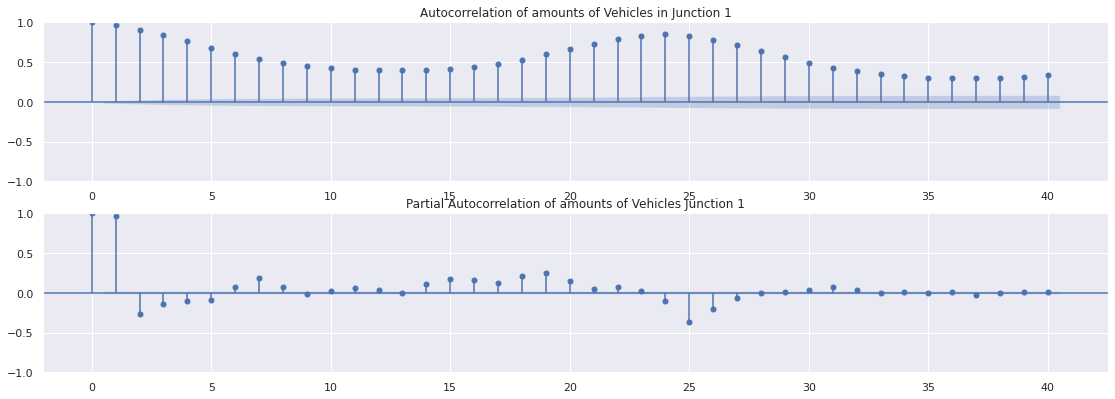

In [71]:
make_autocorrelation1(1)

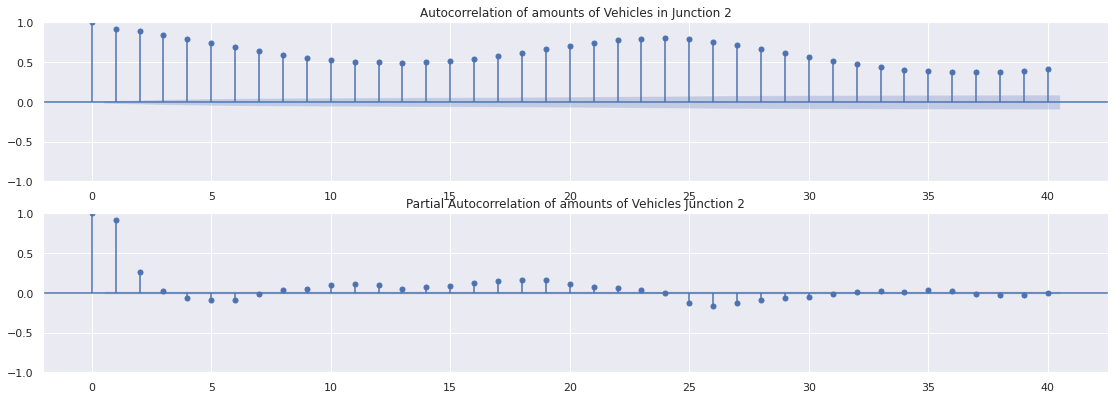

In [72]:
make_autocorrelation1(2)

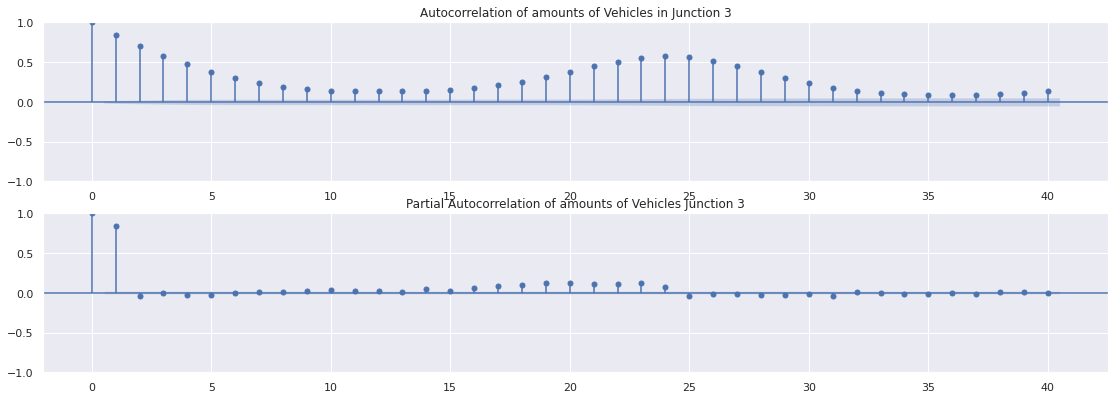

In [73]:
make_autocorrelation1(3)

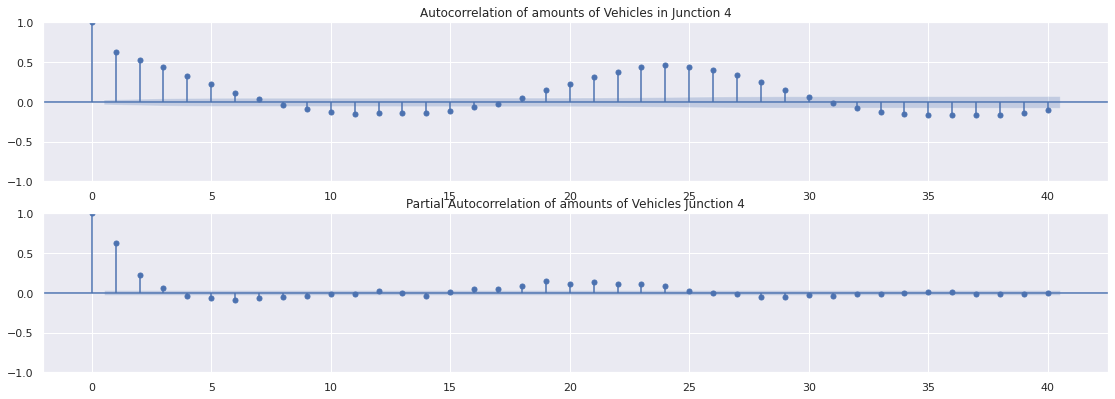

In [74]:
make_autocorrelation1(4)

Month has negative correlation with Year

The correlation of Vehicles and Year is equal to Vehicles and Hour

## Checking if data is stationary or not

In [75]:
from statsmodels.tsa.stattools import adfuller
from numpy import log
result = adfuller(data.Vehicles.dropna())
print('p-value: %f' % result[1])

p-value: 0.000000


In [76]:
result

(-7.518278111935733,
 3.8510601999153196e-11,
 57,
 48062,
 {'1%': -3.430486066940443,
  '5%': -2.8616001387397922,
  '10%': -2.566802009871527},
 276495.72182130534)

p-value is almost 0 suggest data is stationary

# Modelling

### Preparing the data for modelling

In [77]:
#Standardize the data
standardization = lambda x: StandardScaler().fit_transform(x)

In [78]:
z_df = data.copy()
z_df['Vehicles'] = standardization(z_df.Vehicles.values.reshape(-1, 1))
z_df.head()

DateTime  Junction  Vehicles  Year  Month  Day  hour
0 2015-11-01 00:00:00         1 -0.375489  2015     11    1     0
1 2015-11-01 01:00:00         1 -0.471875  2015     11    1     1
2 2015-11-01 02:00:00         1 -0.616454  2015     11    1     2
3 2015-11-01 03:00:00         1 -0.761034  2015     11    1     3
4 2015-11-01 04:00:00         1 -0.664648  2015     11    1     4

In [79]:
standardization(data.Vehicles.values.reshape(-1, 1))

array([[-0.37548875],
       [-0.47187501],
       [-0.61645439],
       ...,
       [-0.32729563],
       [-0.03813687],
       [-0.52006813]])

In [80]:
z_df

DateTime  Junction  Vehicles  Year  Month  Day  hour
0     2015-11-01 00:00:00         1 -0.375489  2015     11    1     0
1     2015-11-01 01:00:00         1 -0.471875  2015     11    1     1
2     2015-11-01 02:00:00         1 -0.616454  2015     11    1     2
3     2015-11-01 03:00:00         1 -0.761034  2015     11    1     3
4     2015-11-01 04:00:00         1 -0.664648  2015     11    1     4
...                   ...       ...       ...   ...    ...  ...   ...
48115 2017-06-30 19:00:00         4 -0.568261  2017      6   30    19
48116 2017-06-30 20:00:00         4  0.347408  2017      6   30    20
48117 2017-06-30 21:00:00         4 -0.327296  2017      6   30    21
48118 2017-06-30 22:00:00         4 -0.038137  2017      6   30    22
48119 2017-06-30 23:00:00         4 -0.520068  2017      6   30    23

[48120 rows x 7 columns]

In [81]:
z_df.set_index('DateTime',inplace=True)

In [82]:
get_list_data(z_df)

[Empty DataFrame
 Columns: [Vehicles, Year, Month, Day, hour]
 Index: [],
                      Vehicles  Year  Month  Day  hour
 DateTime                                             
 2015-11-01 00:00:00 -0.375489  2015     11    1     0
 2015-11-01 01:00:00 -0.471875  2015     11    1     1
 2015-11-01 02:00:00 -0.616454  2015     11    1     2
 2015-11-01 03:00:00 -0.761034  2015     11    1     3
 2015-11-01 04:00:00 -0.664648  2015     11    1     4
 ...                       ...   ...    ...  ...   ...
 2017-06-30 19:00:00  3.961893  2017      6   30    19
 2017-06-30 20:00:00  3.528155  2017      6   30    20
 2017-06-30 21:00:00  3.238996  2017      6   30    21
 2017-06-30 22:00:00  2.949837  2017      6   30    22
 2017-06-30 23:00:00  2.660678  2017      6   30    23
 
 [14592 rows x 5 columns],
                      Vehicles  Year  Month  Day  hour
 DateTime                                             
 2015-11-01 00:00:00 -0.809227  2015     11    1     0
 2015-11-01 01:00

In [83]:
z_data = get_list_data(z_df)

In [84]:
z_data,len(z_data)

([Empty DataFrame
  Columns: [Vehicles, Year, Month, Day, hour]
  Index: [],
                       Vehicles  Year  Month  Day  hour
  DateTime                                             
  2015-11-01 00:00:00 -0.375489  2015     11    1     0
  2015-11-01 01:00:00 -0.471875  2015     11    1     1
  2015-11-01 02:00:00 -0.616454  2015     11    1     2
  2015-11-01 03:00:00 -0.761034  2015     11    1     3
  2015-11-01 04:00:00 -0.664648  2015     11    1     4
  ...                       ...   ...    ...  ...   ...
  2017-06-30 19:00:00  3.961893  2017      6   30    19
  2017-06-30 20:00:00  3.528155  2017      6   30    20
  2017-06-30 21:00:00  3.238996  2017      6   30    21
  2017-06-30 22:00:00  2.949837  2017      6   30    22
  2017-06-30 23:00:00  2.660678  2017      6   30    23
  
  [14592 rows x 5 columns],
                       Vehicles  Year  Month  Day  hour
  DateTime                                             
  2015-11-01 00:00:00 -0.809227  2015     11    1   

In [85]:
for i in z_data:
    print(i.head(1))

Empty DataFrame
Columns: [Vehicles, Year, Month, Day, hour]
Index: []
            Vehicles  Year  Month  Day  hour
DateTime                                    
2015-11-01 -0.375489  2015     11    1     0
            Vehicles  Year  Month  Day  hour
DateTime                                    
2015-11-01 -0.809227  2015     11    1     0
            Vehicles  Year  Month  Day  hour
DateTime                                    
2015-11-01 -0.664648  2015     11    1     0
            Vehicles  Year  Month  Day  hour
DateTime                                    
2017-01-01 -0.953806  2017      1    1     0


## Machine Learning Modelling

In [86]:
#Splitting the dataset into training and testing
def split_data(data, predict_features, test_size):
    X = data.drop(predict_features, axis=1).values
    y = data[predict_features].values
    Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=test_size)
    return Xtrain, Xtest, ytrain, ytest

In [87]:
#fitting the model on training data
def fit_model(ml_model, Xtrain, ytrain):
    ml_model.fit(Xtrain, ytrain)
    return ml_model

In [88]:
#predicting on test data
def predict_model(ml_model, Xtest):
    ypredict = ml_model.predict(Xtest)
    return ypredict

In [89]:
#root mean square for evaluation
def calculate_rmse(ytest, ypredict):
    rmse = mean_squared_error(ytest, ypredict, squared=False)
    return rmse

In [90]:
#accuracy or r2_score wrt predicting data
def calculate_r2_score(ytest, ypredict):
    r2 = r2_score(ytest, ypredict)
    return r2

In [91]:
def plot_feature_importance(ml_model, features, ax):
    feature_importances = ml_model.feature_importances_
    data = pd.DataFrame(pd.Series(feature_importances, index=features).nlargest(10)).reset_index()
    data.columns = ['Features', 'Value']
    g = sns.barplot(data=data, x='Features', y='Value', ax=ax)
    for p in g.patches:
        ax.annotate(
            format(p.get_height(), '.2f'),
            (p.get_x() + p.get_width() / 2, p.get_height() + 0.02),
            ha='center', va='center', weight='bold', fontsize=9
        )
    ax.set_title(f'Plot of Feature Importance', fontsize=12)
    ax.grid(True, ls='-.', alpha=0.7)
    ax.set_ylim(0, 1)

In [92]:
models1 = [LinearRegression() for i in range(1, 5)]

In [93]:
models = [RandomForestRegressor() for i in range(1, 5)]

In [94]:
models2 = ['ARIMA' for i in range(1, 5)] 

In [95]:
#function to perform all the task for modelling
def make_metrics(models, data, predict_features, test_size):
    metrics = []
    for i in range(1,5):
        Xtrain, Xtest, ytrain, ytest = split_data(data[i], predict_features, test_size)
        ml_model = fit_model(models[i-1], Xtrain, ytrain)
        ypredict = predict_model(ml_model, Xtest)
        rmse = calculate_rmse(ytest, ypredict)
        r2 = calculate_r2_score(ytest, ypredict)
        metrics.append({'name': models[i-1].__class__.__name__, 'r2': r2, 'rmse': rmse})
    average_r2 = np.mean([metric['r2'] for metric in metrics])
    total_rmse = np.sum([metric['rmse'] for metric in metrics])
    metrics.append({'name': 'average R2 and sum RMSE', 'r2': average_r2, 'rmse': total_rmse})
    return pd.DataFrame(metrics)

In [96]:
metrics1 = make_metrics(models1, z_data, 'Vehicles', test_size=0.25)
metrics1

name        r2      rmse
0         LinearRegression  0.627233  0.677970
1         LinearRegression  0.517088  0.247411
2         LinearRegression  0.231454  0.464475
3         LinearRegression  0.204523  0.151579
4  average R2 and sum RMSE  0.395074  1.541435

In [97]:
metrics = make_metrics(models, z_data, 'Vehicles', test_size=0.25)
metrics

name        r2      rmse
0    RandomForestRegressor  0.938532  0.277203
1    RandomForestRegressor  0.872440  0.132546
2    RandomForestRegressor  0.720051  0.262502
3    RandomForestRegressor  0.492229  0.119383
4  average R2 and sum RMSE  0.755813  0.791634

In [98]:
t1=split_data(data1[2], 'Vehicles', test_size=0.25)

In [99]:
t1

(array([[2016,    2,   15,   14],
        [2017,    5,   11,   23],
        [2016,    8,   27,   21],
        ...,
        [2017,    5,   22,   16],
        [2016,    9,   18,   19],
        [2016,    7,   15,    7]]),
 array([[2016,    9,   12,   20],
        [2016,    5,    9,    4],
        [2017,    1,   30,    3],
        ...,
        [2017,    6,   19,    9],
        [2016,    1,    8,   19],
        [2016,    2,    7,    2]]),
 array([13, 27, 12, ..., 41, 10,  7]),
 array([21,  6, 12, ..., 18, 11,  5]))

In [100]:
len(t1)

4

In [101]:
len(t1[1][:,0]==2015)

3648

## Creation of Lag data

In [581]:
lag_df = data.copy()
for i in range(1, 3):
    lag_df[f'Vehicles_lag_{i}'] = data.Vehicles.shift(i)

In [582]:
lag_df

DateTime  Junction  Vehicles  Year  Month  Day  hour  \
0     2015-11-01 00:00:00         1        15  2015     11    1     0   
1     2015-11-01 01:00:00         1        13  2015     11    1     1   
2     2015-11-01 02:00:00         1        10  2015     11    1     2   
3     2015-11-01 03:00:00         1         7  2015     11    1     3   
4     2015-11-01 04:00:00         1         9  2015     11    1     4   
...                   ...       ...       ...   ...    ...  ...   ...   
48115 2017-06-30 19:00:00         4        11  2017      6   30    19   
48116 2017-06-30 20:00:00         4        30  2017      6   30    20   
48117 2017-06-30 21:00:00         4        16  2017      6   30    21   
48118 2017-06-30 22:00:00         4        22  2017      6   30    22   
48119 2017-06-30 23:00:00         4        12  2017      6   30    23   

       Vehicles_lag_1  Vehicles_lag_2  
0                 NaN             NaN  
1                15.0             NaN  
2                13.0            15.0  
3                10.0            13.0  
4                 7.0            10.0  
...               ...             ...  
48115            17.0            16.0  
48116            11.0            17.0  
48117            30.0            11.0  
48118            16.0            30.0  
48119            22.0            16.0  

[48120 rows x 9 columns]

In [573]:
# drop all rows with nan, because lag data cause nan
lag_df.dropna(inplace=True)
lag_df.head()

DateTime  Junction  Vehicles  Year  Month  Day  hour  \
2 2015-11-01 02:00:00         1        10  2015     11    1     2   
3 2015-11-01 03:00:00         1         7  2015     11    1     3   
4 2015-11-01 04:00:00         1         9  2015     11    1     4   
5 2015-11-01 05:00:00         1         6  2015     11    1     5   
6 2015-11-01 06:00:00         1         9  2015     11    1     6   

   Vehicles_lag_1  Vehicles_lag_2  
2            13.0            15.0  
3            10.0            13.0  
4             7.0            10.0  
5             9.0             7.0  
6             6.0             9.0

In [574]:
lag_df.set_index('DateTime',inplace=True)

In [575]:
lag_df.head()

Junction  Vehicles  Year  Month  Day  hour  \
DateTime                                                          
2015-11-01 02:00:00         1        10  2015     11    1     2   
2015-11-01 03:00:00         1         7  2015     11    1     3   
2015-11-01 04:00:00         1         9  2015     11    1     4   
2015-11-01 05:00:00         1         6  2015     11    1     5   
2015-11-01 06:00:00         1         9  2015     11    1     6   

                     Vehicles_lag_1  Vehicles_lag_2  
DateTime                                             
2015-11-01 02:00:00            13.0            15.0  
2015-11-01 03:00:00            10.0            13.0  
2015-11-01 04:00:00             7.0            10.0  
2015-11-01 05:00:00             9.0             7.0  
2015-11-01 06:00:00             6.0             9.0

In [576]:
lag_data = get_list_data(lag_df, drop=['Year'])

In [577]:
for i in lag_data:
    print(i.head(1))

Empty DataFrame
Columns: [Vehicles, Month, Day, hour, Vehicles_lag_1, Vehicles_lag_2]
Index: []
                     Vehicles  Month  Day  hour  Vehicles_lag_1  \
DateTime                                                          
2015-11-01 02:00:00        10     11    1     2            13.0   

                     Vehicles_lag_2  
DateTime                             
2015-11-01 02:00:00            15.0  
            Vehicles  Month  Day  hour  Vehicles_lag_1  Vehicles_lag_2
DateTime                                                              
2015-11-01         6     11    1     0            78.0            84.0
            Vehicles  Month  Day  hour  Vehicles_lag_1  Vehicles_lag_2
DateTime                                                              
2015-11-01         9     11    1     0            27.0            29.0
            Vehicles  Month  Day  hour  Vehicles_lag_1  Vehicles_lag_2
DateTime                                                              
2017-01-01         3

In [578]:
metrics_lag_data1 = make_metrics(models1, lag_data, 'Vehicles', test_size=0.25)
metrics_lag_data1

name        r2       rmse
0         LinearRegression  0.937892   5.721509
1         LinearRegression  0.838795   2.981449
2         LinearRegression  0.740710   5.279271
3         LinearRegression  0.468737   2.672540
4  average R2 and sum RMSE  0.746533  16.654769

In [579]:
metrics_lag_data = make_metrics(models, lag_data, 'Vehicles', test_size=0.25)
metrics_lag_data

name        r2       rmse
0    RandomForestRegressor  0.965498   4.247427
1    RandomForestRegressor  0.890717   2.512911
2    RandomForestRegressor  0.702921   5.901649
3    RandomForestRegressor  0.502313   2.470452
4  average R2 and sum RMSE  0.765362  15.132439

## ARIMA and SARIMAX

In [445]:
pip install pmdarima

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 1.9 MB 620 kB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [450]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
import pmdarima as pm

In [456]:
#splitting lag data into training and testing 
for i in range(1,5):
    Xtrain, Xtest, ytrain, ytest=split_data(lag_data[i], 'Vehicles',test_size=0.25)

In [457]:
Xtrain, Xtest, ytrain, ytest

(array([[ 6., 17., 22., ...,  7.,  7.,  8.],
        [ 5., 13., 21., ...,  7.,  6.,  6.],
        [ 5., 15., 21., ...,  8.,  9., 12.],
        ...,
        [ 1., 17., 21., ..., 11., 13., 10.],
        [ 5.,  2.,  1., ...,  7.,  9., 10.],
        [ 3., 18., 20., ...,  7.,  8.,  6.]]),
 array([[ 2.,  7.,  7., ...,  6.,  4.,  6.],
        [ 6., 29.,  1., ..., 22., 17., 23.],
        [ 6., 15., 21., ...,  6.,  9.,  7.],
        ...,
        [ 2.,  9.,  9., ...,  8.,  2.,  3.],
        [ 3., 27., 18., ..., 13.,  8., 10.],
        [ 4.,  8., 17., ...,  6.,  4.,  8.]]),
 array([13,  8,  5, ...,  7,  4, 10]),
 array([ 5, 11,  5, ..., 12, 11,  4]))

In [570]:
#metrics for evaluation
def model_metrics_out(y_test,forecast):
    rmse = calculate_rmse(y_test, forecast)
    r2 = calculate_r2_score(y_test, forecast)
    return r2,rmse
    

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(1,0,1)[24] intercept   : AIC=107338.783, Time=2.90 sec
 ARIMA(0,1,0)(0,0,0)[24] intercept   : AIC=107334.883, Time=0.20 sec
 ARIMA(1,1,0)(1,0,0)[24] intercept   : AIC=104212.431, Time=2.55 sec
 ARIMA(0,1,1)(0,0,1)[24] intercept   : AIC=inf, Time=24.71 sec
 ARIMA(0,1,0)(0,0,0)[24]             : AIC=107332.883, Time=0.13 sec
 ARIMA(1,1,0)(0,0,0)[24] intercept   : AIC=104210.815, Time=0.50 sec
 ARIMA(1,1,0)(0,0,1)[24] intercept   : AIC=104212.435, Time=2.63 sec
 ARIMA(1,1,0)(1,0,1)[24] intercept   : AIC=104214.441, Time=3.08 sec
 ARIMA(2,1,0)(0,0,0)[24] intercept   : AIC=102894.955, Time=0.63 sec
 ARIMA(2,1,0)(1,0,0)[24] intercept   : AIC=102896.953, Time=3.28 sec
 ARIMA(2,1,0)(0,0,1)[24] intercept   : AIC=102896.953, Time=3.63 sec
 ARIMA(2,1,0)(1,0,1)[24] intercept   : AIC=102898.952, Time=3.71 sec
 ARIMA(2,1,1)(0,0,0)[24] intercept   : AIC=inf, Time=11.08 sec
 ARIMA(1,1,1)(0,0,0)[24] intercept   : AIC=inf, Time=8.15 sec
 ARIMA(2,1

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           13     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.33860D+00    |proj g|=  2.82147D-02

At iterate    5    f=  3.33830D+00    |proj g|=  3.48607D-03

At iterate   10    f=  3.33827D+00    |proj g|=  1.18601D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   13     12     15      1     0     0   1.131D-04   3.338D+00
  F =   3.3382735898034337     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
Performing stepwise search to minimize aic
 ARIMA(0,1,0)(1,0,1)[24] in

 This problem is unconstrained.



At iterate    5    f=  2.59484D+00    |proj g|=  2.46649D-03

At iterate   10    f=  2.59484D+00    |proj g|=  3.82333D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   13     14     16      1     0     0   4.908D-05   2.595D+00
  F =   2.5948352819381504     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
Performing stepwise search to minimize aic
 ARIMA(0,1,0)(1,0,1)[24] intercept   : AIC=90111.926, Time=2.56 sec
 ARIMA(0,1,0)(0,0,0)[24] intercept   : AIC=90107.932, Time=0.23 sec
 ARIMA(1,1,0)(1,0,0)[24] intercept   : AIC=86875.741, Time=2.66 sec
 ARIMA(0,1,1)(0,0,1)[24] intercept   : AIC=inf, Time

 This problem is unconstrained.



At iterate    5    f=  3.29355D+00    |proj g|=  5.34699D-04

At iterate   10    f=  3.29355D+00    |proj g|=  4.54952D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   13     13     17      1     0     0   5.101D-05   3.294D+00
  F =   3.2935474730536543     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
Performing stepwise search to minimize aic
 ARIMA(0,1,0)(1,0,1)[24] intercept   : AIC=19642.414, Time=2.17 sec
 ARIMA(0,1,0)(0,0,0)[24] intercept   : AIC=19643.811, Time=0.05 sec
 ARIMA(1,1,0)(1,0,0)[24] intercept   : AIC=18678.352, Time=0.81 sec
 ARIMA(0,1,1)(0,0,1)[24] intercept   : AIC=inf, Time

 This problem is unconstrained.



At iterate    5    f=  2.49548D+00    |proj g|=  1.12497D-02

At iterate   10    f=  2.49544D+00    |proj g|=  2.30049D-04

At iterate   15    f=  2.49544D+00    |proj g|=  6.02866D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   13     15     17      1     0     0   6.029D-05   2.495D+00
  F =   2.4954396669520751     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


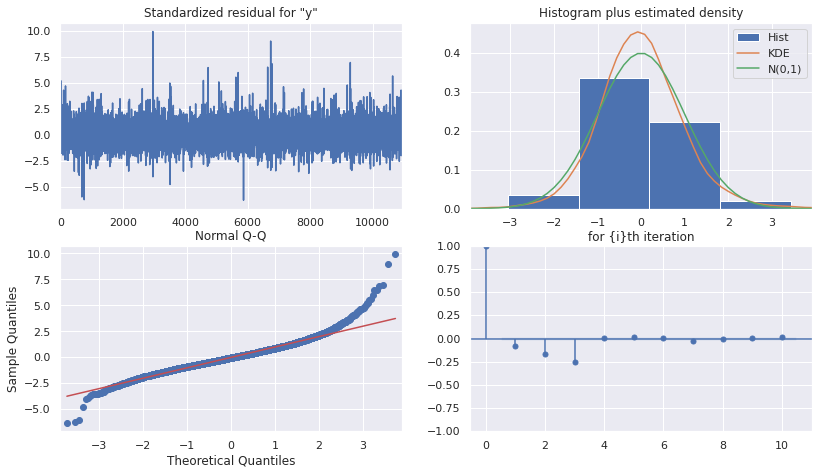

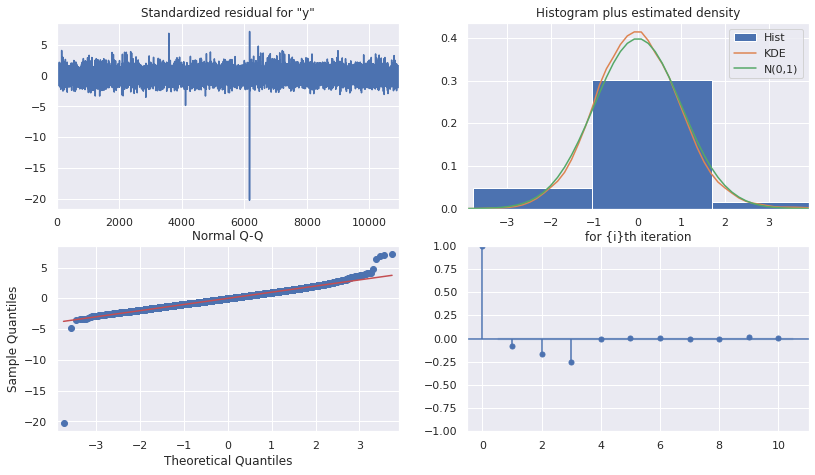

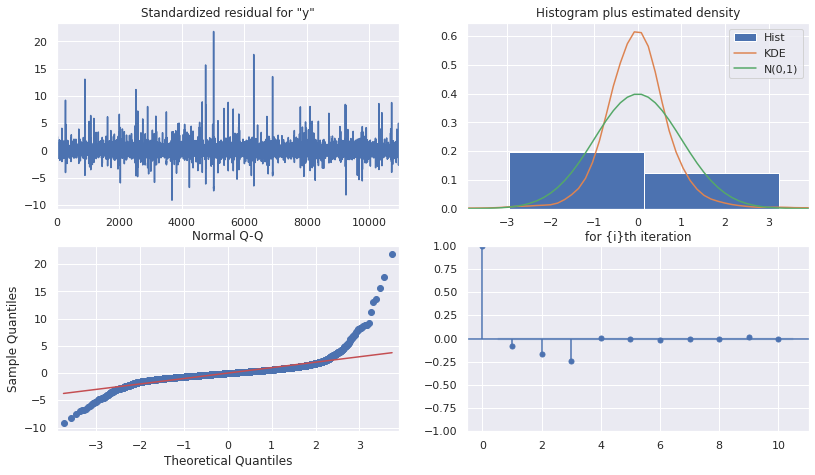

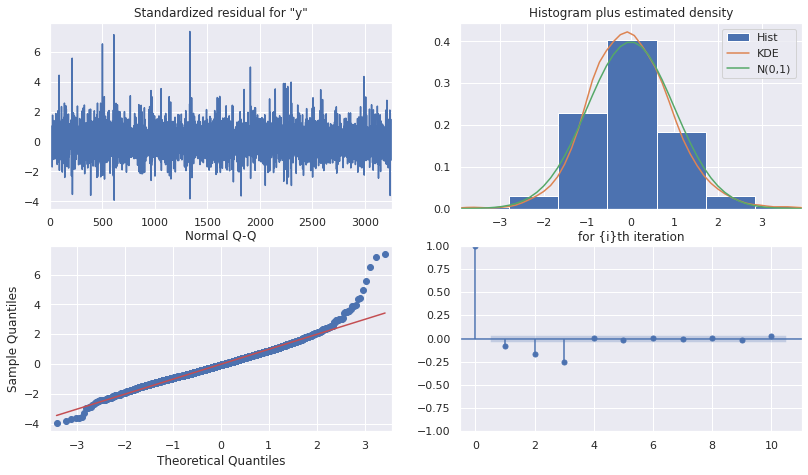

In [578]:
#SARIMAX modelling
metrics=[]
for i in range(1,5):
    X_train, X_test, y_train, y_test=split_data(lag_data[i], 'Vehicles',test_size=0.25)
    results = pm.auto_arima(y_train, #data
                        d=1, # non-seasonal difference order
                        start_p=0, # initial guess for p
                        start_q=0, # initial guess for q
                        max_p=2, # max value of p to test
                        max_q=2, # max value of q to test
                        exogenous= X_train, #including the exogenous variables
                        seasonal=True, # is the time series seasonal? YES
                        m = 24, # the seasonal period
                        #D=1, # seasonal difference order
                        start_P=1, # initial guess for P
                        start_Q=1, # initial guess for Q
                        max_P=1, # max value of P to test
                        max_Q=1, # max value of Q to test
                        information_criterion='aic', # used to select best model
                        trace=True, # print results whilst training
                        error_action='ignore', # ignore orders that don't work
                        stepwise=True, # apply intelligent order search
                        )
    model_opt = SARIMAX(y_train, order=(2,1,0), seasonal_order=(0, 0, 1, 24), exog = X_train, trend='c')
    results = model_opt.fit()
    _ = results.plot_diagnostics(figsize=(12, 7))
    forecast = results.forecast(steps=X_test.shape[0], exog=X_test)
    r2,rmse=model_metrics_out(y_test,forecast)
    metrics.append({'name': models2[i-1], 'r2': r2, 'rmse': rmse})
average_r2 = np.mean([metric['r2'] for metric in metrics])
total_rmse = np.sum([metric['rmse'] for metric in metrics])
metrics.append({'name': 'average R2 and sum RMSE', 'r2': average_r2, 'rmse': total_rmse})
output_metric = pd.DataFrame(metrics)
    

In [579]:
output_metric

name        r2       rmse
0                    ARIMA  0.935662   5.713089
1                    ARIMA  0.848666   2.869207
2                    ARIMA  0.625464   6.345745
3                    ARIMA  0.397440   2.828067
4  average R2 and sum RMSE  0.701808  17.756108

In [580]:
summary=results.summary()
summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                 3258
Model:             SARIMAX(2, 1, 0)x(0, 0, [1], 24)   Log Likelihood               -8130.142
Date:                              Sat, 14 Jan 2023   AIC                          16286.285
Time:                                      15:02:41   BIC                          16365.436
Sample:                                           0   HQIC                         16314.637
                                             - 3258                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0001      0.054      0.003      0.998      -0.106       0.106
x1            -0.0051      0.027     -0.193      0.847      -0.057       0.047
x2             0.0013      0.005      0.269      0.788      -0.008       0.011
x3             0.0994      0.008     13.171      0.000       0.085       0.114
x4             0.4092      0.016     26.210      0.000       0.379       0.440
x5             0.1832      0.015     12.178      0.000       0.154       0.213
x6             0.0942      0.018      5.240      0.000       0.059       0.129
x7             0.0014      0.017      0.081      0.935      -0.032       0.035
x8            -0.0826      0.016     -5.193      0.000      -0.114      -0.051
ar.L1         -0.6763      0.013    -50.108      0.000      -0.703      -0.650
ar.L2         -0.3226      0.013    -24.204      0.000      -0.349      -0.296
ma.S.L24      -0.0099      0.019     -0.523      0.601      -0.047       0.027
sigma2         8.6237      0.144     59.907      0.000       8.342       8.906
===================================================================================
Ljung-Box (L1) (Q):                  21.43   Jarque-Bera (JB):              1618.50
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.85   Skew:                             0.61
Prob(H) (two-sided):                  0.01   Kurtosis:                         6.23
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [524]:
model_opt = SARIMAX(y_train, order=(2,1,0), seasonal_order=(0, 0, 1, 24), exog = X_train, trend='c')

In [525]:
model_opt

In [526]:
results = model_opt.fit()

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           13     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.32550D+00    |proj g|=  3.30730D-02


 This problem is unconstrained.



At iterate    5    f=  3.32526D+00    |proj g|=  2.71225D-03

At iterate   10    f=  3.32525D+00    |proj g|=  1.65120D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   13     12     17      1     0     0   1.959D-04   3.325D+00
  F =   3.3252519324380061     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


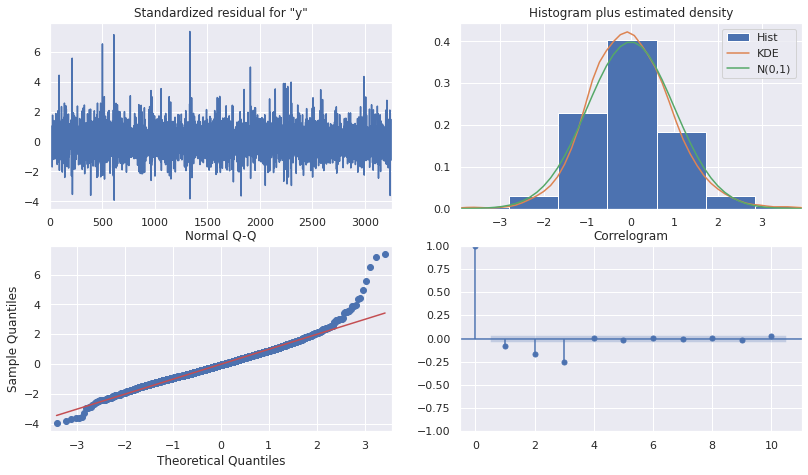

In [584]:
plot_list=[]

plot_list.append(results.plot_diagnostics(figsize=(12, 7)))

In [583]:
plot_list

In [528]:
X_test,X_test.shape

(array([[  1.,  11.,  19., ...,  72.,  81.,  78.],
        [  5.,  23.,  16., ...,  96., 116., 106.],
        [  9.,  27.,  13., ...,  55.,  49.,  37.],
        ...,
        [  1.,  19.,   9., ...,  40.,  41.,  41.],
        [  5.,   7.,  16., ...,  26.,  29.,  30.],
        [ 12.,  17.,  20., ...,  26.,  33.,  34.]]),
 (3647, 8))

In [529]:
X_train,X_train.shape

(array([[ 9., 25.,  2., ..., 47., 49., 46.],
        [ 2., 11., 23., ..., 56., 54., 45.],
        [ 8.,  3.,  7., ..., 23., 30., 37.],
        ...,
        [ 2.,  2.,  4., ..., 31., 34., 35.],
        [ 7., 27., 19., ..., 56., 54., 59.],
        [ 1., 21., 14., ..., 28., 24., 21.]]),
 (10940, 8))

In [531]:
forecast = results.forecast(steps=3647, exog=X_test)

In [532]:
forecast

array([ 69.32763231, 112.41892058,  67.90588468, ...,  53.88722957,
        29.613502  ,  38.18382391])

In [533]:
rmse = calculate_rmse(y_test, forecast)
r2 = calculate_r2_score(y_test, forecast)

In [534]:
rmse

5.882963826163475

In [535]:
r2

0.9351061481986205

## Deep Learning models

In [594]:
lag_data[1]

Vehicles  Month  Day  hour  Vehicles_lag_1  \
DateTime                                                          
2015-11-01 02:00:00        10     11    1     2            13.0   
2015-11-01 03:00:00         7     11    1     3            10.0   
2015-11-01 04:00:00         9     11    1     4             7.0   
2015-11-01 05:00:00         6     11    1     5             9.0   
2015-11-01 06:00:00         9     11    1     6             6.0   
...                       ...    ...  ...   ...             ...   
2017-06-30 19:00:00       105      6   30    19            95.0   
2017-06-30 20:00:00        96      6   30    20           105.0   
2017-06-30 21:00:00        90      6   30    21            96.0   
2017-06-30 22:00:00        84      6   30    22            90.0   
2017-06-30 23:00:00        78      6   30    23            84.0   

                     Vehicles_lag_2  
DateTime                             
2015-11-01 02:00:00            15.0  
2015-11-01 03:00:00            13.0  
2015-11-01 04:00:00            10.0  
2015-11-01 05:00:00             7.0  
2015-11-01 06:00:00             9.0  
...                             ...  
2017-06-30 19:00:00            90.0  
2017-06-30 20:00:00            95.0  
2017-06-30 21:00:00           105.0  
2017-06-30 22:00:00            96.0  
2017-06-30 23:00:00            90.0  

[14590 rows x 6 columns]

In [595]:
def data_cleaning(temp_df):
    temp_df.drop(['Month', 'Day', 'hour'],axis=1, inplace=True)
    #temp_df.set_index('DateTime', inplace=True)
    return temp_df

In [118]:
def total_duration_sec(temp_df):
    temp_df['Seconds'] = temp_df.index.map(pd.Timestamp.timestamp)
    return temp_df

In [119]:
def temp_feature_creation(temp_df):
    day = 60*60*24
    year = 365.2425*day
    temp_df['Day sin'] = np.sin(temp_df['Seconds'] * (2* np.pi / day))
    temp_df['Day cos'] = np.cos(temp_df['Seconds'] * (2 * np.pi / day))
    temp_df['Year sin'] = np.sin(temp_df['Seconds'] * (2 * np.pi / year))
    temp_df['Year cos'] = np.cos(temp_df['Seconds'] * (2 * np.pi / year))
    temp_df = temp_df.drop('Seconds', axis=1)
    return temp_df

In [120]:
def df_to_X_y2(df, window_size=6):
    df_as_np = df.to_numpy()
    X = []
    y = []
    for i in range(len(df_as_np)-window_size):
        row = [r for r in df_as_np[i:i+window_size]]
        X.append(row)
        label = df_as_np[i+window_size][0]
        y.append(label)
    return np.array(X), np.array(y)

In [121]:
def train_test_val_split(X2,y2):
    X2_train, y2_train = X2[:int(.6*(len(X2)))], y2[:int(.6*(len(y2)))]
    X2_val, y2_val = X2[int(.6*(len(X2))):int(.8*(len(X2)))], y2[int(.6*(len(y2))):int(.8*(len(y2)))]
    X2_test, y2_test = X2[int(.8*len(X2)):], y2[int(.8*len(y2)):]
    return X2_train,X2_val,X2_test,y2_train,y2_val,y2_test

In [122]:
def preprocess(X):
    temp_training_mean = np.mean(X_train[:, :, 0])
    temp_training_std = np.std(X_train[:, :, 0])
    X[:, :, 0] = (X[:, :, 0] - temp_training_mean) / temp_training_std
    return X

In [597]:
def model_creation(model_name):
    if model_name=='LSTM':
        model = Sequential()
        model.add(InputLayer((6, 7)))
        model.add(LSTM(64))
        model.add(BatchNormalization())
        model.add(Dense(8, 'relu'))
        model.add(Dropout(0.3))
        model.add(Dense(1, 'linear'))
    elif model_name=='GRU':
        model = Sequential()
        model.add(InputLayer((6, 7)))
        model.add(LSTM(64))
        model.add(Dense(32, 'relu'))
        model.add(Dropout(0.3))
        model.add(BatchNormalization())
        model.add(Dense(8, 'relu'))
        model.add(Dropout(0.3))
        model.add(Dense(1, 'linear'))
    return model

In [295]:
from keras.callbacks import EarlyStopping
def model_fitting(model):
    cp4 = ModelCheckpoint('model4/', save_best_only=True)
    model.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0002), metrics=[RootMeanSquaredError()])
    es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=3)
    history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=30, callbacks=[cp4, es])
    return history

In [296]:
def history_loss_mse(history):
    train_loss = history.history['loss']
    val_loss = history.history['val_loss']
    train_mse = history.history['root_mean_squared_error']
    val_mse = history.history['val_root_mean_squared_error']
    return train_loss,val_loss,train_mse,val_mse

In [297]:
def predict_model(model, Xtest):
    y_predict = model.predict(Xtest)
    return y_predict

In [298]:
def plotting_loss(train_loss,val_loss):
    # Plot the training and validation loss
    plt.plot(train_loss, label='Training Loss')
    plt.plot(val_loss, label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

In [299]:
def plotting_mse(train_mse,val_mse):
    # Plot the training and validation loss
    plt.plot(train_mse, label='Training MSE')
    plt.plot(val_mse, label='Validation MSE')
    plt.xlabel('Epoch')
    plt.ylabel('MSE')
    plt.legend()
    plt.show()

In [602]:
def plot_predictions(X, y, start=0, end=len(X)):
      predictions = y.flatten()
      df = pd.DataFrame(data={'Predictions':predictions, 'Actuals':X})
      plt.figure(figsize=(14,5))
      plt.plot(df['Predictions'][start:end])
      plt.plot(df['Actuals'][start:end])
      plt.legend(df)
      plt.show()
      return df, mse(X, predictions)

In [300]:
from sklearn.metrics import mean_squared_error as mse
def plot_predictions1(model, X, y, start=0, end=len(X)):
      predictions = model.predict(X).flatten()
      df = pd.DataFrame(data={'Predictions':predictions, 'Actuals':y})
      plt.figure(figsize=(14,5))
      plt.plot(df['Predictions'][start:end])
      plt.plot(df['Actuals'][start:end])
      plt.legend(df)
      plt.show()
      return df, mse(y, predictions)

## LSTM

In [598]:
training_loss= []
validation_loss= []
training_mse= []
validation_mse= []
test=[]
prediction=[]
for i in range(1,5):
    temp_df=lag_data[i].copy()
    cleaned_data=data_cleaning(temp_df)
    sec_data=total_duration_sec(cleaned_data)
    final_data=temp_feature_creation(sec_data)
    X,y= df_to_X_y2(final_data)
    X_train,X_val,X_test,y_train,y_val,y_test = train_test_val_split(X,y)
    X_train=preprocess(X_train)
    X_val = preprocess(X_val)
    X_test= preprocess(X_test)
    model = model_creation('LSTM')
    history = model_fitting(model)
    y_predict=predict_model(model, X_test)
    train_loss,val_loss,train_mse,val_mse = history_loss_mse(history)
    training_loss.append(train_loss)
    validation_loss.append(val_loss)
    training_mse.append(train_mse)
    validation_mse.append(val_mse)
    test.append(y_test)
    prediction.append(y_predict)

Epoch 1/30
272/274 [============================>.] - ETA: 0s - loss: 1213.8087 - root_mean_squared_error: 34.8398

INFO:tensorflow:Assets written to: model4/assets


INFO:tensorflow:Assets written to: model4/assets


274/274 [==============================] - 4s 11ms/step - loss: 1213.2874 - root_mean_squared_error: 34.8323 - val_loss: 3006.6123 - val_root_mean_squared_error: 54.8326
Epoch 2/30
255/274 [==========================>...] - ETA: 0s - loss: 910.0665 - root_mean_squared_error: 30.1673

INFO:tensorflow:Assets written to: model4/assets


INFO:tensorflow:Assets written to: model4/assets


274/274 [==============================] - 3s 9ms/step - loss: 898.6118 - root_mean_squared_error: 29.9769 - val_loss: 1641.1917 - val_root_mean_squared_error: 40.5116
Epoch 3/30
253/274 [==========================>...] - ETA: 0s - loss: 632.9854 - root_mean_squared_error: 25.1592

INFO:tensorflow:Assets written to: model4/assets


INFO:tensorflow:Assets written to: model4/assets


274/274 [==============================] - 2s 9ms/step - loss: 622.7706 - root_mean_squared_error: 24.9554 - val_loss: 903.3963 - val_root_mean_squared_error: 30.0566
Epoch 4/30
251/274 [==========================>...] - ETA: 0s - loss: 437.0598 - root_mean_squared_error: 20.9060

INFO:tensorflow:Assets written to: model4/assets


INFO:tensorflow:Assets written to: model4/assets


274/274 [==============================] - 2s 9ms/step - loss: 430.5976 - root_mean_squared_error: 20.7508 - val_loss: 513.6090 - val_root_mean_squared_error: 22.6629
Epoch 5/30
256/274 [===========================>..] - ETA: 0s - loss: 345.5913 - root_mean_squared_error: 18.5901

INFO:tensorflow:Assets written to: model4/assets


INFO:tensorflow:Assets written to: model4/assets


274/274 [==============================] - 4s 13ms/step - loss: 341.6532 - root_mean_squared_error: 18.4839 - val_loss: 343.4008 - val_root_mean_squared_error: 18.5311
Epoch 6/30
254/274 [==========================>...] - ETA: 0s - loss: 285.9786 - root_mean_squared_error: 16.9109

INFO:tensorflow:Assets written to: model4/assets


INFO:tensorflow:Assets written to: model4/assets


274/274 [==============================] - 3s 10ms/step - loss: 285.6528 - root_mean_squared_error: 16.9013 - val_loss: 256.8288 - val_root_mean_squared_error: 16.0259
Epoch 7/30
254/274 [==========================>...] - ETA: 0s - loss: 277.7660 - root_mean_squared_error: 16.6663

INFO:tensorflow:Assets written to: model4/assets


INFO:tensorflow:Assets written to: model4/assets


274/274 [==============================] - 3s 9ms/step - loss: 274.9273 - root_mean_squared_error: 16.5809 - val_loss: 236.0833 - val_root_mean_squared_error: 15.3650
Epoch 8/30
252/274 [==========================>...] - ETA: 0s - loss: 260.2361 - root_mean_squared_error: 16.1318

INFO:tensorflow:Assets written to: model4/assets


INFO:tensorflow:Assets written to: model4/assets


274/274 [==============================] - 2s 9ms/step - loss: 259.1834 - root_mean_squared_error: 16.0992 - val_loss: 214.0545 - val_root_mean_squared_error: 14.6306
Epoch 9/30
257/274 [===========================>..] - ETA: 0s - loss: 244.0116 - root_mean_squared_error: 15.6209

INFO:tensorflow:Assets written to: model4/assets


INFO:tensorflow:Assets written to: model4/assets


274/274 [==============================] - 4s 13ms/step - loss: 246.2765 - root_mean_squared_error: 15.6932 - val_loss: 200.9710 - val_root_mean_squared_error: 14.1764
Epoch 10/30
255/274 [==========================>...] - ETA: 0s - loss: 231.1032 - root_mean_squared_error: 15.2021

INFO:tensorflow:Assets written to: model4/assets


INFO:tensorflow:Assets written to: model4/assets


274/274 [==============================] - 3s 10ms/step - loss: 233.4298 - root_mean_squared_error: 15.2784 - val_loss: 121.3429 - val_root_mean_squared_error: 11.0156
Epoch 11/30
274/274 [==============================] - 1s 2ms/step - loss: 226.9363 - root_mean_squared_error: 15.0644 - val_loss: 177.6673 - val_root_mean_squared_error: 13.3292
Epoch 12/30
274/274 [==============================] - 1s 2ms/step - loss: 225.0093 - root_mean_squared_error: 15.0003 - val_loss: 144.8332 - val_root_mean_squared_error: 12.0347
Epoch 13/30
274/274 [==============================] - 1s 2ms/step - loss: 212.7753 - root_mean_squared_error: 14.5868 - val_loss: 152.6603 - val_root_mean_squared_error: 12.3556
Epoch 13: early stopping
92/92 [==============================] - 0s 867us/step
Epoch 1/30
251/274 [==========================>...] - ETA: 0s - loss: 48.2260 - root_mean_squared_error: 6.9445

INFO:tensorflow:Assets written to: model4/assets


INFO:tensorflow:Assets written to: model4/assets


274/274 [==============================] - 4s 10ms/step - loss: 46.6310 - root_mean_squared_error: 6.8287 - val_loss: 89.8207 - val_root_mean_squared_error: 9.4774
Epoch 2/30
256/274 [===========================>..] - ETA: 0s - loss: 25.4286 - root_mean_squared_error: 5.0427

INFO:tensorflow:Assets written to: model4/assets


INFO:tensorflow:Assets written to: model4/assets


274/274 [==============================] - 2s 9ms/step - loss: 25.3422 - root_mean_squared_error: 5.0341 - val_loss: 33.2803 - val_root_mean_squared_error: 5.7689
Epoch 3/30
252/274 [==========================>...] - ETA: 0s - loss: 21.9920 - root_mean_squared_error: 4.6896

INFO:tensorflow:Assets written to: model4/assets


INFO:tensorflow:Assets written to: model4/assets


274/274 [==============================] - 4s 14ms/step - loss: 21.8942 - root_mean_squared_error: 4.6791 - val_loss: 21.2955 - val_root_mean_squared_error: 4.6147
Epoch 4/30
274/274 [==============================] - 1s 2ms/step - loss: 20.9775 - root_mean_squared_error: 4.5801 - val_loss: 21.3964 - val_root_mean_squared_error: 4.6256
Epoch 5/30
252/274 [==========================>...] - ETA: 0s - loss: 20.8710 - root_mean_squared_error: 4.5685

INFO:tensorflow:Assets written to: model4/assets


INFO:tensorflow:Assets written to: model4/assets


274/274 [==============================] - 3s 10ms/step - loss: 20.8597 - root_mean_squared_error: 4.5672 - val_loss: 17.6723 - val_root_mean_squared_error: 4.2038
Epoch 6/30
261/274 [===========================>..] - ETA: 0s - loss: 20.4618 - root_mean_squared_error: 4.5235

INFO:tensorflow:Assets written to: model4/assets


INFO:tensorflow:Assets written to: model4/assets


274/274 [==============================] - 3s 10ms/step - loss: 20.3509 - root_mean_squared_error: 4.5112 - val_loss: 16.3842 - val_root_mean_squared_error: 4.0477
Epoch 7/30
262/274 [===========================>..] - ETA: 0s - loss: 20.0508 - root_mean_squared_error: 4.4778

INFO:tensorflow:Assets written to: model4/assets


INFO:tensorflow:Assets written to: model4/assets


274/274 [==============================] - 3s 9ms/step - loss: 19.9300 - root_mean_squared_error: 4.4643 - val_loss: 14.8072 - val_root_mean_squared_error: 3.8480
Epoch 8/30
260/274 [===========================>..] - ETA: 0s - loss: 19.1415 - root_mean_squared_error: 4.3751

INFO:tensorflow:Assets written to: model4/assets


INFO:tensorflow:Assets written to: model4/assets


274/274 [==============================] - 2s 9ms/step - loss: 19.0599 - root_mean_squared_error: 4.3658 - val_loss: 12.2289 - val_root_mean_squared_error: 3.4970
Epoch 9/30
274/274 [==============================] - 1s 2ms/step - loss: 18.9255 - root_mean_squared_error: 4.3503 - val_loss: 13.8537 - val_root_mean_squared_error: 3.7221
Epoch 10/30
268/274 [============================>.] - ETA: 0s - loss: 18.2811 - root_mean_squared_error: 4.2756

INFO:tensorflow:Assets written to: model4/assets


INFO:tensorflow:Assets written to: model4/assets


274/274 [==============================] - 4s 14ms/step - loss: 18.3609 - root_mean_squared_error: 4.2850 - val_loss: 12.1362 - val_root_mean_squared_error: 3.4837
Epoch 11/30
274/274 [==============================] - 1s 2ms/step - loss: 17.6768 - root_mean_squared_error: 4.2044 - val_loss: 12.6318 - val_root_mean_squared_error: 3.5541
Epoch 12/30
274/274 [==============================] - 1s 2ms/step - loss: 17.8101 - root_mean_squared_error: 4.2202 - val_loss: 15.1075 - val_root_mean_squared_error: 3.8868
Epoch 13/30
255/274 [==========================>...] - ETA: 0s - loss: 17.2190 - root_mean_squared_error: 4.1496

INFO:tensorflow:Assets written to: model4/assets


INFO:tensorflow:Assets written to: model4/assets


274/274 [==============================] - 3s 10ms/step - loss: 17.0827 - root_mean_squared_error: 4.1331 - val_loss: 10.1239 - val_root_mean_squared_error: 3.1818
Epoch 14/30
274/274 [==============================] - 1s 2ms/step - loss: 16.4186 - root_mean_squared_error: 4.0520 - val_loss: 12.2397 - val_root_mean_squared_error: 3.4985
Epoch 15/30
255/274 [==========================>...] - ETA: 0s - loss: 15.7530 - root_mean_squared_error: 3.9690

INFO:tensorflow:Assets written to: model4/assets


INFO:tensorflow:Assets written to: model4/assets


274/274 [==============================] - 3s 10ms/step - loss: 15.7099 - root_mean_squared_error: 3.9636 - val_loss: 9.6871 - val_root_mean_squared_error: 3.1124
Epoch 16/30
274/274 [==============================] - 1s 2ms/step - loss: 14.9308 - root_mean_squared_error: 3.8640 - val_loss: 13.2763 - val_root_mean_squared_error: 3.6437
Epoch 17/30
274/274 [==============================] - 1s 2ms/step - loss: 14.5012 - root_mean_squared_error: 3.8080 - val_loss: 12.6612 - val_root_mean_squared_error: 3.5583
Epoch 18/30
274/274 [==============================] - 1s 2ms/step - loss: 14.4423 - root_mean_squared_error: 3.8003 - val_loss: 16.2074 - val_root_mean_squared_error: 4.0258
Epoch 18: early stopping
92/92 [==============================] - 0s 838us/step
Epoch 1/30
254/274 [==========================>...] - ETA: 0s - loss: 139.6971 - root_mean_squared_error: 11.8194

INFO:tensorflow:Assets written to: model4/assets


INFO:tensorflow:Assets written to: model4/assets


274/274 [==============================] - 4s 10ms/step - loss: 135.5356 - root_mean_squared_error: 11.6420 - val_loss: 226.2890 - val_root_mean_squared_error: 15.0429
Epoch 2/30
263/274 [===========================>..] - ETA: 0s - loss: 78.9375 - root_mean_squared_error: 8.8847

INFO:tensorflow:Assets written to: model4/assets


INFO:tensorflow:Assets written to: model4/assets


274/274 [==============================] - 4s 15ms/step - loss: 78.7094 - root_mean_squared_error: 8.8718 - val_loss: 107.9192 - val_root_mean_squared_error: 10.3884
Epoch 3/30
274/274 [==============================] - ETA: 0s - loss: 60.5379 - root_mean_squared_error: 7.7806

INFO:tensorflow:Assets written to: model4/assets


INFO:tensorflow:Assets written to: model4/assets


274/274 [==============================] - 3s 11ms/step - loss: 60.5379 - root_mean_squared_error: 7.7806 - val_loss: 72.1665 - val_root_mean_squared_error: 8.4951
Epoch 4/30
259/274 [===========================>..] - ETA: 0s - loss: 53.8923 - root_mean_squared_error: 7.3411

INFO:tensorflow:Assets written to: model4/assets


INFO:tensorflow:Assets written to: model4/assets


274/274 [==============================] - 3s 10ms/step - loss: 52.9758 - root_mean_squared_error: 7.2784 - val_loss: 55.8802 - val_root_mean_squared_error: 7.4753
Epoch 5/30
264/274 [===========================>..] - ETA: 0s - loss: 51.2706 - root_mean_squared_error: 7.1604

INFO:tensorflow:Assets written to: model4/assets


INFO:tensorflow:Assets written to: model4/assets


274/274 [==============================] - 2s 9ms/step - loss: 50.5415 - root_mean_squared_error: 7.1093 - val_loss: 52.2064 - val_root_mean_squared_error: 7.2254
Epoch 6/30
268/274 [============================>.] - ETA: 0s - loss: 44.8797 - root_mean_squared_error: 6.6992

INFO:tensorflow:Assets written to: model4/assets


INFO:tensorflow:Assets written to: model4/assets


274/274 [==============================] - 2s 9ms/step - loss: 44.6304 - root_mean_squared_error: 6.6806 - val_loss: 51.0116 - val_root_mean_squared_error: 7.1422
Epoch 7/30
263/274 [===========================>..] - ETA: 0s - loss: 44.2590 - root_mean_squared_error: 6.6527

INFO:tensorflow:Assets written to: model4/assets


INFO:tensorflow:Assets written to: model4/assets


274/274 [==============================] - 4s 15ms/step - loss: 46.3267 - root_mean_squared_error: 6.8064 - val_loss: 45.7393 - val_root_mean_squared_error: 6.7631
Epoch 8/30
274/274 [==============================] - 1s 2ms/step - loss: 43.9220 - root_mean_squared_error: 6.6274 - val_loss: 49.0443 - val_root_mean_squared_error: 7.0032
Epoch 9/30
253/274 [==========================>...] - ETA: 0s - loss: 43.3589 - root_mean_squared_error: 6.5847

INFO:tensorflow:Assets written to: model4/assets


INFO:tensorflow:Assets written to: model4/assets


274/274 [==============================] - 3s 10ms/step - loss: 42.2877 - root_mean_squared_error: 6.5029 - val_loss: 44.5486 - val_root_mean_squared_error: 6.6745
Epoch 10/30
258/274 [===========================>..] - ETA: 0s - loss: 41.0366 - root_mean_squared_error: 6.4060

INFO:tensorflow:Assets written to: model4/assets


INFO:tensorflow:Assets written to: model4/assets


274/274 [==============================] - 3s 10ms/step - loss: 42.1852 - root_mean_squared_error: 6.4950 - val_loss: 42.4379 - val_root_mean_squared_error: 6.5144
Epoch 11/30
274/274 [==============================] - 1s 2ms/step - loss: 41.9377 - root_mean_squared_error: 6.4759 - val_loss: 44.0602 - val_root_mean_squared_error: 6.6378
Epoch 12/30
261/274 [===========================>..] - ETA: 0s - loss: 38.8415 - root_mean_squared_error: 6.2323

INFO:tensorflow:Assets written to: model4/assets


INFO:tensorflow:Assets written to: model4/assets


274/274 [==============================] - 3s 9ms/step - loss: 40.3342 - root_mean_squared_error: 6.3509 - val_loss: 41.3593 - val_root_mean_squared_error: 6.4311
Epoch 13/30
274/274 [==============================] - 1s 2ms/step - loss: 41.3936 - root_mean_squared_error: 6.4338 - val_loss: 45.4801 - val_root_mean_squared_error: 6.7439
Epoch 14/30
274/274 [==============================] - 1s 2ms/step - loss: 42.0693 - root_mean_squared_error: 6.4861 - val_loss: 41.4885 - val_root_mean_squared_error: 6.4412
Epoch 15/30
274/274 [==============================] - 1s 2ms/step - loss: 39.8752 - root_mean_squared_error: 6.3147 - val_loss: 42.2585 - val_root_mean_squared_error: 6.5007
Epoch 15: early stopping
92/92 [==============================] - 0s 862us/step
Epoch 1/30
74/82 [==========================>...] - ETA: 0s - loss: 44.6947 - root_mean_squared_error: 6.6854

INFO:tensorflow:Assets written to: model4/assets


INFO:tensorflow:Assets written to: model4/assets


82/82 [==============================] - 5s 48ms/step - loss: 43.9382 - root_mean_squared_error: 6.6286 - val_loss: 48.0486 - val_root_mean_squared_error: 6.9317
Epoch 2/30
74/82 [==========================>...] - ETA: 0s - loss: 29.2633 - root_mean_squared_error: 5.4096

INFO:tensorflow:Assets written to: model4/assets


INFO:tensorflow:Assets written to: model4/assets


82/82 [==============================] - 2s 30ms/step - loss: 28.8780 - root_mean_squared_error: 5.3738 - val_loss: 39.9862 - val_root_mean_squared_error: 6.3235
Epoch 3/30
78/82 [===========================>..] - ETA: 0s - loss: 21.7616 - root_mean_squared_error: 4.6649

INFO:tensorflow:Assets written to: model4/assets


INFO:tensorflow:Assets written to: model4/assets


82/82 [==============================] - 2s 29ms/step - loss: 21.7541 - root_mean_squared_error: 4.6641 - val_loss: 29.9440 - val_root_mean_squared_error: 5.4721
Epoch 4/30
78/82 [===========================>..] - ETA: 0s - loss: 18.4418 - root_mean_squared_error: 4.2944

INFO:tensorflow:Assets written to: model4/assets


INFO:tensorflow:Assets written to: model4/assets


82/82 [==============================] - 2s 27ms/step - loss: 18.5159 - root_mean_squared_error: 4.3030 - val_loss: 21.1754 - val_root_mean_squared_error: 4.6017
Epoch 5/30
75/82 [==========================>...] - ETA: 0s - loss: 17.3096 - root_mean_squared_error: 4.1605

INFO:tensorflow:Assets written to: model4/assets


INFO:tensorflow:Assets written to: model4/assets


82/82 [==============================] - 2s 26ms/step - loss: 17.0705 - root_mean_squared_error: 4.1316 - val_loss: 15.8636 - val_root_mean_squared_error: 3.9829
Epoch 6/30
78/82 [===========================>..] - ETA: 0s - loss: 15.3510 - root_mean_squared_error: 3.9180

INFO:tensorflow:Assets written to: model4/assets


INFO:tensorflow:Assets written to: model4/assets


82/82 [==============================] - 4s 44ms/step - loss: 15.4770 - root_mean_squared_error: 3.9341 - val_loss: 13.3042 - val_root_mean_squared_error: 3.6475
Epoch 7/30
77/82 [===========================>..] - ETA: 0s - loss: 14.9825 - root_mean_squared_error: 3.8707

INFO:tensorflow:Assets written to: model4/assets


INFO:tensorflow:Assets written to: model4/assets


82/82 [==============================] - 2s 30ms/step - loss: 15.4309 - root_mean_squared_error: 3.9282 - val_loss: 10.7091 - val_root_mean_squared_error: 3.2725
Epoch 8/30
82/82 [==============================] - 0s 3ms/step - loss: 14.6402 - root_mean_squared_error: 3.8263 - val_loss: 11.3477 - val_root_mean_squared_error: 3.3686
Epoch 9/30
77/82 [===========================>..] - ETA: 0s - loss: 13.6239 - root_mean_squared_error: 3.6911

INFO:tensorflow:Assets written to: model4/assets


INFO:tensorflow:Assets written to: model4/assets


82/82 [==============================] - 2s 29ms/step - loss: 13.6079 - root_mean_squared_error: 3.6889 - val_loss: 10.3689 - val_root_mean_squared_error: 3.2201
Epoch 10/30
77/82 [===========================>..] - ETA: 0s - loss: 14.8722 - root_mean_squared_error: 3.8565

INFO:tensorflow:Assets written to: model4/assets


INFO:tensorflow:Assets written to: model4/assets


82/82 [==============================] - 2s 27ms/step - loss: 14.7927 - root_mean_squared_error: 3.8461 - val_loss: 9.6359 - val_root_mean_squared_error: 3.1042
Epoch 11/30
82/82 [==============================] - 0s 3ms/step - loss: 13.7277 - root_mean_squared_error: 3.7051 - val_loss: 10.3771 - val_root_mean_squared_error: 3.2214
Epoch 12/30
82/82 [==============================] - 0s 2ms/step - loss: 12.9178 - root_mean_squared_error: 3.5941 - val_loss: 10.5889 - val_root_mean_squared_error: 3.2541
Epoch 13/30
82/82 [==============================] - 0s 2ms/step - loss: 13.1835 - root_mean_squared_error: 3.6309 - val_loss: 9.8044 - val_root_mean_squared_error: 3.1312
Epoch 13: early stopping
28/28 [==============================] - 0s 959us/step


In [599]:
final_data

Vehicles  Vehicles_lag_1  Vehicles_lag_2       Seconds  \
DateTime                                                                      
2017-01-01 00:00:00         3            39.0            26.0  1.483229e+09   
2017-01-01 01:00:00         1             3.0            39.0  1.483232e+09   
2017-01-01 02:00:00         4             1.0             3.0  1.483236e+09   
2017-01-01 03:00:00         4             4.0             1.0  1.483240e+09   
2017-01-01 04:00:00         2             4.0             4.0  1.483243e+09   
...                       ...             ...             ...           ...   
2017-06-30 19:00:00        11            17.0            16.0  1.498849e+09   
2017-06-30 20:00:00        30            11.0            17.0  1.498853e+09   
2017-06-30 21:00:00        16            30.0            11.0  1.498856e+09   
2017-06-30 22:00:00        22            16.0            30.0  1.498860e+09   
2017-06-30 23:00:00        12            22.0            16.0  1.498864e+09   

                          Day sin   Day cos  Year sin  Year cos  
DateTime                                                         
2017-01-01 00:00:00  2.504006e-13  1.000000  0.010364  0.999946  
2017-01-01 01:00:00  2.588190e-01  0.965926  0.011081  0.999939  
2017-01-01 02:00:00  5.000000e-01  0.866025  0.011798  0.999930  
2017-01-01 03:00:00  7.071068e-01  0.707107  0.012515  0.999922  
2017-01-01 04:00:00  8.660254e-01  0.500000  0.013231  0.999912  
...                           ...       ...       ...       ...  
2017-06-30 19:00:00 -9.659258e-01  0.258819  0.021108 -0.999777  
2017-06-30 20:00:00 -8.660254e-01  0.500000  0.020391 -0.999792  
2017-06-30 21:00:00 -7.071068e-01  0.707107  0.019674 -0.999806  
2017-06-30 22:00:00 -5.000000e-01  0.866025  0.018958 -0.999820  
2017-06-30 23:00:00 -2.588190e-01  0.965926  0.018241 -0.999834  

[4344 rows x 8 columns]

In [600]:
X_test.shape

(868, 6, 7)

for junction 1:


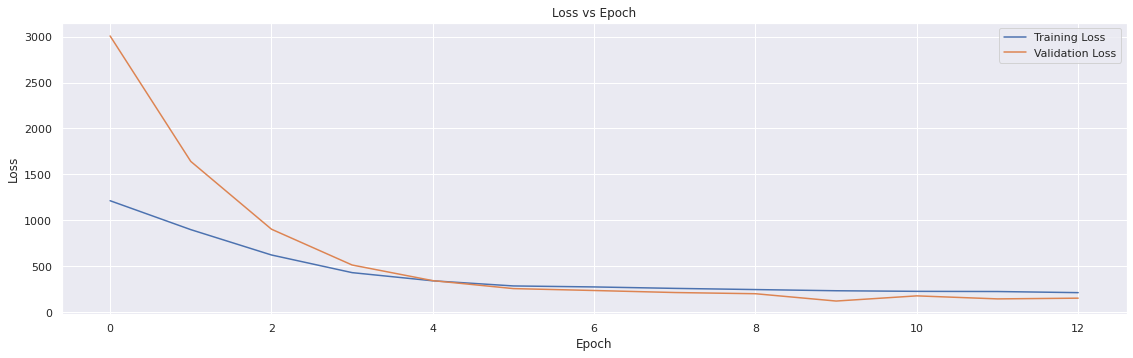

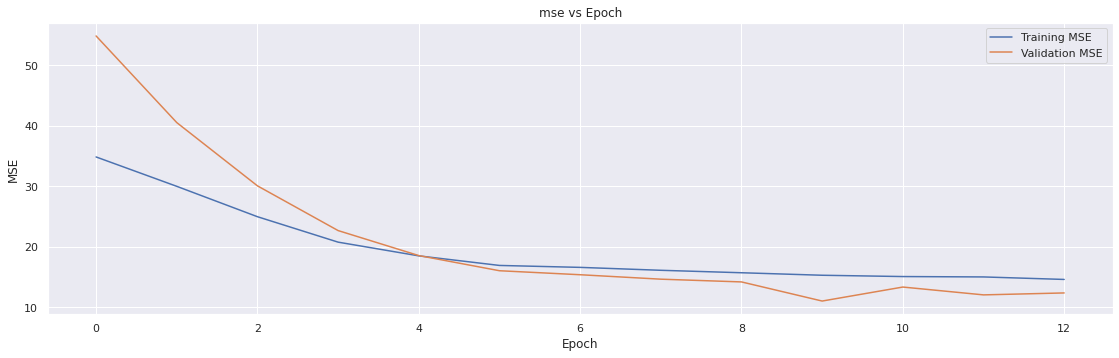

for junction 2:


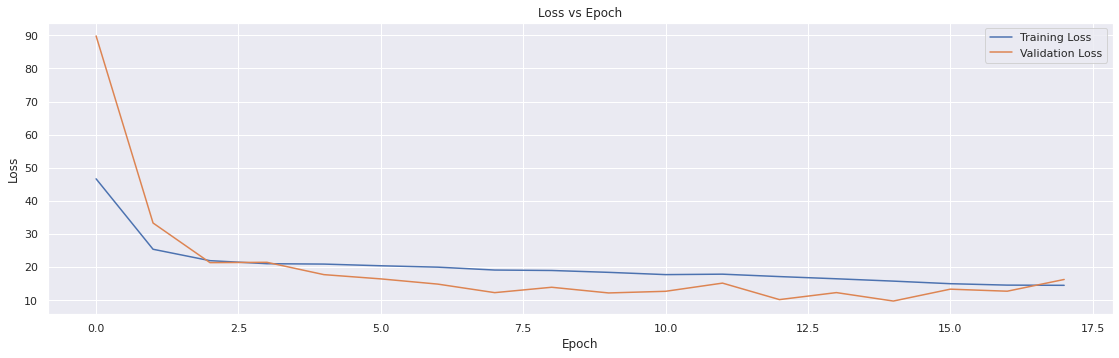

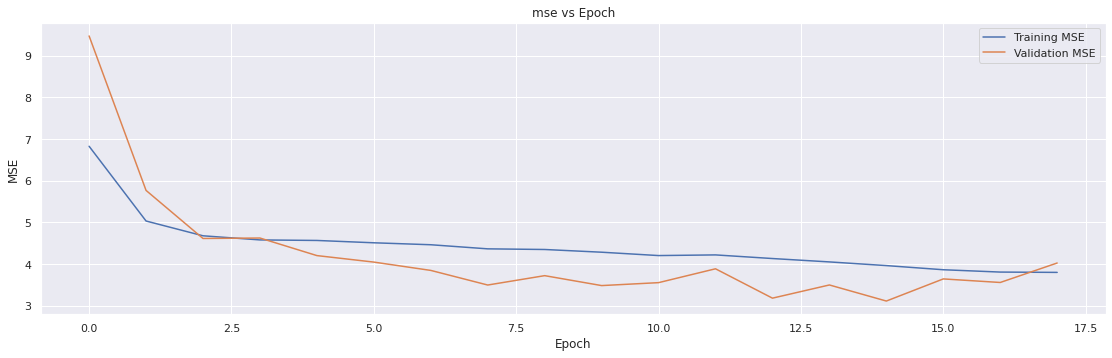

for junction 3:


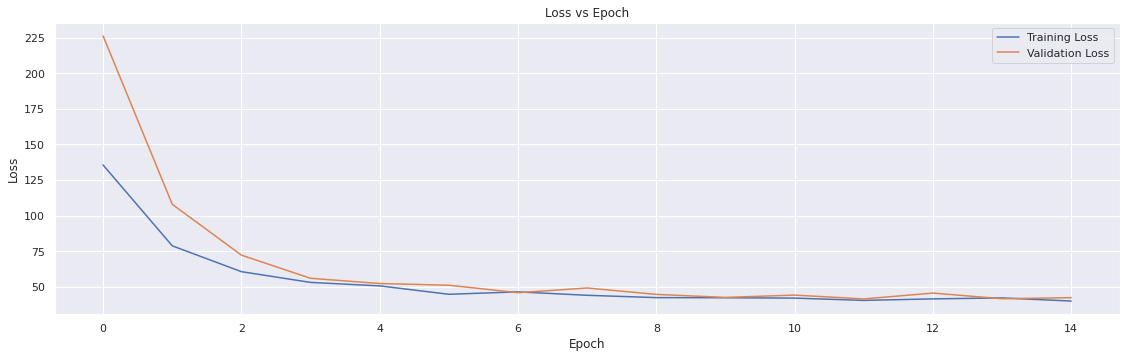

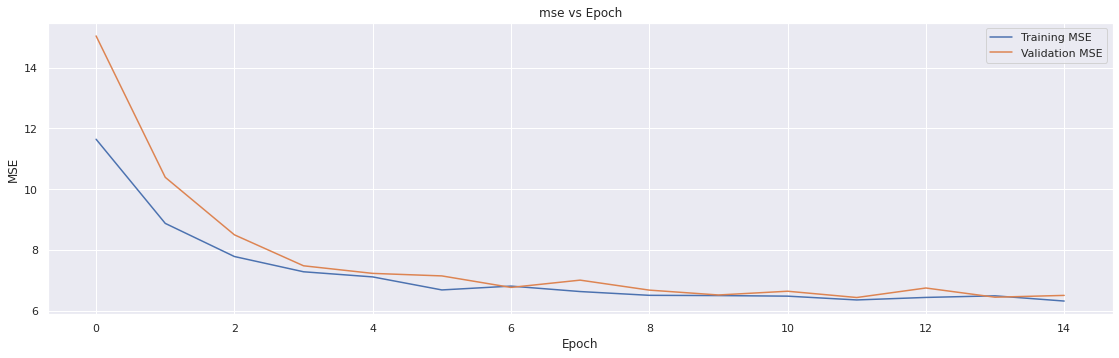

for junction 4:


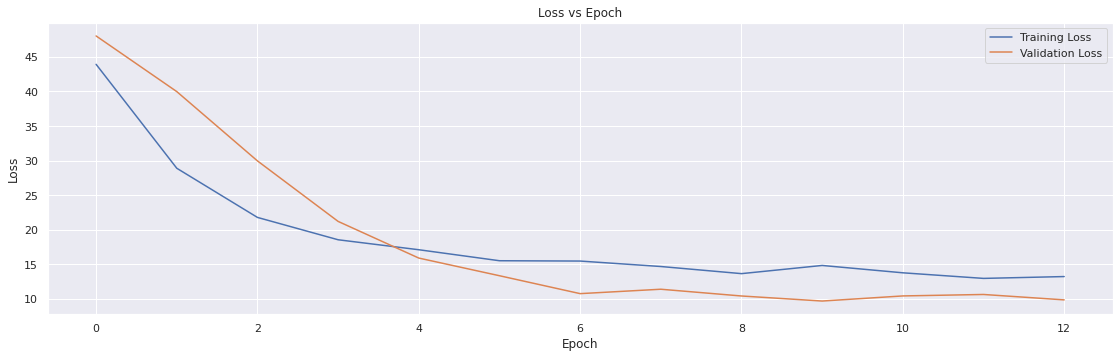

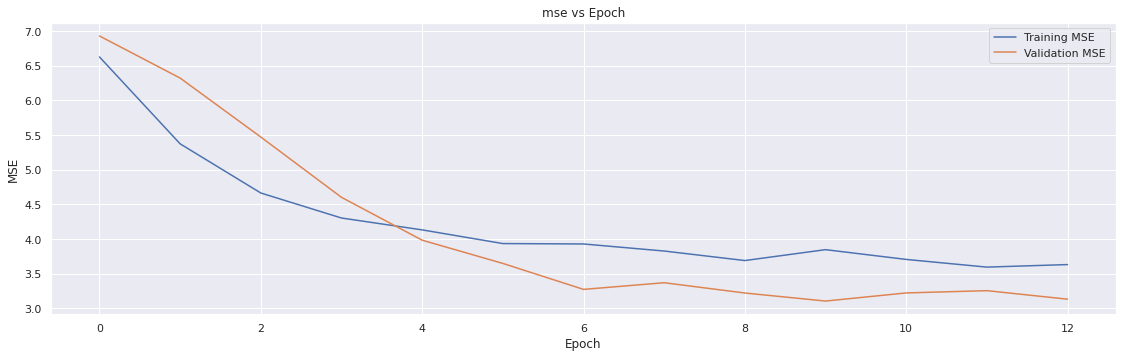

In [601]:
for i in range(1,5):
    print(f"for junction {i}:")
    plt.title('Loss vs Epoch')
    plotting_loss(training_loss[i-1],validation_loss[i-1])
    plt.title('mse vs Epoch')
    plotting_mse(training_mse[i-1],validation_mse[i-1])

for junction 1:


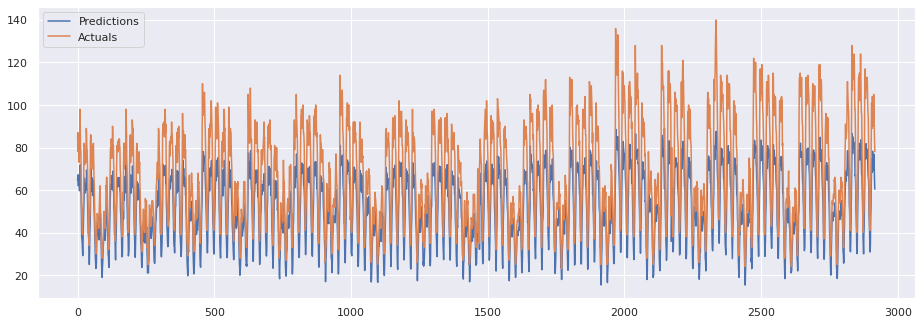

for junction 2:


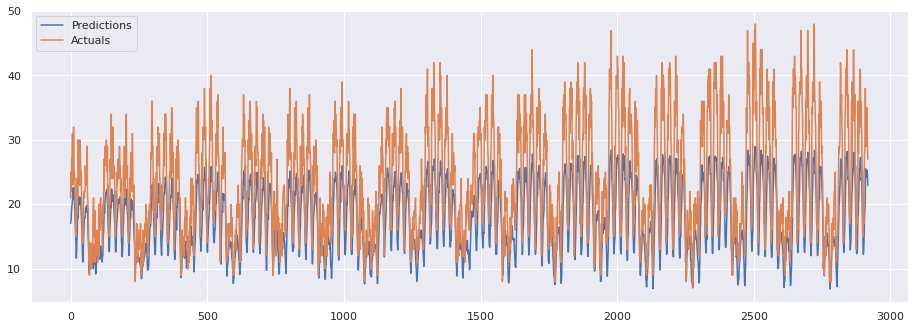

for junction 3:


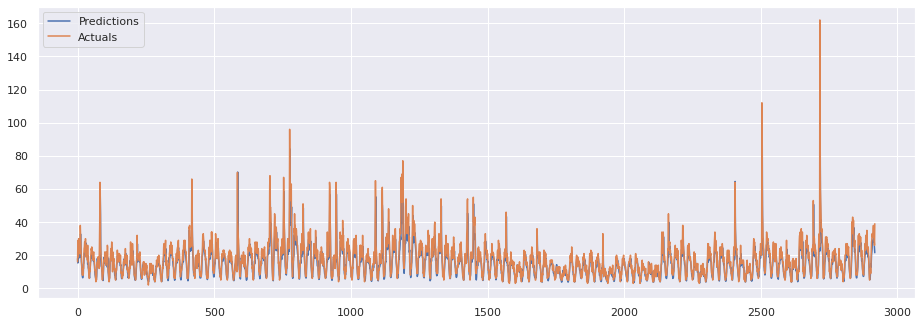

for junction 4:


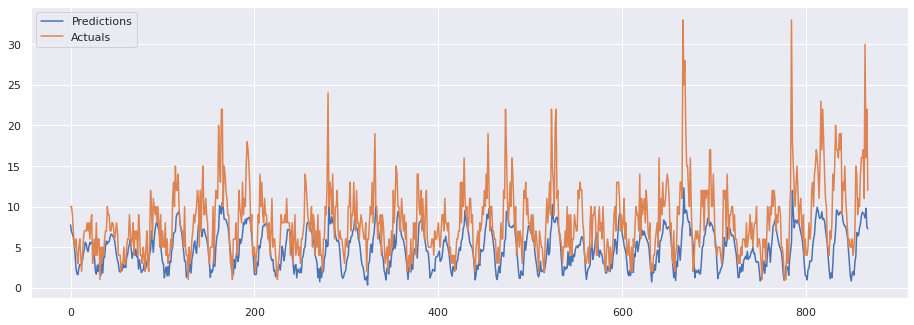

In [603]:
for i in range(1,5):
    print(f"for junction {i}:")
    plot_predictions(test[i-1], prediction[i-1])

## GRU

In [605]:
training_loss= []
validation_loss= []
training_mse= []
validation_mse= []
test=[]
prediction=[]
for i in range(1,5):
    temp_df=lag_data[i].copy()
    cleaned_data=data_cleaning(temp_df)
    sec_data=total_duration_sec(cleaned_data)
    final_data=temp_feature_creation(sec_data)
    X,y= df_to_X_y2(final_data)
    X_train,X_val,X_test,y_train,y_val,y_test = train_test_val_split(X,y)
    X_train=preprocess(X_train)
    X_val = preprocess(X_val)
    X_test= preprocess(X_test)
    model = model_creation('GRU')
    history = model_fitting(model)
    y_predict=predict_model(model, X_test)
    train_loss,val_loss,train_mse,val_mse = history_loss_mse(history)
    training_loss.append(train_loss)
    validation_loss.append(val_loss)
    training_mse.append(train_mse)
    validation_mse.append(val_mse)
    test.append(y_test)
    prediction.append(y_predict)

Epoch 1/30
267/274 [============================>.] - ETA: 0s - loss: 1339.0959 - root_mean_squared_error: 36.5937

INFO:tensorflow:Assets written to: model4/assets


INFO:tensorflow:Assets written to: model4/assets


274/274 [==============================] - 6s 12ms/step - loss: 1339.4424 - root_mean_squared_error: 36.5984 - val_loss: 3335.7639 - val_root_mean_squared_error: 57.7561
Epoch 2/30
250/274 [==========================>...] - ETA: 0s - loss: 1200.6322 - root_mean_squared_error: 34.6501

INFO:tensorflow:Assets written to: model4/assets


INFO:tensorflow:Assets written to: model4/assets


274/274 [==============================] - 3s 10ms/step - loss: 1193.4116 - root_mean_squared_error: 34.5458 - val_loss: 2582.7673 - val_root_mean_squared_error: 50.8209
Epoch 3/30
269/274 [============================>.] - ETA: 0s - loss: 1002.6827 - root_mean_squared_error: 31.6652

INFO:tensorflow:Assets written to: model4/assets


INFO:tensorflow:Assets written to: model4/assets


274/274 [==============================] - 3s 10ms/step - loss: 1002.4840 - root_mean_squared_error: 31.6620 - val_loss: 1921.1472 - val_root_mean_squared_error: 43.8309
Epoch 4/30
269/274 [============================>.] - ETA: 0s - loss: 786.2043 - root_mean_squared_error: 28.0393

INFO:tensorflow:Assets written to: model4/assets


INFO:tensorflow:Assets written to: model4/assets


274/274 [==============================] - 3s 9ms/step - loss: 784.8433 - root_mean_squared_error: 28.0151 - val_loss: 1492.3994 - val_root_mean_squared_error: 38.6316
Epoch 5/30
254/274 [==========================>...] - ETA: 0s - loss: 574.8063 - root_mean_squared_error: 23.9751

INFO:tensorflow:Assets written to: model4/assets


INFO:tensorflow:Assets written to: model4/assets


274/274 [==============================] - 4s 15ms/step - loss: 572.1877 - root_mean_squared_error: 23.9204 - val_loss: 1002.7697 - val_root_mean_squared_error: 31.6665
Epoch 6/30
249/274 [==========================>...] - ETA: 0s - loss: 420.7370 - root_mean_squared_error: 20.5119

INFO:tensorflow:Assets written to: model4/assets


INFO:tensorflow:Assets written to: model4/assets


274/274 [==============================] - 3s 10ms/step - loss: 416.6436 - root_mean_squared_error: 20.4118 - val_loss: 651.3999 - val_root_mean_squared_error: 25.5225
Epoch 7/30
268/274 [============================>.] - ETA: 0s - loss: 330.6616 - root_mean_squared_error: 18.1841

INFO:tensorflow:Assets written to: model4/assets


INFO:tensorflow:Assets written to: model4/assets


274/274 [==============================] - 3s 10ms/step - loss: 330.9747 - root_mean_squared_error: 18.1927 - val_loss: 432.1736 - val_root_mean_squared_error: 20.7888
Epoch 8/30
271/274 [============================>.] - ETA: 0s - loss: 280.4164 - root_mean_squared_error: 16.7456

INFO:tensorflow:Assets written to: model4/assets


INFO:tensorflow:Assets written to: model4/assets


274/274 [==============================] - 3s 9ms/step - loss: 280.2116 - root_mean_squared_error: 16.7395 - val_loss: 363.8823 - val_root_mean_squared_error: 19.0757
Epoch 9/30
274/274 [==============================] - 1s 2ms/step - loss: 256.0867 - root_mean_squared_error: 16.0027 - val_loss: 480.8909 - val_root_mean_squared_error: 21.9292
Epoch 10/30
272/274 [============================>.] - ETA: 0s - loss: 238.1821 - root_mean_squared_error: 15.4332

INFO:tensorflow:Assets written to: model4/assets


INFO:tensorflow:Assets written to: model4/assets


274/274 [==============================] - 4s 15ms/step - loss: 238.4423 - root_mean_squared_error: 15.4416 - val_loss: 85.1042 - val_root_mean_squared_error: 9.2252
Epoch 11/30
274/274 [==============================] - 1s 2ms/step - loss: 231.5005 - root_mean_squared_error: 15.2151 - val_loss: 180.5004 - val_root_mean_squared_error: 13.4350
Epoch 12/30
264/274 [===========================>..] - ETA: 0s - loss: 224.6379 - root_mean_squared_error: 14.9879

INFO:tensorflow:Assets written to: model4/assets


INFO:tensorflow:Assets written to: model4/assets


274/274 [==============================] - 3s 10ms/step - loss: 224.3266 - root_mean_squared_error: 14.9775 - val_loss: 80.2567 - val_root_mean_squared_error: 8.9586
Epoch 13/30
269/274 [============================>.] - ETA: 0s - loss: 217.5053 - root_mean_squared_error: 14.7481

INFO:tensorflow:Assets written to: model4/assets


INFO:tensorflow:Assets written to: model4/assets


274/274 [==============================] - 3s 10ms/step - loss: 217.6157 - root_mean_squared_error: 14.7518 - val_loss: 72.3678 - val_root_mean_squared_error: 8.5069
Epoch 14/30
274/274 [==============================] - 1s 2ms/step - loss: 205.3968 - root_mean_squared_error: 14.3317 - val_loss: 168.6619 - val_root_mean_squared_error: 12.9870
Epoch 15/30
274/274 [==============================] - 1s 2ms/step - loss: 212.7952 - root_mean_squared_error: 14.5875 - val_loss: 165.5879 - val_root_mean_squared_error: 12.8681
Epoch 16/30
274/274 [==============================] - 1s 2ms/step - loss: 205.8622 - root_mean_squared_error: 14.3479 - val_loss: 243.8833 - val_root_mean_squared_error: 15.6168
Epoch 16: early stopping
92/92 [==============================] - 0s 889us/step
Epoch 1/30
271/274 [============================>.] - ETA: 0s - loss: 104.2662 - root_mean_squared_error: 10.2111

INFO:tensorflow:Assets written to: model4/assets


INFO:tensorflow:Assets written to: model4/assets


274/274 [==============================] - 4s 11ms/step - loss: 104.0536 - root_mean_squared_error: 10.2007 - val_loss: 164.8611 - val_root_mean_squared_error: 12.8398
Epoch 2/30
255/274 [==========================>...] - ETA: 0s - loss: 65.7406 - root_mean_squared_error: 8.1081

INFO:tensorflow:Assets written to: model4/assets


INFO:tensorflow:Assets written to: model4/assets


274/274 [==============================] - 4s 15ms/step - loss: 64.6415 - root_mean_squared_error: 8.0400 - val_loss: 70.7910 - val_root_mean_squared_error: 8.4137
Epoch 3/30
254/274 [==========================>...] - ETA: 0s - loss: 37.8760 - root_mean_squared_error: 6.1543

INFO:tensorflow:Assets written to: model4/assets


INFO:tensorflow:Assets written to: model4/assets


274/274 [==============================] - 3s 10ms/step - loss: 37.4793 - root_mean_squared_error: 6.1220 - val_loss: 41.0829 - val_root_mean_squared_error: 6.4096
Epoch 4/30
255/274 [==========================>...] - ETA: 0s - loss: 26.1189 - root_mean_squared_error: 5.1107

INFO:tensorflow:Assets written to: model4/assets


INFO:tensorflow:Assets written to: model4/assets


274/274 [==============================] - 3s 10ms/step - loss: 25.8883 - root_mean_squared_error: 5.0881 - val_loss: 26.2740 - val_root_mean_squared_error: 5.1258
Epoch 5/30
250/274 [==========================>...] - ETA: 0s - loss: 21.4971 - root_mean_squared_error: 4.6365

INFO:tensorflow:Assets written to: model4/assets


INFO:tensorflow:Assets written to: model4/assets


274/274 [==============================] - 3s 9ms/step - loss: 21.5932 - root_mean_squared_error: 4.6468 - val_loss: 12.8521 - val_root_mean_squared_error: 3.5850
Epoch 6/30
251/274 [==========================>...] - ETA: 0s - loss: 20.0252 - root_mean_squared_error: 4.4750

INFO:tensorflow:Assets written to: model4/assets


INFO:tensorflow:Assets written to: model4/assets


274/274 [==============================] - 4s 15ms/step - loss: 19.8826 - root_mean_squared_error: 4.4590 - val_loss: 10.8809 - val_root_mean_squared_error: 3.2986
Epoch 7/30
274/274 [==============================] - 1s 2ms/step - loss: 18.6993 - root_mean_squared_error: 4.3243 - val_loss: 13.2714 - val_root_mean_squared_error: 3.6430
Epoch 8/30
274/274 [==============================] - 1s 2ms/step - loss: 18.6415 - root_mean_squared_error: 4.3176 - val_loss: 20.0531 - val_root_mean_squared_error: 4.4781
Epoch 9/30
274/274 [==============================] - 1s 2ms/step - loss: 18.1558 - root_mean_squared_error: 4.2610 - val_loss: 13.8987 - val_root_mean_squared_error: 3.7281
Epoch 9: early stopping
92/92 [==============================] - 0s 928us/step
Epoch 1/30
273/274 [============================>.] - ETA: 0s - loss: 182.9131 - root_mean_squared_error: 13.5245

INFO:tensorflow:Assets written to: model4/assets


INFO:tensorflow:Assets written to: model4/assets


274/274 [==============================] - 4s 11ms/step - loss: 182.7061 - root_mean_squared_error: 13.5169 - val_loss: 286.5133 - val_root_mean_squared_error: 16.9267
Epoch 2/30
254/274 [==========================>...] - ETA: 0s - loss: 133.0338 - root_mean_squared_error: 11.5340

INFO:tensorflow:Assets written to: model4/assets


INFO:tensorflow:Assets written to: model4/assets


274/274 [==============================] - 3s 10ms/step - loss: 130.9242 - root_mean_squared_error: 11.4422 - val_loss: 168.5454 - val_root_mean_squared_error: 12.9825
Epoch 3/30
252/274 [==========================>...] - ETA: 0s - loss: 89.0632 - root_mean_squared_error: 9.4373

INFO:tensorflow:Assets written to: model4/assets


INFO:tensorflow:Assets written to: model4/assets


274/274 [==============================] - 3s 10ms/step - loss: 88.3226 - root_mean_squared_error: 9.3980 - val_loss: 109.4279 - val_root_mean_squared_error: 10.4608
Epoch 4/30
250/274 [==========================>...] - ETA: 0s - loss: 65.4660 - root_mean_squared_error: 8.0911

INFO:tensorflow:Assets written to: model4/assets


INFO:tensorflow:Assets written to: model4/assets


274/274 [==============================] - 4s 16ms/step - loss: 65.8387 - root_mean_squared_error: 8.1141 - val_loss: 89.1645 - val_root_mean_squared_error: 9.4427
Epoch 5/30
265/274 [============================>.] - ETA: 0s - loss: 56.7636 - root_mean_squared_error: 7.5342

INFO:tensorflow:Assets written to: model4/assets


INFO:tensorflow:Assets written to: model4/assets


274/274 [==============================] - 3s 11ms/step - loss: 56.5873 - root_mean_squared_error: 7.5225 - val_loss: 64.0130 - val_root_mean_squared_error: 8.0008
Epoch 6/30
264/274 [===========================>..] - ETA: 0s - loss: 50.4372 - root_mean_squared_error: 7.1019

INFO:tensorflow:Assets written to: model4/assets


INFO:tensorflow:Assets written to: model4/assets


274/274 [==============================] - 3s 11ms/step - loss: 50.4485 - root_mean_squared_error: 7.1027 - val_loss: 54.1903 - val_root_mean_squared_error: 7.3614
Epoch 7/30
273/274 [============================>.] - ETA: 0s - loss: 48.4415 - root_mean_squared_error: 6.9600

INFO:tensorflow:Assets written to: model4/assets


INFO:tensorflow:Assets written to: model4/assets


274/274 [==============================] - 3s 10ms/step - loss: 48.4319 - root_mean_squared_error: 6.9593 - val_loss: 45.8256 - val_root_mean_squared_error: 6.7695
Epoch 8/30
270/274 [============================>.] - ETA: 0s - loss: 46.8079 - root_mean_squared_error: 6.8416

INFO:tensorflow:Assets written to: model4/assets


INFO:tensorflow:Assets written to: model4/assets


274/274 [==============================] - 3s 10ms/step - loss: 46.6633 - root_mean_squared_error: 6.8311 - val_loss: 43.5904 - val_root_mean_squared_error: 6.6023
Epoch 9/30
274/274 [==============================] - 1s 2ms/step - loss: 44.8719 - root_mean_squared_error: 6.6987 - val_loss: 48.2292 - val_root_mean_squared_error: 6.9447
Epoch 10/30
274/274 [==============================] - 1s 2ms/step - loss: 44.8284 - root_mean_squared_error: 6.6954 - val_loss: 45.9308 - val_root_mean_squared_error: 6.7772
Epoch 11/30
269/274 [============================>.] - ETA: 0s - loss: 43.8036 - root_mean_squared_error: 6.6184

INFO:tensorflow:Assets written to: model4/assets


INFO:tensorflow:Assets written to: model4/assets


274/274 [==============================] - 5s 17ms/step - loss: 43.8584 - root_mean_squared_error: 6.6226 - val_loss: 42.6951 - val_root_mean_squared_error: 6.5341
Epoch 12/30
274/274 [==============================] - 1s 2ms/step - loss: 44.2591 - root_mean_squared_error: 6.6528 - val_loss: 43.3706 - val_root_mean_squared_error: 6.5856
Epoch 13/30
272/274 [============================>.] - ETA: 0s - loss: 42.7084 - root_mean_squared_error: 6.5352

INFO:tensorflow:Assets written to: model4/assets


INFO:tensorflow:Assets written to: model4/assets


274/274 [==============================] - 3s 11ms/step - loss: 42.6387 - root_mean_squared_error: 6.5298 - val_loss: 41.2370 - val_root_mean_squared_error: 6.4216
Epoch 14/30
274/274 [==============================] - 1s 2ms/step - loss: 44.0745 - root_mean_squared_error: 6.6389 - val_loss: 45.3399 - val_root_mean_squared_error: 6.7335
Epoch 15/30
274/274 [==============================] - 1s 2ms/step - loss: 43.0520 - root_mean_squared_error: 6.5614 - val_loss: 45.5541 - val_root_mean_squared_error: 6.7494
Epoch 16/30
274/274 [==============================] - 1s 2ms/step - loss: 41.1268 - root_mean_squared_error: 6.4130 - val_loss: 45.1033 - val_root_mean_squared_error: 6.7159
Epoch 16: early stopping
92/92 [==============================] - 0s 913us/step
Epoch 1/30
68/82 [=======================>......] - ETA: 0s - loss: 66.3996 - root_mean_squared_error: 8.1486

INFO:tensorflow:Assets written to: model4/assets


INFO:tensorflow:Assets written to: model4/assets


82/82 [==============================] - 4s 32ms/step - loss: 65.6189 - root_mean_squared_error: 8.1006 - val_loss: 54.8745 - val_root_mean_squared_error: 7.4077
Epoch 2/30
73/82 [=========================>....] - ETA: 0s - loss: 61.4549 - root_mean_squared_error: 7.8393

INFO:tensorflow:Assets written to: model4/assets


INFO:tensorflow:Assets written to: model4/assets


82/82 [==============================] - 4s 48ms/step - loss: 61.5464 - root_mean_squared_error: 7.8452 - val_loss: 52.5526 - val_root_mean_squared_error: 7.2493
Epoch 3/30
75/82 [==========================>...] - ETA: 0s - loss: 56.4026 - root_mean_squared_error: 7.5102

INFO:tensorflow:Assets written to: model4/assets


INFO:tensorflow:Assets written to: model4/assets


82/82 [==============================] - 3s 33ms/step - loss: 56.3565 - root_mean_squared_error: 7.5071 - val_loss: 51.1429 - val_root_mean_squared_error: 7.1514
Epoch 4/30
74/82 [==========================>...] - ETA: 0s - loss: 52.7516 - root_mean_squared_error: 7.2630

INFO:tensorflow:Assets written to: model4/assets


INFO:tensorflow:Assets written to: model4/assets


82/82 [==============================] - 3s 32ms/step - loss: 52.5066 - root_mean_squared_error: 7.2461 - val_loss: 49.0907 - val_root_mean_squared_error: 7.0065
Epoch 5/30
73/82 [=========================>....] - ETA: 0s - loss: 48.7583 - root_mean_squared_error: 6.9827

INFO:tensorflow:Assets written to: model4/assets


INFO:tensorflow:Assets written to: model4/assets


82/82 [==============================] - 2s 29ms/step - loss: 48.7056 - root_mean_squared_error: 6.9789 - val_loss: 44.7780 - val_root_mean_squared_error: 6.6916
Epoch 6/30
74/82 [==========================>...] - ETA: 0s - loss: 45.1347 - root_mean_squared_error: 6.7182

INFO:tensorflow:Assets written to: model4/assets


INFO:tensorflow:Assets written to: model4/assets


82/82 [==============================] - 2s 28ms/step - loss: 44.3268 - root_mean_squared_error: 6.6578 - val_loss: 39.7193 - val_root_mean_squared_error: 6.3023
Epoch 7/30
74/82 [==========================>...] - ETA: 0s - loss: 40.2532 - root_mean_squared_error: 6.3445

INFO:tensorflow:Assets written to: model4/assets


INFO:tensorflow:Assets written to: model4/assets


82/82 [==============================] - 4s 51ms/step - loss: 39.8141 - root_mean_squared_error: 6.3098 - val_loss: 34.9766 - val_root_mean_squared_error: 5.9141
Epoch 8/30
73/82 [=========================>....] - ETA: 0s - loss: 35.7912 - root_mean_squared_error: 5.9826

INFO:tensorflow:Assets written to: model4/assets


INFO:tensorflow:Assets written to: model4/assets


82/82 [==============================] - 3s 33ms/step - loss: 35.1117 - root_mean_squared_error: 5.9255 - val_loss: 30.8576 - val_root_mean_squared_error: 5.5550
Epoch 9/30
74/82 [==========================>...] - ETA: 0s - loss: 30.4216 - root_mean_squared_error: 5.5156

INFO:tensorflow:Assets written to: model4/assets


INFO:tensorflow:Assets written to: model4/assets


82/82 [==============================] - 2s 31ms/step - loss: 30.7804 - root_mean_squared_error: 5.5480 - val_loss: 25.7316 - val_root_mean_squared_error: 5.0726
Epoch 10/30
72/82 [=========================>....] - ETA: 0s - loss: 26.6228 - root_mean_squared_error: 5.1597

INFO:tensorflow:Assets written to: model4/assets


INFO:tensorflow:Assets written to: model4/assets


82/82 [==============================] - 2s 29ms/step - loss: 26.3974 - root_mean_squared_error: 5.1378 - val_loss: 22.8515 - val_root_mean_squared_error: 4.7803
Epoch 11/30
75/82 [==========================>...] - ETA: 0s - loss: 23.1245 - root_mean_squared_error: 4.8088

INFO:tensorflow:Assets written to: model4/assets


INFO:tensorflow:Assets written to: model4/assets


82/82 [==============================] - 2s 28ms/step - loss: 22.9972 - root_mean_squared_error: 4.7955 - val_loss: 20.8271 - val_root_mean_squared_error: 4.5637
Epoch 12/30
74/82 [==========================>...] - ETA: 0s - loss: 20.8876 - root_mean_squared_error: 4.5703

INFO:tensorflow:Assets written to: model4/assets


INFO:tensorflow:Assets written to: model4/assets


82/82 [==============================] - 4s 52ms/step - loss: 20.6702 - root_mean_squared_error: 4.5465 - val_loss: 17.2148 - val_root_mean_squared_error: 4.1491
Epoch 13/30
75/82 [==========================>...] - ETA: 0s - loss: 18.1126 - root_mean_squared_error: 4.2559

INFO:tensorflow:Assets written to: model4/assets


INFO:tensorflow:Assets written to: model4/assets


82/82 [==============================] - 3s 32ms/step - loss: 18.1676 - root_mean_squared_error: 4.2623 - val_loss: 13.5186 - val_root_mean_squared_error: 3.6768
Epoch 14/30
71/82 [========================>.....] - ETA: 0s - loss: 16.7909 - root_mean_squared_error: 4.0977

INFO:tensorflow:Assets written to: model4/assets


INFO:tensorflow:Assets written to: model4/assets


82/82 [==============================] - 2s 30ms/step - loss: 16.4684 - root_mean_squared_error: 4.0581 - val_loss: 10.5038 - val_root_mean_squared_error: 3.2410
Epoch 15/30
82/82 [==============================] - 0s 3ms/step - loss: 15.3315 - root_mean_squared_error: 3.9155 - val_loss: 12.5025 - val_root_mean_squared_error: 3.5359
Epoch 16/30
74/82 [==========================>...] - ETA: 0s - loss: 15.2051 - root_mean_squared_error: 3.8994

INFO:tensorflow:Assets written to: model4/assets


INFO:tensorflow:Assets written to: model4/assets


82/82 [==============================] - 2s 28ms/step - loss: 15.1784 - root_mean_squared_error: 3.8959 - val_loss: 10.0849 - val_root_mean_squared_error: 3.1757
Epoch 17/30
82/82 [==============================] - 0s 3ms/step - loss: 13.7790 - root_mean_squared_error: 3.7120 - val_loss: 10.1201 - val_root_mean_squared_error: 3.1812
Epoch 18/30
82/82 [==============================] - 0s 3ms/step - loss: 13.7242 - root_mean_squared_error: 3.7046 - val_loss: 11.5055 - val_root_mean_squared_error: 3.3920
Epoch 19/30
82/82 [==============================] - 0s 3ms/step - loss: 13.3725 - root_mean_squared_error: 3.6568 - val_loss: 10.7473 - val_root_mean_squared_error: 3.2783
Epoch 19: early stopping
28/28 [==============================] - 0s 1ms/step


for junction 1:


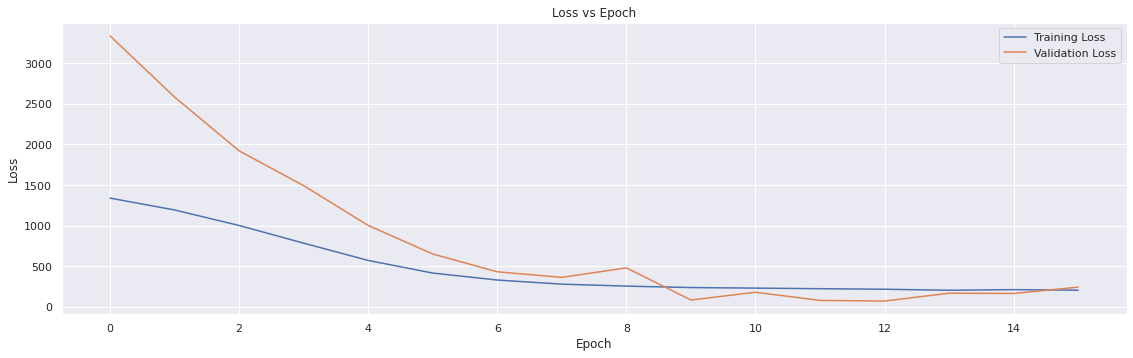

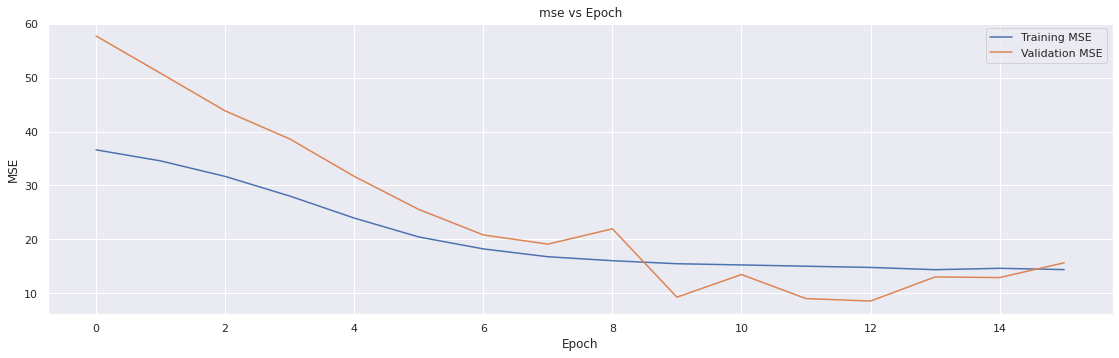

for junction 2:


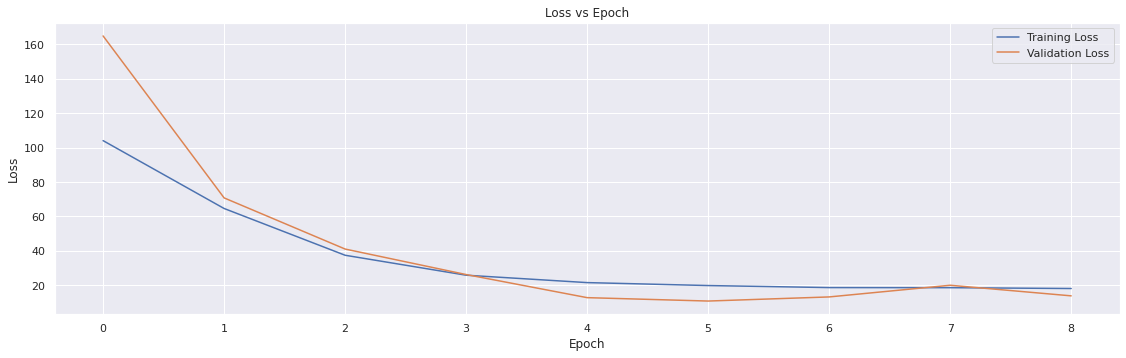

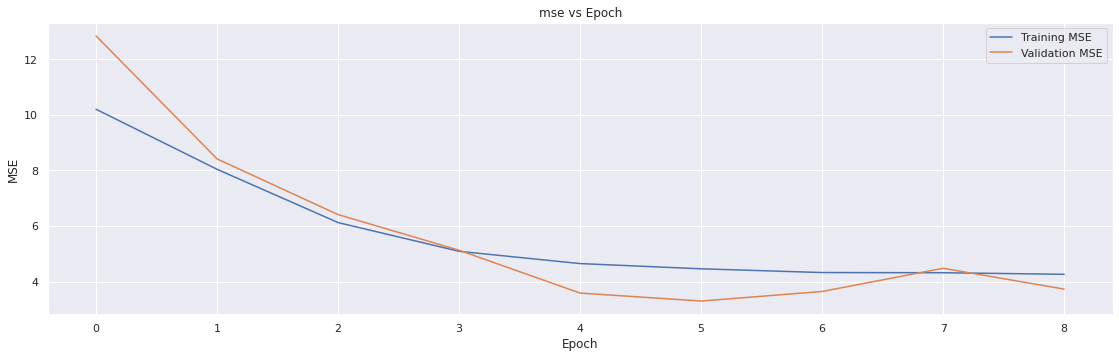

for junction 3:


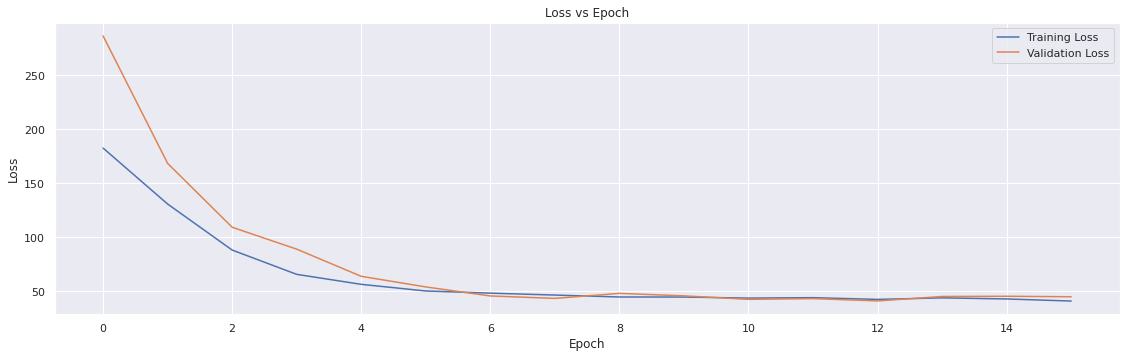

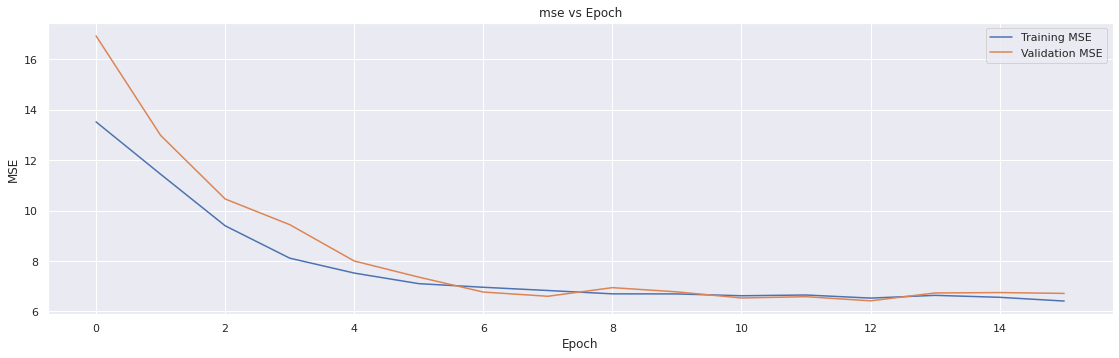

for junction 4:


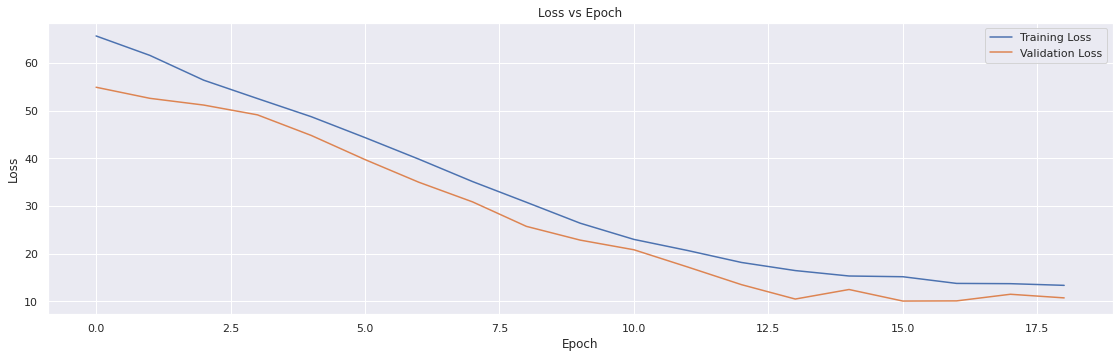

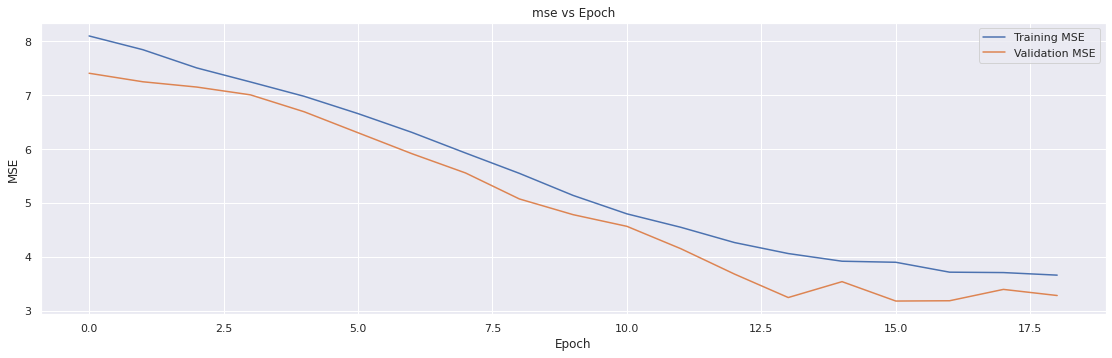

In [609]:
for i in range(1,5):
    print(f"for junction {i}:")
    plt.title('Loss vs Epoch')
    plotting_loss(training_loss[i-1],validation_loss[i-1])
    plt.title('mse vs Epoch')
    plotting_mse(training_mse[i-1],validation_mse[i-1])

for junction 1:


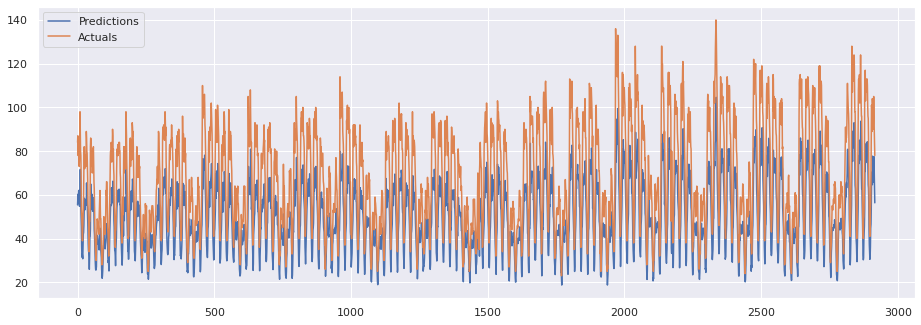

for junction 2:


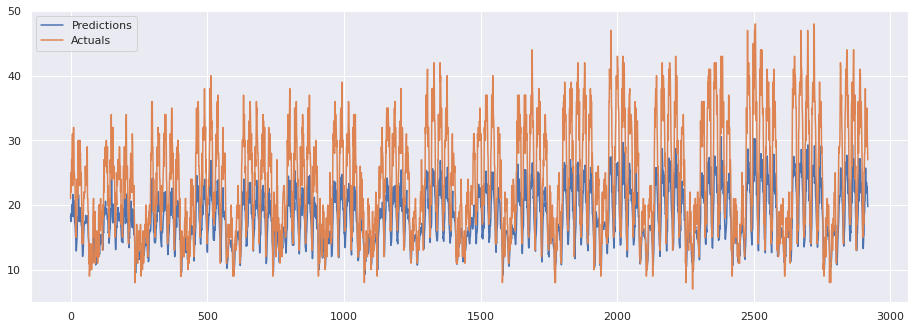

for junction 3:


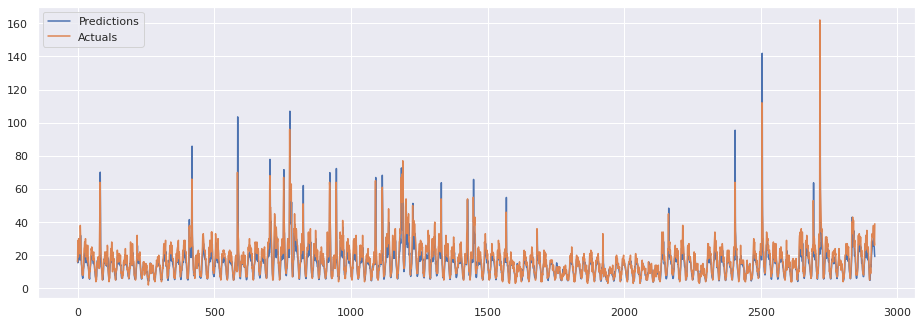

for junction 4:


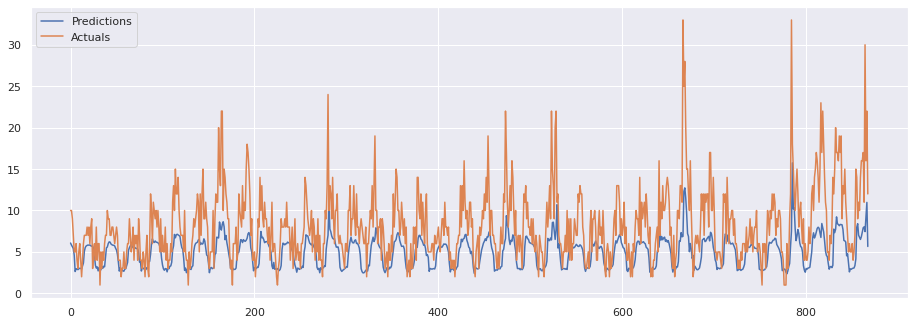

In [610]:
for i in range(1,5):
    print(f"for junction {i}:")
    plot_predictions(test[i-1], prediction[i-1])

In [622]:
calculate_r2_score(test[2], prediction[2])

0.5451696974202114

## Different Approach

28/28 [==============================] - 0s 1ms/step


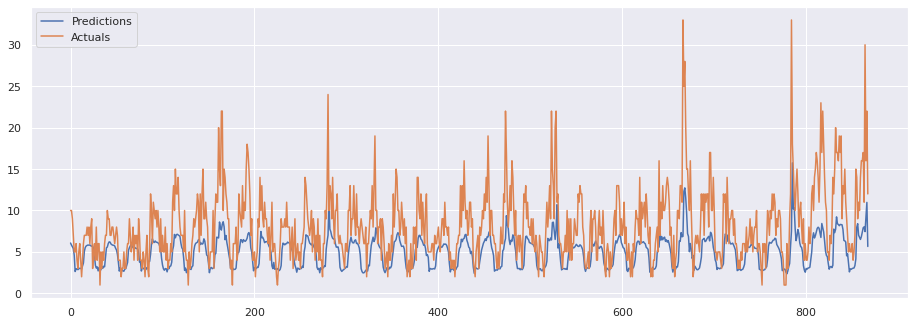

(     Predictions  Actuals
 0       6.070328     10.0
 1       5.823154     10.0
 2       5.619784      9.0
 3       5.407971      7.0
 4       4.593058      5.0
 ..           ...      ...
 863     8.024194     11.0
 864     7.450261     30.0
 865     9.270185     16.0
 866    10.974634     22.0
 867     5.656718     12.0
 
 [868 rows x 2 columns],
 20.4536645657803)

In [611]:
plot_predictions1(model, X_test, y_test)

In [319]:
X_train, X_test=lag_data[1].drop('Vehicles',axis=1)[:12000],lag_data[1].drop('Vehicles',axis=1)[12000:]
y_train, y_test=lag_data[1]['Vehicles'][:12000],lag_data[1]['Vehicles'][12000:]

In [240]:
# Define the LSTM model
def create_model(units=32, dropout=0.2, optimizer='adam'):
    model = Sequential()
    model.add(LSTM(units,activation='relu',kernel_initializer= he_normal(seed=0),input_shape=(None,1)))
    model.add(Dropout(dropout))
    model.add(BatchNormalization())
    model.add(Dense(32))
    model.add(Dropout(dropout))
    model.add(BatchNormalization())
    model.add(Dense(16))
    model.add(Dropout(dropout))
    model.add(BatchNormalization())
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
    return model

model = KerasRegressor(build_fn=create_model, epochs=20, batch_size=32, verbose=0)

# Define the parameter grid
param_grid = {
    'units': [32, 64, 128],
    'dropout': [0.2, 0.3, 0.4],
    'optimizer': ['adam', 'rmsprop']
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5)
# Train the LSTM model
#model.fit(X_train, y_train, epochs=36, batch_size=16)
# Fit the GridSearchCV object to the data
grid_result = grid_search.fit(X_train, y_train)

In [241]:
print("Best parameters: ", grid_result.best_params_)
print("Best score: ", np.sqrt(-grid_result.best_score_))

Best parameters:  {'dropout': 0.4, 'optimizer': 'adam', 'units': 64}
Best score:  6.079305428356434


In [242]:
y_pred=grid_result.predict(X_test)
y_pred

array([50.83828 , 46.058144, 41.467583, ..., 88.26383 , 83.265625,
       78.63145 ], dtype=float32)

In [243]:
r2 = calculate_r2_score(y_test, y_pred)
r2

0.9003486676045338

In [311]:
best_model = grid_search.best_estimator_.model

In [317]:
from tensorflow.keras.models import load_model

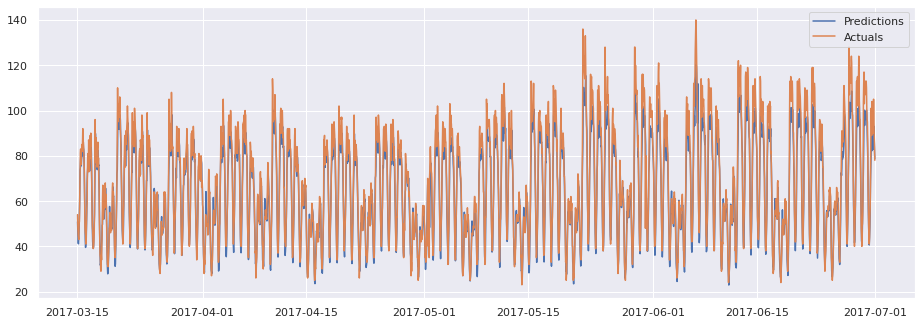

(                     Predictions  Actuals
 DateTime                                 
 2017-03-15 02:00:00    50.838280       54
 2017-03-15 03:00:00    46.058144       48
 2017-03-15 04:00:00    41.467583       45
 2017-03-15 05:00:00    41.122868       44
 2017-03-15 06:00:00    44.096581       43
 ...                          ...      ...
 2017-06-30 19:00:00    85.805656      105
 2017-06-30 20:00:00    93.054924       96
 2017-06-30 21:00:00    88.263832       90
 2017-06-30 22:00:00    83.265625       84
 2017-06-30 23:00:00    78.631447       78
 
 [2590 rows x 2 columns],
 57.82711335573625)

In [244]:
plot_predictions(y_test, y_pred)

In [323]:
len(lag_data[1])*0.6

8754.0

In [324]:
p=len(lag_data[1])

In [329]:
X_train,X_val, X_test=lag_data[1].drop('Vehicles',axis=1)[:int(.6*(p))],lag_data[1].drop('Vehicles',axis=1)[int(.6*(p)):int(.8*(p))],lag_data[1].drop('Vehicles',axis=1)[int(.8*p):]
y_train,y_val, y_test=lag_data[1]['Vehicles'][:int(.6*(p))],lag_data[1]['Vehicles'][int(.6*(p)):int(.8*(p))],lag_data[1]['Vehicles'][int(.8*p):]

In [377]:
# Define the LSTM model
def create_model(units=32, dropout=0.2, optimizer='adam'):
    model = Sequential()
    model.add(LSTM(units,activation='relu',kernel_initializer= he_normal(seed=0),input_shape=(None,1)))
    model.add(Dropout(dropout))
    model.add(BatchNormalization())
    model.add(Dense(32))
    model.add(Dropout(dropout))
    model.add(BatchNormalization())
    model.add(Dense(16))
    model.add(Dropout(dropout))
    model.add(BatchNormalization())
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
    return model

model = KerasRegressor(build_fn=create_model, epochs=20, batch_size=32, verbose=0)

# Define the parameter grid
param_grid = {
    'units': [32, 64, 128],
    'dropout': [0.2, 0.3, 0.4],
    'optimizer': ['adam', 'rmsprop']
}

# Define the model checkpoint callback
cp = ModelCheckpoint('best_model.h5', save_best_only=True)
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5)
# Fit the GridSearchCV object to the data
grid_result = grid_search.fit(X_train, y_train, validation_data=(X_val, y_val), callbacks=[cp])

In [378]:
grid_result

GridSearchCV(cv=5,
             estimator=<keras.wrappers.scikit_learn.KerasRegressor object at 0x7fcf33c1d9d0>,
             param_grid={'dropout': [0.2, 0.3, 0.4],
                         'optimizer': ['adam', 'rmsprop'],
                         'units': [32, 64, 128]},
             scoring='neg_mean_squared_error')

In [379]:
print("Best parameters: ", grid_result.best_params_)
print("Best score: ", np.sqrt(-grid_result.best_score_))

Best parameters:  {'dropout': 0.3, 'optimizer': 'adam', 'units': 128}
Best score:  5.086691613426812


In [380]:
y_pred=grid_result.predict(X_test)
y_pred

array([54.32732 , 64.97818 , 73.937485, ..., 93.04132 , 87.988914,
       83.73311 ], dtype=float32)

In [381]:
r2 = calculate_r2_score(y_test, y_pred)
r2

0.877141919678073

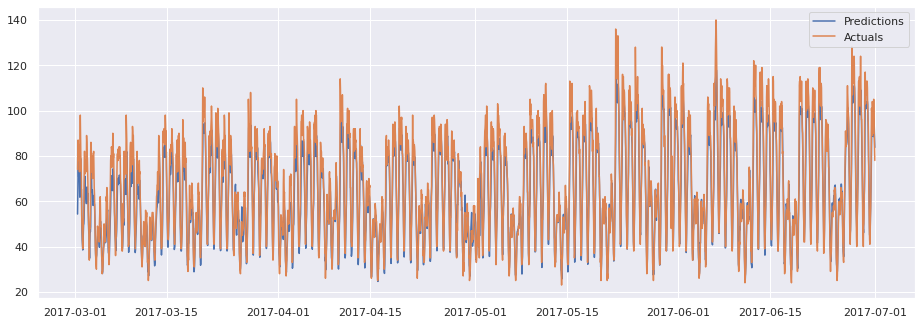

(                     Predictions  Actuals
 DateTime                                 
 2017-03-01 10:00:00    54.327320       74
 2017-03-01 11:00:00    64.978180       84
 2017-03-01 12:00:00    73.937485       87
 2017-03-01 13:00:00    77.445122       78
 2017-03-01 14:00:00    70.853271       82
 ...                          ...      ...
 2017-06-30 19:00:00    89.711456      105
 2017-06-30 20:00:00    96.408463       96
 2017-06-30 21:00:00    93.041321       90
 2017-06-30 22:00:00    87.988914       84
 2017-06-30 23:00:00    83.733109       78
 
 [2918 rows x 2 columns],
 68.5389278699727)

In [382]:
plot_predictions(y_test, y_pred)

In [384]:
y_val_pred=grid_result.predict(X_val)
y_val_pred

array([44.31087 , 41.01553 , 42.506454, ..., 46.097034, 46.603687,
       48.125893], dtype=float32)

In [336]:
# Get the best model
best_model = grid_search.best_estimator_.model
best_model

In [ ]:
best_model?

In [ ]:
best_model.weights

In [485]:
lag_data[1]

Vehicles  Month  Day  hour  Vehicles_lag_1  \
DateTime                                                          
2015-11-01 04:00:00         9     11    1     4             7.0   
2015-11-01 05:00:00         6     11    1     5             9.0   
2015-11-01 06:00:00         9     11    1     6             6.0   
2015-11-01 07:00:00         8     11    1     7             9.0   
2015-11-01 08:00:00        11     11    1     8             8.0   
...                       ...    ...  ...   ...             ...   
2017-06-30 19:00:00       105      6   30    19            95.0   
2017-06-30 20:00:00        96      6   30    20           105.0   
2017-06-30 21:00:00        90      6   30    21            96.0   
2017-06-30 22:00:00        84      6   30    22            90.0   
2017-06-30 23:00:00        78      6   30    23            84.0   

                     Vehicles_lag_2  Vehicles_lag_3  Vehicles_lag_4  
DateTime                                                             
2015-11-01 04:00:00            10.0            13.0            15.0  
2015-11-01 05:00:00             7.0            10.0            13.0  
2015-11-01 06:00:00             9.0             7.0            10.0  
2015-11-01 07:00:00             6.0             9.0             7.0  
2015-11-01 08:00:00             9.0             6.0             9.0  
...                             ...             ...             ...  
2017-06-30 19:00:00            90.0            95.0           101.0  
2017-06-30 20:00:00            95.0            90.0            95.0  
2017-06-30 21:00:00           105.0            95.0            90.0  
2017-06-30 22:00:00            96.0           105.0            95.0  
2017-06-30 23:00:00            90.0            96.0           105.0  

[14588 rows x 8 columns]

In [548]:
temp_df=lag_data[2].copy()

In [549]:
temp_df.head()

Vehicles  Month  Day  hour  Vehicles_lag_1  \
DateTime                                                          
2015-11-01 00:00:00         6     11    1     0            78.0   
2015-11-01 01:00:00         6     11    1     1             6.0   
2015-11-01 02:00:00         5     11    1     2             6.0   
2015-11-01 03:00:00         6     11    1     3             5.0   
2015-11-01 04:00:00         7     11    1     4             6.0   

                     Vehicles_lag_2  Vehicles_lag_3  Vehicles_lag_4  
DateTime                                                             
2015-11-01 00:00:00            84.0            90.0            96.0  
2015-11-01 01:00:00            78.0            84.0            90.0  
2015-11-01 02:00:00             6.0            78.0            84.0  
2015-11-01 03:00:00             6.0             6.0            78.0  
2015-11-01 04:00:00             5.0             6.0             6.0

In [550]:
temp_df['Seconds'] = temp_df.index.map(pd.Timestamp.timestamp)
temp_df.head()

Vehicles  Month  Day  hour  Vehicles_lag_1  \
DateTime                                                          
2015-11-01 00:00:00         6     11    1     0            78.0   
2015-11-01 01:00:00         6     11    1     1             6.0   
2015-11-01 02:00:00         5     11    1     2             6.0   
2015-11-01 03:00:00         6     11    1     3             5.0   
2015-11-01 04:00:00         7     11    1     4             6.0   

                     Vehicles_lag_2  Vehicles_lag_3  Vehicles_lag_4  \
DateTime                                                              
2015-11-01 00:00:00            84.0            90.0            96.0   
2015-11-01 01:00:00            78.0            84.0            90.0   
2015-11-01 02:00:00             6.0            78.0            84.0   
2015-11-01 03:00:00             6.0             6.0            78.0   
2015-11-01 04:00:00             5.0             6.0             6.0   

                          Seconds  
DateTime                           
2015-11-01 00:00:00  1.446336e+09  
2015-11-01 01:00:00  1.446340e+09  
2015-11-01 02:00:00  1.446343e+09  
2015-11-01 03:00:00  1.446347e+09  
2015-11-01 04:00:00  1.446350e+09

In [551]:
day = 60*60*24
year = 365.2425*day

temp_df['Day sin'] = np.sin(temp_df['Seconds'] * (2* np.pi / day))
temp_df['Day cos'] = np.cos(temp_df['Seconds'] * (2 * np.pi / day))
temp_df['Year sin'] = np.sin(temp_df['Seconds'] * (2 * np.pi / year))
temp_df['Year cos'] = np.cos(temp_df['Seconds'] * (2 * np.pi / year))
temp_df.head()

Vehicles  Month  Day  hour  Vehicles_lag_1  \
DateTime                                                          
2015-11-01 00:00:00         6     11    1     0            78.0   
2015-11-01 01:00:00         6     11    1     1             6.0   
2015-11-01 02:00:00         5     11    1     2             6.0   
2015-11-01 03:00:00         6     11    1     3             5.0   
2015-11-01 04:00:00         7     11    1     4             6.0   

                     Vehicles_lag_2  Vehicles_lag_3  Vehicles_lag_4  \
DateTime                                                              
2015-11-01 00:00:00            84.0            90.0            96.0   
2015-11-01 01:00:00            78.0            84.0            90.0   
2015-11-01 02:00:00             6.0            78.0            84.0   
2015-11-01 03:00:00             6.0             6.0            78.0   
2015-11-01 04:00:00             5.0             6.0             6.0   

                          Seconds       Day sin   Day cos  Year sin  Year cos  
DateTime                                                                       
2015-11-01 00:00:00  1.446336e+09 -1.684272e-12  1.000000 -0.868434  0.495804  
2015-11-01 01:00:00  1.446340e+09  2.588190e-01  0.965926 -0.868079  0.496426  
2015-11-01 02:00:00  1.446343e+09  5.000000e-01  0.866025 -0.867723  0.497049  
2015-11-01 03:00:00  1.446347e+09  7.071068e-01  0.707107 -0.867366  0.497670  
2015-11-01 04:00:00  1.446350e+09  8.660254e-01  0.500000 -0.867009  0.498292

In [552]:
temp_df = temp_df.drop('Seconds', axis=1)
temp_df.head()

Vehicles  Month  Day  hour  Vehicles_lag_1  \
DateTime                                                          
2015-11-01 00:00:00         6     11    1     0            78.0   
2015-11-01 01:00:00         6     11    1     1             6.0   
2015-11-01 02:00:00         5     11    1     2             6.0   
2015-11-01 03:00:00         6     11    1     3             5.0   
2015-11-01 04:00:00         7     11    1     4             6.0   

                     Vehicles_lag_2  Vehicles_lag_3  Vehicles_lag_4  \
DateTime                                                              
2015-11-01 00:00:00            84.0            90.0            96.0   
2015-11-01 01:00:00            78.0            84.0            90.0   
2015-11-01 02:00:00             6.0            78.0            84.0   
2015-11-01 03:00:00             6.0             6.0            78.0   
2015-11-01 04:00:00             5.0             6.0             6.0   

                          Day sin   Day cos  Year sin  Year cos  
DateTime                                                         
2015-11-01 00:00:00 -1.684272e-12  1.000000 -0.868434  0.495804  
2015-11-01 01:00:00  2.588190e-01  0.965926 -0.868079  0.496426  
2015-11-01 02:00:00  5.000000e-01  0.866025 -0.867723  0.497049  
2015-11-01 03:00:00  7.071068e-01  0.707107 -0.867366  0.497670  
2015-11-01 04:00:00  8.660254e-01  0.500000 -0.867009  0.498292

In [553]:
temp_df.drop(['Month', 'Day', 'hour'],axis=1, inplace=True)

In [554]:
temp_df.head()

Vehicles  Vehicles_lag_1  Vehicles_lag_2  Vehicles_lag_3  \
DateTime                                                                        
2015-11-01 00:00:00         6            78.0            84.0            90.0   
2015-11-01 01:00:00         6             6.0            78.0            84.0   
2015-11-01 02:00:00         5             6.0             6.0            78.0   
2015-11-01 03:00:00         6             5.0             6.0             6.0   
2015-11-01 04:00:00         7             6.0             5.0             6.0   

                     Vehicles_lag_4       Day sin   Day cos  Year sin  \
DateTime                                                                
2015-11-01 00:00:00            96.0 -1.684272e-12  1.000000 -0.868434   
2015-11-01 01:00:00            90.0  2.588190e-01  0.965926 -0.868079   
2015-11-01 02:00:00            84.0  5.000000e-01  0.866025 -0.867723   
2015-11-01 03:00:00            78.0  7.071068e-01  0.707107 -0.867366   
2015-11-01 04:00:00             6.0  8.660254e-01  0.500000 -0.867009   

                     Year cos  
DateTime                       
2015-11-01 00:00:00  0.495804  
2015-11-01 01:00:00  0.496426  
2015-11-01 02:00:00  0.497049  
2015-11-01 03:00:00  0.497670  
2015-11-01 04:00:00  0.498292

In [555]:
def df_to_X_y2(df, window_size=6):
  df_as_np = df.to_numpy()
  X = []
  y = []
  for i in range(len(df_as_np)-window_size):
    row = [r for r in df_as_np[i:i+window_size]]
    X.append(row)
    label = df_as_np[i+window_size][0]
    y.append(label)
  return np.array(X), np.array(y)

In [556]:
X2, y2 = df_to_X_y2(temp_df)
X2.shape, y2.shape

((14586, 6, 9), (14586,))

In [557]:
X2_train, y2_train = X2[:int(.6*(len(X2)))], y2[:int(.6*(len(y2)))]
X2_val, y2_val = X2[int(.6*(len(X2))):int(.8*(len(X2)))], y2[int(.6*(len(y2))):int(.8*(len(y2)))]
X2_test, y2_test = X2[int(.8*len(X2)):], y2[int(.8*len(y2)):]
X2_train.shape, y2_train.shape, X2_val.shape, y2_val.shape, X2_test.shape, y2_test.shape

((8751, 6, 9), (8751,), (2917, 6, 9), (2917,), (2918, 6, 9), (2918,))

In [558]:
temp_training_mean = np.mean(X2_train[:, :, 0])
temp_training_std = np.std(X2_train[:, :, 0])
                           
def preprocess(X):
    X[:, :, 0] = (X[:, :, 0] - temp_training_mean) / temp_training_std
    return X

In [559]:
preprocess(X2_train)
preprocess(X2_val)
preprocess(X2_test)

array([[[ 1.49555373e+00,  2.20000000e+01,  2.40000000e+01, ...,
          5.00000000e-01,  8.56368681e-01,  5.16364873e-01],
        [ 1.49555373e+00,  1.70000000e+01,  2.20000000e+01, ...,
          2.58819045e-01,  8.56738582e-01,  5.15750911e-01],
        [ 1.73629966e+00,  1.70000000e+01,  1.70000000e+01, ...,
          1.06336389e-11,  8.57108043e-01,  5.15136683e-01],
        [ 1.49555373e+00,  1.80000000e+01,  1.70000000e+01, ...,
         -2.58819045e-01,  8.57477064e-01,  5.14522191e-01],
        [ 1.49555373e+00,  1.70000000e+01,  1.80000000e+01, ...,
         -5.00000000e-01,  8.57845644e-01,  5.13907434e-01],
        [ 3.66226709e+00,  1.70000000e+01,  1.70000000e+01, ...,
         -7.07106781e-01,  8.58213783e-01,  5.13292414e-01]],

       [[ 1.49555373e+00,  1.70000000e+01,  2.20000000e+01, ...,
          2.58819045e-01,  8.56738582e-01,  5.15750911e-01],
        [ 1.73629966e+00,  1.70000000e+01,  1.70000000e+01, ...,
          1.06336389e-11,  8.57108043e-01,  5.15136

In [561]:
model4 = Sequential()
model4.add(InputLayer((6, 9)))
model4.add(LSTM(64))
model4.add(Dense(8, 'relu'))
model4.add(Dropout(0.3))
model4.add(BatchNormalization())
model4.add(Dense(1, 'linear'))

In [562]:
cp4 = ModelCheckpoint('model4/', save_best_only=True)
model4.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0007), metrics=[RootMeanSquaredError()])
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)
history = model4.fit(X2_train, y2_train, validation_data=(X2_val, y2_val), epochs=50, callbacks=[es,cp4])

Epoch 1/50
264/274 [===========================>..] - ETA: 0s - loss: 115.1595 - root_mean_squared_error: 10.7312

INFO:tensorflow:Assets written to: model4/assets


INFO:tensorflow:Assets written to: model4/assets


274/274 [==============================] - 5s 12ms/step - loss: 114.6248 - root_mean_squared_error: 10.7063 - val_loss: 180.7645 - val_root_mean_squared_error: 13.4449
Epoch 2/50
273/274 [============================>.] - ETA: 0s - loss: 76.9618 - root_mean_squared_error: 8.7728

INFO:tensorflow:Assets written to: model4/assets


INFO:tensorflow:Assets written to: model4/assets


274/274 [==============================] - 3s 11ms/step - loss: 76.9593 - root_mean_squared_error: 8.7726 - val_loss: 93.5599 - val_root_mean_squared_error: 9.6726
Epoch 3/50
270/274 [============================>.] - ETA: 0s - loss: 41.3632 - root_mean_squared_error: 6.4314

INFO:tensorflow:Assets written to: model4/assets


INFO:tensorflow:Assets written to: model4/assets


274/274 [==============================] - 3s 10ms/step - loss: 41.1760 - root_mean_squared_error: 6.4168 - val_loss: 36.9945 - val_root_mean_squared_error: 6.0823
Epoch 4/50
256/274 [===========================>..] - ETA: 0s - loss: 18.8055 - root_mean_squared_error: 4.3365

INFO:tensorflow:Assets written to: model4/assets


INFO:tensorflow:Assets written to: model4/assets


274/274 [==============================] - 4s 15ms/step - loss: 18.3562 - root_mean_squared_error: 4.2844 - val_loss: 29.3544 - val_root_mean_squared_error: 5.4180
Epoch 5/50
253/274 [==========================>...] - ETA: 0s - loss: 9.6327 - root_mean_squared_error: 3.1037

INFO:tensorflow:Assets written to: model4/assets


INFO:tensorflow:Assets written to: model4/assets


274/274 [==============================] - 3s 11ms/step - loss: 9.5603 - root_mean_squared_error: 3.0920 - val_loss: 13.5406 - val_root_mean_squared_error: 3.6797
Epoch 6/50
252/274 [==========================>...] - ETA: 0s - loss: 7.6999 - root_mean_squared_error: 2.7749

INFO:tensorflow:Assets written to: model4/assets


INFO:tensorflow:Assets written to: model4/assets


274/274 [==============================] - 3s 10ms/step - loss: 7.6958 - root_mean_squared_error: 2.7741 - val_loss: 12.0125 - val_root_mean_squared_error: 3.4659
Epoch 7/50
274/274 [==============================] - 1s 2ms/step - loss: 7.3786 - root_mean_squared_error: 2.7164 - val_loss: 12.1717 - val_root_mean_squared_error: 3.4888
Epoch 8/50
252/274 [==========================>...] - ETA: 0s - loss: 7.3936 - root_mean_squared_error: 2.7191

INFO:tensorflow:Assets written to: model4/assets


INFO:tensorflow:Assets written to: model4/assets


274/274 [==============================] - 3s 10ms/step - loss: 7.4124 - root_mean_squared_error: 2.7226 - val_loss: 10.8804 - val_root_mean_squared_error: 3.2985
Epoch 9/50
274/274 [==============================] - 1s 2ms/step - loss: 7.2797 - root_mean_squared_error: 2.6981 - val_loss: 21.9149 - val_root_mean_squared_error: 4.6813
Epoch 10/50
274/274 [==============================] - 1s 3ms/step - loss: 7.3775 - root_mean_squared_error: 2.7162 - val_loss: 11.5811 - val_root_mean_squared_error: 3.4031
Epoch 11/50
274/274 [==============================] - 1s 2ms/step - loss: 7.4606 - root_mean_squared_error: 2.7314 - val_loss: 14.6326 - val_root_mean_squared_error: 3.8253
Epoch 12/50
274/274 [==============================] - 1s 2ms/step - loss: 7.2643 - root_mean_squared_error: 2.6952 - val_loss: 12.4221 - val_root_mean_squared_error: 3.5245
Epoch 13/50
265/274 [============================>.] - ETA: 0s - loss: 7.3250 - root_mean_squared_error: 2.7065

INFO:tensorflow:Assets written to: model4/assets


INFO:tensorflow:Assets written to: model4/assets


274/274 [==============================] - 3s 10ms/step - loss: 7.3394 - root_mean_squared_error: 2.7091 - val_loss: 10.6629 - val_root_mean_squared_error: 3.2654
Epoch 14/50
274/274 [==============================] - 1s 2ms/step - loss: 7.0552 - root_mean_squared_error: 2.6562 - val_loss: 16.7998 - val_root_mean_squared_error: 4.0988
Epoch 15/50
274/274 [==============================] - 1s 2ms/step - loss: 7.3225 - root_mean_squared_error: 2.7060 - val_loss: 13.2129 - val_root_mean_squared_error: 3.6349
Epoch 16/50
274/274 [==============================] - 1s 2ms/step - loss: 7.1885 - root_mean_squared_error: 2.6811 - val_loss: 14.0773 - val_root_mean_squared_error: 3.7520
Epoch 17/50
274/274 [==============================] - 1s 2ms/step - loss: 7.2551 - root_mean_squared_error: 2.6935 - val_loss: 12.3237 - val_root_mean_squared_error: 3.5105
Epoch 18/50
274/274 [==============================] - 1s 2ms/step - loss: 7.1382 - root_mean_squared_error: 2.6717 - val_loss: 18.0941 - val

INFO:tensorflow:Assets written to: model4/assets


INFO:tensorflow:Assets written to: model4/assets


274/274 [==============================] - 5s 17ms/step - loss: 7.4544 - root_mean_squared_error: 2.7303 - val_loss: 8.6180 - val_root_mean_squared_error: 2.9356
Epoch 23/50
274/274 [==============================] - 1s 2ms/step - loss: 6.9670 - root_mean_squared_error: 2.6395 - val_loss: 11.7869 - val_root_mean_squared_error: 3.4332
Epoch 24/50
274/274 [==============================] - 1s 2ms/step - loss: 6.9229 - root_mean_squared_error: 2.6311 - val_loss: 12.3590 - val_root_mean_squared_error: 3.5155
Epoch 25/50
274/274 [==============================] - 1s 3ms/step - loss: 6.8207 - root_mean_squared_error: 2.6117 - val_loss: 12.4967 - val_root_mean_squared_error: 3.5351
Epoch 26/50
274/274 [==============================] - 1s 3ms/step - loss: 6.8838 - root_mean_squared_error: 2.6237 - val_loss: 10.0385 - val_root_mean_squared_error: 3.1684
Epoch 27/50
274/274 [==============================] - 1s 3ms/step - loss: 6.9531 - root_mean_squared_error: 2.6369 - val_loss: 11.7887 - val_

In [563]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_mse = history.history['root_mean_squared_error']
val_mse = history.history['val_root_mean_squared_error']

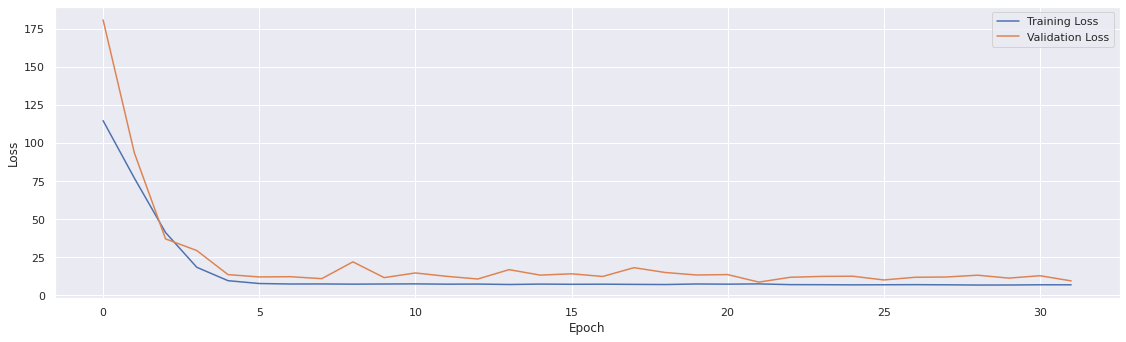

In [564]:
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

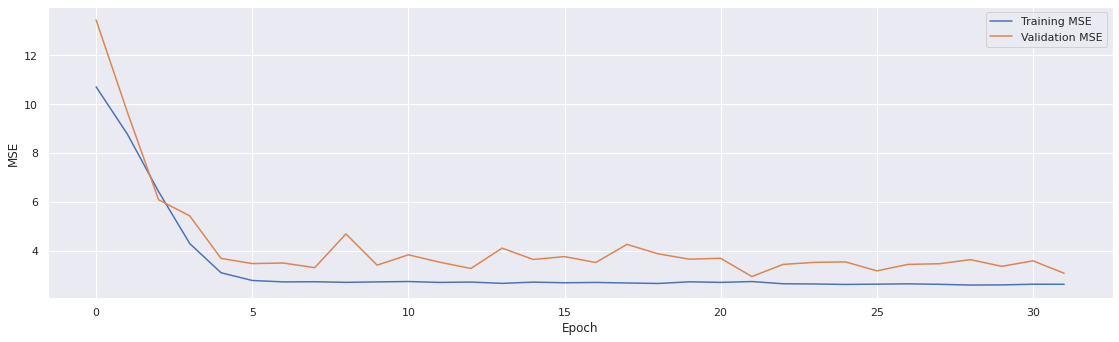

In [565]:
plt.plot(train_mse, label='Training MSE')
plt.plot(val_mse, label='Validation MSE')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.legend()
plt.show()

In [566]:
y2_pred=model4.predict(X2_test)
y2_pred

92/92 [==============================] - 0s 995us/step


array([[19.246399],
       [18.876703],
       [19.354073],
       ...,
       [20.090908],
       [19.568193],
       [19.05514 ]], dtype=float32)

In [567]:
len(y2_pred)

2918

In [568]:
y2_train

array([ 4.,  4.,  3., ..., 13., 10., 14.])

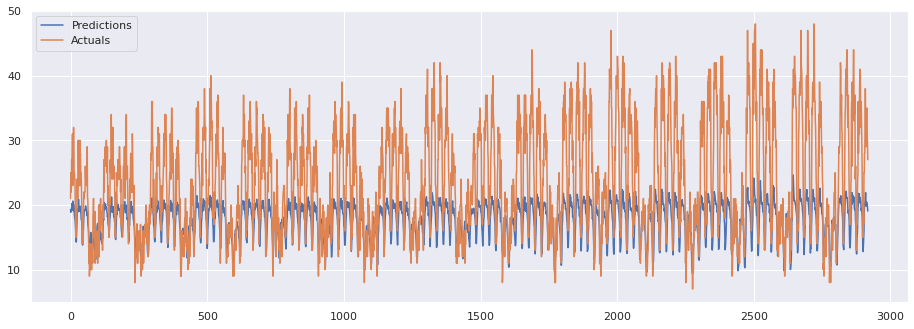

(      Predictions  Actuals
 0       19.246399     21.0
 1       18.876703     25.0
 2       19.354073     22.0
 3       19.335344     23.0
 4       19.329309     27.0
 ...           ...      ...
 2913    20.437824     34.0
 2914    20.141706     35.0
 2915    20.090908     31.0
 2916    19.568193     29.0
 2917    19.055140     27.0
 
 [2918 rows x 2 columns],
 76.35116488541145)

In [569]:
plot_predictions(y2_test, y2_pred)